In [14]:
import numpy as np
import matplotlib.pyplot as plt
import time
import math
import random
import copy
import warnings
warnings.filterwarnings('ignore')

# FedAvg

In [15]:
acc0 = [[], [0.4674000144004822, 0.559499979019165, 0.6071000099182129, 0.29600000381469727, 0.5291000008583069, 0.4075999855995178, 0.6351000070571899, 0.5580000281333923, 0.10000000149011612, 0.29420000314712524, 0.5508999824523926, 0.5861999988555908, 0.5123999714851379, 0.6118999719619751, 0.31290000677108765, 0.531000018119812, 0.27079999446868896, 0.33059999346733093, 0.10000000149011612, 0.569100022315979, 0.28130000829696655, 0.6065000295639038, 0.19329999387264252, 0.5242999792098999, 0.560699999332428, 0.5694000124931335, 0.39649999141693115, 0.45080000162124634, 0.6514000296592712, 0.29510000348091125], [0.6535999774932861, 0.5062999725341797, 0.10000000149011612, 0.4458000063896179, 0.5098000168800354, 0.5501999855041504, 0.5594000220298767, 0.6179999709129333, 0.6247000098228455, 0.5583000183105469, 0.4108999967575073, 0.47189998626708984, 0.5156000256538391, 0.5437999963760376, 0.3898000121116638, 0.5978999733924866, 0.5429999828338623, 0.6850000023841858, 0.10000000149011612, 0.5789999961853027, 0.5436999797821045, 0.5716000199317932, 0.44119998812675476, 0.6049000024795532, 0.5932000279426575, 0.6193000078201294, 0.59170001745224, 0.5041000247001648, 0.5651999711990356, 0.10000000149011612], [0.6014000177383423, 0.6316999793052673, 0.6342999935150146, 0.5954999923706055, 0.10000000149011612, 0.10000000149011612, 0.6270999908447266, 0.6639000177383423, 0.5935999751091003, 0.6812000274658203, 0.6636999845504761, 0.5891000032424927, 0.6958000063896179, 0.5669000148773193, 0.6010000109672546, 0.6955000162124634, 0.6603999733924866, 0.6651999950408936, 0.6765000224113464, 0.6279000043869019, 0.6710000038146973, 0.5669999718666077, 0.704200029373169, 0.667900025844574, 0.5386000275611877, 0.636900007724762, 0.6894999742507935, 0.6467000246047974, 0.10000000149011612, 0.6628000140190125], [0.6238999962806702, 0.65829998254776, 0.6502000093460083, 0.10000000149011612, 0.10000000149011612, 0.705299973487854, 0.7024999856948853, 0.10000000149011612, 0.6340000033378601, 0.7189000248908997, 0.6543999910354614, 0.6689000129699707, 0.6687999963760376, 0.6988999843597412, 0.7102000117301941, 0.6455000042915344, 0.10000000149011612, 0.7067000269889832, 0.4505999982357025, 0.6172000169754028, 0.6444000005722046, 0.6462000012397766, 0.5584999918937683, 0.6926000118255615, 0.6707000136375427, 0.5541999936103821, 0.6965000033378601, 0.6863999962806702, 0.6147000193595886, 0.6044999957084656], [0.5947999954223633, 0.7236999869346619, 0.6847000122070312, 0.6879000067710876, 0.6518999934196472, 0.6930000185966492, 0.6686000227928162, 0.6827999949455261, 0.6779999732971191, 0.7208999991416931, 0.6851999759674072, 0.6011000275611877, 0.6870999932289124, 0.6693999767303467, 0.6528000235557556, 0.7156000137329102, 0.6539999842643738, 0.6915000081062317, 0.6446999907493591, 0.6869000196456909, 0.6578999757766724, 0.6984000205993652, 0.6887999773025513, 0.6215000152587891, 0.7235999703407288, 0.10000000149011612, 0.6983000040054321, 0.7049000263214111, 0.6937000155448914, 0.5996000170707703], [0.6226000189781189, 0.6557999849319458, 0.6937999725341797, 0.6977999806404114, 0.6819000244140625, 0.6901999711990356, 0.6944000124931335, 0.7426000237464905, 0.6704999804496765, 0.6949999928474426, 0.7117000222206116, 0.6790000200271606, 0.7013999819755554, 0.6869000196456909, 0.6008999943733215, 0.6538000106811523, 0.7023000121116638, 0.6137999892234802, 0.7357000112533569, 0.7006000280380249, 0.6607999801635742, 0.6402999758720398, 0.7310000061988831, 0.6251000165939331, 0.6478999853134155, 0.6736999750137329, 0.6826000213623047, 0.6233999729156494, 0.6754000186920166, 0.6144000291824341], [0.6886000037193298, 0.6945000290870667, 0.6894000172615051, 0.6564000248908997, 0.6949999928474426, 0.7279999852180481, 0.7188000082969666, 0.6908000111579895, 0.7120000123977661, 0.713100016117096, 0.6195999979972839, 0.10000000149011612, 0.7208999991416931, 0.7052000164985657, 0.6579999923706055, 0.6219000220298767, 0.6227999925613403, 0.720300018787384, 0.10000000149011612, 0.7383999824523926, 0.5781000256538391, 0.715399980545044, 0.7103000283241272, 0.6363000273704529, 0.6746000051498413, 0.7109000086784363, 0.7120000123977661, 0.7139000296592712, 0.6769999861717224, 0.7067999839782715], [0.6901999711990356, 0.7196999788284302, 0.7113000154495239, 0.7124000191688538, 0.6614999771118164, 0.7139999866485596, 0.6991999745368958, 0.7289000153541565, 0.6679999828338623, 0.5995000004768372, 0.7106000185012817, 0.6840000152587891, 0.6941999793052673, 0.746999979019165, 0.6866000294685364, 0.10000000149011612, 0.6947000026702881, 0.15940000116825104, 0.6327999830245972, 0.7304999828338623, 0.6922000050544739, 0.7322999835014343, 0.7300000190734863, 0.7092000246047974, 0.6929000020027161, 0.6499999761581421, 0.7016000151634216, 0.7226999998092651, 0.6794999837875366, 0.7470999956130981], [0.7272999882698059, 0.6881999969482422, 0.7134000062942505, 0.7476000189781189, 0.708899974822998, 0.10000000149011612, 0.7620999813079834, 0.7315000295639038, 0.7026000022888184, 0.6730999946594238, 0.6919999718666077, 0.7414000034332275, 0.7073000073432922, 0.7401000261306763, 0.6830999851226807, 0.7121000289916992, 0.7250999808311462, 0.7142000198364258, 0.6644999980926514, 0.6341999769210815, 0.7107999920845032, 0.720300018787384, 0.6538000106811523, 0.6675999760627747, 0.7002999782562256, 0.10000000149011612, 0.7121000289916992, 0.6771000027656555, 0.6819999814033508, 0.729200005531311], [0.7401000261306763, 0.6220999956130981, 0.7164000272750854, 0.7247999906539917, 0.77920001745224, 0.7350000143051147, 0.730400025844574, 0.6995000243186951, 0.6414999961853027, 0.7314000129699707, 0.7594000101089478, 0.7287999987602234, 0.7261000275611877, 0.714900016784668, 0.70169997215271, 0.6970000267028809, 0.7387999892234802, 0.10019999742507935, 0.6707000136375427, 0.744700014591217, 0.10010000318288803, 0.7289999723434448, 0.631600022315979, 0.7425000071525574, 0.7215999960899353, 0.6414999961853027, 0.741599977016449, 0.6967999935150146, 0.10000000149011612, 0.7451000213623047], [0.6273000240325928, 0.7235000133514404, 0.7391999959945679, 0.6442000269889832, 0.7095000147819519, 0.7394999861717224, 0.7427999973297119, 0.7570000290870667, 0.10000000149011612, 0.6743999719619751, 0.7372999787330627, 0.67330002784729, 0.7353000044822693, 0.7124000191688538, 0.6455000042915344, 0.7232999801635742, 0.10000000149011612, 0.7129999995231628, 0.7214000225067139, 0.7538999915122986, 0.7749999761581421, 0.6668000221252441, 0.6811000108718872, 0.7275000214576721, 0.732699990272522, 0.7350000143051147, 0.7240999937057495, 0.7592999935150146, 0.7235000133514404, 0.746399998664856], [0.7391999959945679, 0.7497000098228455, 0.729200005531311, 0.6922000050544739, 0.7024000287055969, 0.7594000101089478, 0.760200023651123, 0.7253999710083008, 0.710099995136261, 0.7293000221252441, 0.7516000270843506, 0.7476000189781189, 0.6796000003814697, 0.713100016117096, 0.7591999769210815, 0.7106000185012817, 0.10000000149011612, 0.7365999817848206, 0.5647000074386597, 0.7008000016212463, 0.6553000211715698, 0.7436000108718872, 0.6883999705314636, 0.7261999845504761, 0.6710000038146973, 0.7498000264167786, 0.722100019454956, 0.729200005531311, 0.7599999904632568, 0.7601000070571899], [0.7271000146865845, 0.7269999980926514, 0.7160999774932861, 0.7451000213623047, 0.7527999877929688, 0.6937999725341797, 0.6324999928474426, 0.6467999815940857, 0.7501999735832214, 0.6559000015258789, 0.11729999631643295, 0.7623999714851379, 0.7495999932289124, 0.6578999757766724, 0.7480999827384949, 0.6798999905586243, 0.6875, 0.7445999979972839, 0.7508999705314636, 0.742900013923645, 0.757099986076355, 0.680400013923645, 0.7396000027656555, 0.7254999876022339, 0.6711000204086304, 0.7437999844551086, 0.7285000085830688, 0.7411999702453613, 0.776199996471405, 0.7455000281333923], [0.7404000163078308, 0.7293999791145325, 0.7584999799728394, 0.7321000099182129, 0.7537999749183655, 0.7387999892234802, 0.7368000149726868, 0.7542999982833862, 0.7894999980926514, 0.7135999798774719, 0.7612000107765198, 0.7387999892234802, 0.675000011920929, 0.6887000203132629, 0.6834999918937683, 0.7491000294685364, 0.10000000149011612, 0.7160999774932861, 0.7470999956130981, 0.7698000073432922, 0.7092000246047974, 0.7233999967575073, 0.7373999953269958, 0.7476999759674072, 0.6872000098228455, 0.7105000019073486, 0.6998999714851379, 0.5618000030517578, 0.748199999332428, 0.6949999928474426], [0.6955000162124634, 0.7285000085830688, 0.7699999809265137, 0.7487000226974487, 0.6802999973297119, 0.3928000032901764, 0.7469000220298767, 0.3037000000476837, 0.6753000020980835, 0.736299991607666, 0.5892000198364258, 0.7577999830245972, 0.7649999856948853, 0.7842000126838684, 0.7754999995231628, 0.7202000021934509, 0.7585999965667725, 0.7235000133514404, 0.7102000117301941, 0.7612000107765198, 0.6940000057220459, 0.6743999719619751, 0.6861000061035156, 0.776199996471405, 0.7513999938964844, 0.7878999710083008, 0.7350000143051147, 0.10000000149011612, 0.7329999804496765, 0.7519999742507935], [0.7573999762535095, 0.6935999989509583, 0.7867000102996826, 0.6620000004768372, 0.7544999718666077, 0.7109000086784363, 0.7181000113487244, 0.7386000156402588, 0.6662999987602234, 0.7418000102043152, 0.7537999749183655, 0.7613000273704529, 0.7016000151634216, 0.7229999899864197, 0.6969000101089478, 0.7565000057220459, 0.697700023651123, 0.7450000047683716, 0.6905999779701233, 0.7159000039100647, 0.6879000067710876, 0.7731999754905701, 0.742900013923645, 0.71670001745224, 0.10000000149011612, 0.7160000205039978, 0.7746999859809875, 0.729200005531311, 0.7642999887466431, 0.7229999899864197], [0.7893999814987183, 0.7014999985694885, 0.7534000277519226, 0.7651000022888184, 0.7799999713897705, 0.7523999810218811, 0.7361999750137329, 0.7670999765396118, 0.7519000172615051, 0.7529000043869019, 0.7773000001907349, 0.7281000018119812, 0.7494999766349792, 0.736299991607666, 0.7717999815940857, 0.7760000228881836, 0.7594000101089478, 0.7394999861717224, 0.7529000043869019, 0.7508999705314636, 0.7502999901771545, 0.7786999940872192, 0.7777000069618225, 0.7182999849319458, 0.7315999865531921, 0.7688999772071838, 0.7045999765396118, 0.7422999739646912, 0.7246000170707703, 0.7415000200271606], [0.6877999901771545, 0.718500018119812, 0.10000000149011612, 0.7634999752044678, 0.7573999762535095, 0.1680999994277954, 0.7422999739646912, 0.7635999917984009, 0.7426000237464905, 0.7455999851226807, 0.6621000170707703, 0.7775999903678894, 0.7560999989509583, 0.7587000131607056, 0.7501999735832214, 0.767300009727478, 0.7792999744415283, 0.7475000023841858, 0.7842000126838684, 0.6967999935150146, 0.7515000104904175, 0.7689999938011169, 0.755299985408783, 0.12710000574588776, 0.7297000288963318, 0.7836999893188477, 0.7408999800682068, 0.7060999870300293, 0.7509999871253967, 0.7581999897956848], [0.7716000080108643, 0.7168999910354614, 0.7350999712944031, 0.7782999873161316, 0.7883999943733215, 0.7150999903678894, 0.724399983882904, 0.1324000060558319, 0.7494000196456909, 0.7522000074386597, 0.13459999859333038, 0.7633000016212463, 0.722100019454956, 0.40130001306533813, 0.7486000061035156, 0.7526999711990356, 0.7821000218391418, 0.704200029373169, 0.7605999708175659, 0.10040000081062317, 0.7283999919891357, 0.7850000262260437, 0.7231000065803528, 0.7114999890327454, 0.7620999813079834, 0.7437000274658203, 0.6990000009536743, 0.7717000246047974, 0.789900004863739, 0.7653999924659729], [0.7366999983787537, 0.6603000164031982, 0.739300012588501, 0.741599977016449, 0.7283999919891357, 0.7497000098228455, 0.10270000249147415, 0.7505000233650208, 0.7423999905586243, 0.7408999800682068, 0.7257999777793884, 0.7943999767303467, 0.7426999807357788, 0.704200029373169, 0.7384999990463257, 0.3806999921798706, 0.76910001039505, 0.7192999720573425, 0.7760999798774719, 0.7457000017166138, 0.7710000276565552, 0.734000027179718, 0.7383999824523926, 0.7797999978065491, 0.765500009059906, 0.24879999458789825, 0.784500002861023, 0.10010000318288803, 0.7232000231742859, 0.7143999934196472], [0.6832000017166138, 0.7657999992370605, 0.7804999947547913, 0.7603999972343445, 0.7878999710083008, 0.7670000195503235, 0.7391999959945679, 0.7786999940872192, 0.6888999938964844, 0.7605999708175659, 0.8030999898910522, 0.7343999743461609, 0.753600001335144, 0.46149998903274536, 0.699400007724762, 0.7116000056266785, 0.7577000260353088, 0.10000000149011612, 0.7542999982833862, 0.736299991607666, 0.7929999828338623, 0.7540000081062317, 0.6151000261306763, 0.10000000149011612, 0.7810999751091003, 0.21209999918937683, 0.7580000162124634, 0.10000000149011612, 0.7337999939918518, 0.751800000667572], [0.10010000318288803, 0.7833999991416931, 0.7512000203132629, 0.7696999907493591, 0.7206000089645386, 0.751800000667572, 0.7685999870300293, 0.7876999974250793, 0.10010000318288803, 0.7272999882698059, 0.7360000014305115, 0.6841999888420105, 0.7325999736785889, 0.7633000016212463, 0.7324000000953674, 0.7355999946594238, 0.7669000029563904, 0.7653999924659729, 0.757099986076355, 0.7408999800682068, 0.7233999967575073, 0.7318999767303467, 0.765999972820282, 0.7580999732017517, 0.7407000064849854, 0.7125999927520752, 0.7430999875068665, 0.10000000149011612, 0.7853000164031982, 0.7750999927520752], [0.7583000063896179, 0.7734000086784363, 0.751800000667572, 0.7764000296592712, 0.7400000095367432, 0.7512000203132629, 0.7477999925613403, 0.7067000269889832, 0.7677000164985657, 0.10019999742507935, 0.7505000233650208, 0.7967000007629395, 0.7634000182151794, 0.762499988079071, 0.6973999738693237, 0.7348999977111816, 0.7634999752044678, 0.7662000060081482, 0.8091999888420105, 0.73580002784729, 0.754800021648407, 0.7319999933242798, 0.6496999859809875, 0.7997000217437744, 0.10279999673366547, 0.7817999720573425, 0.8004000186920166, 0.7462999820709229, 0.7918000221252441, 0.7113000154495239], [0.7384999990463257, 0.7626000046730042, 0.7793999910354614, 0.7400000095367432, 0.781000018119812, 0.7925000190734863, 0.6973000168800354, 0.7854999899864197, 0.692300021648407, 0.7649999856948853, 0.7261999845504761, 0.7962999939918518, 0.7050999999046326, 0.7059000134468079, 0.1234000027179718, 0.14180000126361847, 0.7161999940872192, 0.7639999985694885, 0.7639999985694885, 0.6420999765396118, 0.7748000025749207, 0.7692999839782715, 0.7828999757766724, 0.7329999804496765, 0.7706999778747559, 0.7441999912261963, 0.7588000297546387, 0.7519000172615051, 0.7547000050544739, 0.7458000183105469], [0.769599974155426, 0.7386000156402588, 0.7609999775886536, 0.7389000058174133, 0.7793999910354614, 0.7612000107765198, 0.7695000171661377, 0.7709000110626221, 0.7652000188827515, 0.7901999950408936, 0.7919999957084656, 0.7767000198364258, 0.7542999982833862, 0.7908999919891357, 0.7781999707221985, 0.7304999828338623, 0.7354000210762024, 0.78329998254776, 0.7501999735832214, 0.7870000004768372, 0.6047999858856201, 0.7605000138282776, 0.7123000025749207, 0.7717999815940857, 0.751800000667572, 0.776199996471405, 0.760699987411499, 0.7010999917984009, 0.7731000185012817, 0.7860000133514404], [0.7364000082015991, 0.7282999753952026, 0.8037999868392944, 0.7669000029563904, 0.7746999859809875, 0.7531999945640564, 0.7871999740600586, 0.7901999950408936, 0.7310000061988831, 0.6668999791145325, 0.7188000082969666, 0.10000000149011612, 0.7957000136375427, 0.7781999707221985, 0.7542999982833862, 0.7833999991416931, 0.7932000160217285, 0.7912999987602234, 0.7996000051498413, 0.7324000000953674, 0.7623000144958496, 0.10090000182390213, 0.7502999901771545, 0.7508999705314636, 0.10000000149011612, 0.7231000065803528, 0.7896000146865845, 0.7402999997138977, 0.779699981212616, 0.7829999923706055], [0.7922999858856201, 0.7980999946594238, 0.7749000191688538, 0.7961000204086304, 0.758400022983551, 0.1143999993801117, 0.7480000257492065, 0.7955999970436096, 0.7376000285148621, 0.7667999863624573, 0.8123999834060669, 0.7958999872207642, 0.7832000255584717, 0.7146000266075134, 0.796500027179718, 0.7892000079154968, 0.732200026512146, 0.7562999725341797, 0.7696999907493591, 0.7835999727249146, 0.8069999814033508, 0.2199999988079071, 0.6840999722480774, 0.10660000145435333, 0.741599977016449, 0.7221999764442444, 0.7608000040054321, 0.7785999774932861, 0.7940000295639038, 0.32440000772476196], [0.7903000116348267, 0.7563999891281128, 0.725600004196167, 0.7712000012397766, 0.7250000238418579, 0.7760000228881836, 0.6092000007629395, 0.7421000003814697, 0.7788000106811523, 0.7354999780654907, 0.7551000118255615, 0.17110000550746918, 0.789900004863739, 0.2883000075817108, 0.7580999732017517, 0.7849000096321106, 0.10029999911785126, 0.7878999710083008, 0.7993000149726868, 0.7258999943733215, 0.7908999919891357, 0.6435999870300293, 0.7717000246047974, 0.7422999739646912, 0.7975999712944031, 0.6765000224113464, 0.7717999815940857, 0.7206000089645386, 0.7466999888420105, 0.8044000267982483], [0.8001000285148621, 0.7649000287055969, 0.7854999899864197, 0.7652000188827515, 0.7494999766349792, 0.10000000149011612, 0.10019999742507935, 0.7684000134468079, 0.7892000079154968, 0.4221999943256378, 0.7896000146865845, 0.7027000188827515, 0.7764000296592712, 0.7822999954223633, 0.7178999781608582, 0.7950000166893005, 0.7896999716758728, 0.6693999767303467, 0.7727000117301941, 0.7857000231742859, 0.7954999804496765, 0.8066999912261963, 0.7533000111579895, 0.7681999802589417, 0.7186999917030334, 0.7301999926567078, 0.7894999980926514, 0.7753000259399414, 0.4336000084877014, 0.777400016784668], [0.7576000094413757, 0.7944999933242798, 0.7634999752044678, 0.817799985408783, 0.743399977684021, 0.7967000007629395, 0.7506999969482422, 0.8065000176429749, 0.10740000009536743, 0.8145999908447266, 0.7843000292778015, 0.8055999875068665, 0.7705000042915344, 0.7882000207901001, 0.7649000287055969, 0.788100004196167, 0.10029999911785126, 0.8065999746322632, 0.14480000734329224, 0.7906000018119812, 0.7721999883651733, 0.7515000104904175, 0.7032999992370605, 0.7763000130653381, 0.7911999821662903, 0.7663999795913696, 0.7735999822616577, 0.7768999934196472, 0.7588000297546387, 0.767300009727478]]
loss0 = [[], [1.533230185508728, 1.14297354221344, 1.3325356245040894, 2.3379688262939453, 1.381643533706665, 2.454052448272705, 1.1150559186935425, 1.1647307872772217, 16.92180824279785, 3.913072347640991, 1.7385287284851074, 1.6205167770385742, 2.0755808353424072, 0.9840527176856995, 2.363938331604004, 1.315658450126648, 3.151399612426758, 4.609273910522461, 89.12823486328125, 1.2502363920211792, 3.268603563308716, 1.361374855041504, 2.3959999084472656, 1.523942232131958, 1.4448455572128296, 1.2962576150894165, 1.5567456483840942, 1.7702314853668213, 1.12055504322052, 3.0289387702941895], [1.0051560401916504, 1.5460041761398315, 80.858154296875, 2.7566077709198, 1.4664716720581055, 1.5736767053604126, 1.2677704095840454, 1.3581736087799072, 1.3985581398010254, 1.514804482460022, 3.2600388526916504, 1.7046173810958862, 1.5119215250015259, 1.701229453086853, 2.004077434539795, 1.1415146589279175, 1.7707608938217163, 1.005229115486145, 229.6934814453125, 1.1251630783081055, 1.230523705482483, 1.1794408559799194, 1.5857164859771729, 1.31514310836792, 1.7046902179718018, 1.4271389245986938, 1.1958266496658325, 1.4833850860595703, 1.3175055980682373, 209.1530303955078], [1.3540009260177612, 1.0136727094650269, 1.1101267337799072, 1.3219020366668701, 95.0958251953125, 18.45894432067871, 1.2922183275222778, 0.9747015833854675, 1.2588255405426025, 1.2532403469085693, 1.2748677730560303, 1.4190599918365479, 1.3098421096801758, 2.793102264404297, 1.9355741739273071, 0.9933871030807495, 1.0174258947372437, 1.12715482711792, 1.5746095180511475, 1.2164323329925537, 1.1577156782150269, 1.7356822490692139, 0.9662621021270752, 0.9347264766693115, 2.489642381668091, 1.1806522607803345, 1.1334960460662842, 1.1953723430633545, 229.35980224609375, 1.1161963939666748], [2.1712608337402344, 1.0164440870285034, 1.108048439025879, 83.82520294189453, 31.138437271118164, 1.1247800588607788, 0.8982227444648743, 36.726173400878906, 1.25978422164917, 1.1039024591445923, 1.1247355937957764, 1.4154995679855347, 1.3368749618530273, 1.5347189903259277, 1.020020604133606, 0.9373880624771118, 46.81434631347656, 0.9248303771018982, 2.3602042198181152, 1.5159178972244263, 1.3334953784942627, 0.9128844738006592, 1.3405826091766357, 1.06773042678833, 1.2137326002120972, 1.5358178615570068, 1.5074013471603394, 1.491146445274353, 1.0466493368148804, 1.1893364191055298], [1.6672910451889038, 0.8875452280044556, 1.127272605895996, 1.4597499370574951, 1.736487865447998, 1.0022084712982178, 1.3880282640457153, 1.6794025897979736, 1.2108843326568604, 1.1228517293930054, 1.5948083400726318, 1.5591418743133545, 1.390723705291748, 1.7550605535507202, 1.265761375427246, 1.1306390762329102, 1.9861243963241577, 1.6980053186416626, 2.3350000381469727, 1.15110182762146, 1.2240022420883179, 1.0822160243988037, 1.5232268571853638, 2.4569339752197266, 1.1872814893722534, 81.12351989746094, 1.2157930135726929, 1.3444119691848755, 1.303887128829956, 1.6680572032928467], [3.2678213119506836, 1.5413470268249512, 0.9068880081176758, 1.813537359237671, 1.5075305700302124, 2.00044322013855, 1.450668215751648, 0.8706010580062866, 1.4913033246994019, 1.2331467866897583, 0.9405407905578613, 1.2237727642059326, 1.1989957094192505, 1.2500214576721191, 2.1941311359405518, 1.7295117378234863, 1.3349287509918213, 1.1999276876449585, 1.245007038116455, 1.3160598278045654, 1.3599227666854858, 1.3541086912155151, 1.014556884765625, 1.1206398010253906, 1.3439881801605225, 0.99957674741745, 0.9944450259208679, 1.3275971412658691, 1.5351321697235107, 1.658915400505066], [1.422590970993042, 0.9210865497589111, 1.4879497289657593, 1.5315812826156616, 0.9951447248458862, 1.0967695713043213, 1.4098918437957764, 1.8229103088378906, 0.8900766372680664, 1.2331066131591797, 2.0601041316986084, 54.107200622558594, 1.091312050819397, 1.0159668922424316, 1.6206417083740234, 2.3421716690063477, 1.8808724880218506, 1.2563914060592651, 86.02879333496094, 1.0764952898025513, 2.848710775375366, 1.258457899093628, 1.273101806640625, 1.466668963432312, 1.5881322622299194, 1.3909261226654053, 0.9509086012840271, 1.154662013053894, 1.2356489896774292, 1.1712583303451538], [2.309363842010498, 1.1293293237686157, 1.057700753211975, 2.2683210372924805, 1.6465661525726318, 1.2981423139572144, 1.3537161350250244, 1.845598578453064, 1.3781108856201172, 2.031249523162842, 1.3804329633712769, 1.389424443244934, 1.1160188913345337, 1.2350023984909058, 1.2132467031478882, 24.916975021362305, 1.4644708633422852, 10.908329963684082, 1.873328685760498, 0.9826984405517578, 1.2916213274002075, 1.167082667350769, 1.1996922492980957, 1.249458909034729, 1.2117539644241333, 1.2953795194625854, 1.3633474111557007, 0.8979533910751343, 1.1469355821609497, 0.9529010057449341], [1.3702796697616577, 1.0296080112457275, 1.0226112604141235, 1.0367271900177002, 1.7098337411880493, 92.33232879638672, 1.055465579032898, 1.156881332397461, 1.232082724571228, 1.8428303003311157, 1.6001636981964111, 1.2679327726364136, 1.083118200302124, 1.102028250694275, 1.3650407791137695, 1.3810245990753174, 1.6641713380813599, 1.400335431098938, 1.5332170724868774, 1.905227541923523, 0.9414007663726807, 1.516554594039917, 2.340247392654419, 2.509824752807617, 1.4116812944412231, 67.98856353759766, 1.1187995672225952, 1.199912667274475, 1.3232556581497192, 1.5436480045318604], [1.332902431488037, 1.92703378200531, 0.9415377974510193, 1.7738322019577026, 0.9061225652694702, 1.1541417837142944, 1.056528925895691, 1.2660330533981323, 2.6486685276031494, 1.3363357782363892, 0.9341747760772705, 1.4039682149887085, 1.2214360237121582, 1.2571280002593994, 1.8186414241790771, 1.18058180809021, 1.5037610530853271, 15.451659202575684, 1.1368255615234375, 1.121999979019165, 27.92148780822754, 1.3212499618530273, 2.001718282699585, 1.307236909866333, 1.1128891706466675, 1.115963339805603, 0.9396023154258728, 1.1670455932617188, 91.64535522460938, 1.3444466590881348], [1.307447075843811, 0.9954530000686646, 0.785127580165863, 1.7631912231445312, 1.4348149299621582, 0.9454318284988403, 1.2497040033340454, 1.0670700073242188, 14.995009422302246, 1.1867252588272095, 1.051212191581726, 1.2518796920776367, 0.9021788835525513, 0.9667076468467712, 5.3111724853515625, 1.730772614479065, 25.26616859436035, 1.523743987083435, 1.4908249378204346, 1.1646068096160889, 0.9687440395355225, 2.301464557647705, 2.1892247200012207, 1.2642351388931274, 0.9674704074859619, 1.2180384397506714, 1.1436859369277954, 1.1343140602111816, 0.8343020677566528, 1.0820752382278442], [0.9653517603874207, 1.714725136756897, 1.168289065361023, 1.2812902927398682, 1.487389326095581, 0.9622828960418701, 1.0062729120254517, 1.514701008796692, 1.2190927267074585, 1.280136227607727, 1.3333773612976074, 0.9905020594596863, 1.945924162864685, 0.8386317491531372, 1.1445040702819824, 1.1987354755401611, 18.41242218017578, 1.0635485649108887, 3.224494218826294, 1.4127391576766968, 2.0366530418395996, 0.8846582174301147, 1.5325028896331787, 1.0225621461868286, 1.3647651672363281, 1.0284072160720825, 1.9015964269638062, 0.9907401204109192, 1.6312652826309204, 1.0450373888015747], [2.9760780334472656, 1.3454968929290771, 1.2420849800109863, 1.410874366760254, 1.3590285778045654, 1.027574062347412, 1.3161931037902832, 1.08035409450531, 1.3355956077575684, 1.021225094795227, 35.06782531738281, 0.9830616116523743, 0.8893093466758728, 1.7473951578140259, 1.0548573732376099, 3.090198516845703, 0.9781582951545715, 1.4267055988311768, 1.0602267980575562, 1.3166123628616333, 1.0188649892807007, 1.0669499635696411, 1.2653319835662842, 1.153242826461792, 1.8844915628433228, 1.1526225805282593, 0.9836202263832092, 1.1678242683410645, 0.9951761960983276, 1.2827320098876953], [1.0989017486572266, 1.2815953493118286, 0.8853362202644348, 1.0707359313964844, 1.0141934156417847, 1.1365559101104736, 1.1947134733200073, 1.0883840322494507, 0.8330864310264587, 1.5425537824630737, 1.15320885181427, 0.914878249168396, 1.724819302558899, 1.3290445804595947, 1.4868515729904175, 1.1107655763626099, 16.575546264648438, 1.3766990900039673, 1.0473710298538208, 0.8473184704780579, 1.3303126096725464, 0.9677676558494568, 1.0242646932601929, 1.4079941511154175, 1.4990487098693848, 1.699687123298645, 2.8606395721435547, 2.681746006011963, 0.9957566261291504, 1.5146173238754272], [1.319488286972046, 1.0127639770507812, 1.2894706726074219, 0.9089921116828918, 1.7682533264160156, 3.8285748958587646, 1.5443854331970215, 10.322388648986816, 1.410575270652771, 0.9279888868331909, 2.3151612281799316, 1.4060148000717163, 0.8273767828941345, 0.9702377915382385, 1.0144494771957397, 1.0916746854782104, 0.9978739023208618, 1.2464953660964966, 1.4234751462936401, 0.7473288178443909, 1.3390001058578491, 1.3542412519454956, 2.390265703201294, 0.8738622069358826, 1.0015562772750854, 0.6349449753761292, 1.284942865371704, 48.005645751953125, 1.027389645576477, 1.1008087396621704], [1.2161970138549805, 2.2974729537963867, 0.811225414276123, 2.5240750312805176, 0.9950973391532898, 1.4536466598510742, 1.5787469148635864, 1.1420819759368896, 1.8322783708572388, 1.205020546913147, 1.2117923498153687, 1.046980619430542, 1.4962371587753296, 1.2601063251495361, 1.128049612045288, 0.9463391304016113, 0.9412921667098999, 1.0196346044540405, 1.250199556350708, 1.3012763261795044, 1.0784902572631836, 1.1248070001602173, 1.521844506263733, 1.9308044910430908, 92.52083587646484, 0.9947764873504639, 0.9195044040679932, 1.3019672632217407, 1.108783483505249, 1.2513465881347656], [0.8158411979675293, 0.9478461742401123, 1.1207478046417236, 1.167585015296936, 0.9422549605369568, 0.98675137758255, 1.3014144897460938, 1.1175683736801147, 1.4203847646713257, 1.4153176546096802, 1.2580238580703735, 1.7804417610168457, 1.3790055513381958, 1.4264010190963745, 0.9693842530250549, 1.1168450117111206, 0.8265798687934875, 1.4592562913894653, 1.0518893003463745, 1.1018134355545044, 0.9840842485427856, 1.005618691444397, 0.780940055847168, 1.3202836513519287, 1.5582462549209595, 0.8479346632957458, 1.5351711511611938, 1.5610308647155762, 1.0923092365264893, 1.0503966808319092], [1.0485918521881104, 1.099599838256836, 18.856185913085938, 0.9621097445487976, 0.8688366413116455, 14.894533157348633, 1.3422433137893677, 0.9234598875045776, 1.3289974927902222, 1.1376844644546509, 2.0550270080566406, 0.824091911315918, 1.0052882432937622, 1.0227526426315308, 1.1055495738983154, 0.9053314328193665, 0.9527075290679932, 1.4710747003555298, 0.719633936882019, 1.3255153894424438, 1.0821200609207153, 0.7770061492919922, 1.029587984085083, 11.581307411193848, 1.2398064136505127, 0.8806567192077637, 1.2166680097579956, 1.507536768913269, 1.2890527248382568, 1.0243579149246216], [0.882923424243927, 1.6450749635696411, 0.8709443211555481, 0.9283360242843628, 0.9079155325889587, 1.6201014518737793, 1.6478949785232544, 11.474929809570312, 1.0197858810424805, 1.0501526594161987, 21.576641082763672, 0.9617742300033569, 1.3557298183441162, 6.972607612609863, 1.2403556108474731, 1.8315808773040771, 1.008514404296875, 1.1647218465805054, 1.2288706302642822, 21.455888748168945, 1.1999151706695557, 0.9937450289726257, 2.1046133041381836, 1.7060166597366333, 1.2037345170974731, 1.6032441854476929, 1.4974550008773804, 1.0496015548706055, 1.012046217918396, 0.9241582751274109], [1.0884795188903809, 1.7543052434921265, 1.5163480043411255, 1.2479472160339355, 1.5242606401443481, 1.1254619359970093, 34.50214385986328, 1.047092318534851, 0.9738290905952454, 1.011272668838501, 1.5012959241867065, 0.9389826059341431, 1.0480544567108154, 1.0758647918701172, 0.8106871843338013, 5.669454097747803, 1.007476806640625, 1.5232912302017212, 0.8979747891426086, 1.2755357027053833, 1.047953724861145, 2.6918904781341553, 1.5638930797576904, 0.91190505027771, 1.0384529829025269, 4.663298606872559, 0.9876656532287598, 15.850756645202637, 1.1818839311599731, 2.1977241039276123], [1.768540382385254, 0.9469399452209473, 0.9868661165237427, 1.6864264011383057, 0.9002022743225098, 1.1536062955856323, 1.4645553827285767, 1.0661897659301758, 1.5799833536148071, 1.2002477645874023, 0.9803575277328491, 0.9682291746139526, 1.0348860025405884, 4.0627217292785645, 2.157029151916504, 2.1732046604156494, 1.4051958322525024, 40.909202575683594, 1.2085157632827759, 1.3619084358215332, 0.9864319562911987, 1.069053053855896, 1.8437824249267578, 50.24897384643555, 0.9452670812606812, 5.008922100067139, 0.8044539093971252, 77.92391204833984, 0.9469380974769592, 1.3915404081344604], [39.273502349853516, 1.327587366104126, 0.9518218636512756, 1.0454912185668945, 1.0921903848648071, 0.7436873316764832, 0.9759525656700134, 0.9005376100540161, 14.89478588104248, 1.4089661836624146, 1.0384719371795654, 1.6979111433029175, 1.570380687713623, 1.7841442823410034, 0.9721947312355042, 1.249518871307373, 1.129995584487915, 1.0658366680145264, 1.280181884765625, 0.9697631597518921, 1.3521039485931396, 1.49873685836792, 1.163167119026184, 1.1082602739334106, 1.3996531963348389, 1.1819769144058228, 1.2929953336715698, 15.964376449584961, 0.8973425626754761, 0.7644885182380676], [1.0810803174972534, 1.1318919658660889, 0.9545847773551941, 0.8679324388504028, 1.0011075735092163, 0.8745558857917786, 1.2501987218856812, 1.4886255264282227, 1.0090563297271729, 31.774229049682617, 1.3159939050674438, 0.7570781707763672, 1.0259125232696533, 1.0187708139419556, 1.3993929624557495, 1.2625324726104736, 1.5252559185028076, 1.1352218389511108, 0.7051571607589722, 1.2898308038711548, 1.3082610368728638, 1.3346892595291138, 2.308323621749878, 0.8065602779388428, 23.03369903564453, 0.9427589774131775, 1.043652892112732, 0.9900972843170166, 1.2143774032592773, 1.613950490951538], [1.0665370225906372, 1.332654595375061, 0.8072385787963867, 1.6775915622711182, 1.0064566135406494, 1.032058596611023, 1.5548810958862305, 0.9991024136543274, 1.2946336269378662, 0.887233316898346, 1.5406384468078613, 0.8431491255760193, 1.6314805746078491, 2.409237861633301, 15.641684532165527, 5.454681873321533, 1.5075241327285767, 1.0329537391662598, 1.342508316040039, 1.372320294380188, 0.7633916139602661, 1.3256703615188599, 0.8392346501350403, 1.6005222797393799, 1.0806125402450562, 0.902863085269928, 1.2099071741104126, 1.1124602556228638, 1.3143510818481445, 1.3131630420684814], [1.0534895658493042, 0.9851358532905579, 0.7877688407897949, 1.5503123998641968, 1.1604825258255005, 1.2400816679000854, 1.388395071029663, 0.8617706298828125, 1.1280059814453125, 0.8078470230102539, 0.9331870079040527, 0.7387101054191589, 0.8417717814445496, 0.7806000709533691, 1.05778968334198, 1.5797359943389893, 1.0418729782104492, 0.9566601514816284, 1.3143805265426636, 0.9475528597831726, 3.1781527996063232, 1.0165152549743652, 1.4525465965270996, 0.9230436682701111, 0.9985172152519226, 0.9583761692047119, 1.0853592157363892, 1.1056277751922607, 1.084447979927063, 0.6808130145072937], [1.5583550930023193, 1.6509859561920166, 0.9981105327606201, 1.5612647533416748, 0.9467267394065857, 1.1775610446929932, 0.8204995393753052, 0.9338377714157104, 1.1259876489639282, 1.3870538473129272, 1.0909442901611328, 32.85841751098633, 0.7597436308860779, 1.1457020044326782, 1.1610050201416016, 0.9214091897010803, 0.9854808449745178, 1.0423951148986816, 0.8997994065284729, 1.3117061853408813, 1.3099980354309082, 31.21209144592285, 1.4590312242507935, 1.4542298316955566, 55.20680618286133, 1.7130601406097412, 1.1424648761749268, 2.162998914718628, 1.0212852954864502, 1.0598506927490234], [0.8259067535400391, 1.006744623184204, 0.9178861379623413, 0.9584710001945496, 1.2025525569915771, 33.478328704833984, 1.4548923969268799, 1.1998765468597412, 1.4735244512557983, 0.9847931861877441, 0.921558678150177, 0.8234373927116394, 1.2173956632614136, 1.84443199634552, 1.032063603401184, 1.0501997470855713, 1.2982375621795654, 1.544526219367981, 1.6690844297409058, 1.0114555358886719, 0.8439468741416931, 6.4382004737854, 1.6937555074691772, 19.515817642211914, 1.02109694480896, 1.1278895139694214, 1.1262825727462769, 1.023924708366394, 0.9620532393455505, 5.204860687255859], [1.411205768585205, 1.186335802078247, 1.553748607635498, 0.8110780119895935, 1.3571988344192505, 0.9816431403160095, 2.689517021179199, 1.1143836975097656, 1.0722712278366089, 0.9565685391426086, 1.2099311351776123, 7.428591251373291, 1.1345655918121338, 9.647832870483398, 1.2362744808197021, 0.9078604578971863, 15.45151424407959, 1.1832629442214966, 0.8918687701225281, 1.13968825340271, 0.9925722479820251, 1.6406484842300415, 0.9527148604393005, 0.9992339015007019, 0.8869748115539551, 1.753622055053711, 1.0767977237701416, 1.6678004264831543, 1.1199769973754883, 0.7614151835441589], [0.7831160426139832, 1.1937299966812134, 1.2285175323486328, 1.1704963445663452, 1.2381752729415894, 61.214988708496094, 22.70030975341797, 1.1484712362289429, 0.9245191216468811, 7.8079304695129395, 0.8217313289642334, 1.1963119506835938, 0.7492855787277222, 1.2073982954025269, 1.6359400749206543, 1.0734440088272095, 1.5191510915756226, 2.232872724533081, 1.0376145839691162, 0.925236701965332, 1.064399242401123, 0.7936419248580933, 1.3386352062225342, 0.8321569561958313, 1.1085234880447388, 1.6010546684265137, 0.8784365057945251, 0.7681229710578918, 4.978384971618652, 1.4034963846206665], [0.9667167067527771, 1.1117873191833496, 0.9918758869171143, 0.8695405125617981, 0.9532825350761414, 0.8800284266471863, 1.0747623443603516, 0.8105016350746155, 24.15000343322754, 0.8242645263671875, 1.1865363121032715, 0.8923051953315735, 1.185648798942566, 0.8785043954849243, 0.8327639698982239, 1.0136942863464355, 33.995635986328125, 1.0372436046600342, 15.359701156616211, 1.0442960262298584, 1.1203787326812744, 0.948727548122406, 1.2509279251098633, 0.8161635994911194, 0.9091739058494568, 1.1231762170791626, 1.2542366981506348, 1.3063855171203613, 1.0359758138656616, 0.808657169342041]] 

acc1 = [[], [0.5371999740600586, 0.505299985408783, 0.3287000060081482, 0.4700999855995178, 0.5557000041007996, 0.10000000149011612, 0.5702999830245972, 0.6266000270843506, 0.4869000017642975, 0.6194999814033508, 0.602400004863739, 0.19460000097751617, 0.4876999855041504, 0.474700003862381, 0.3806999921798706, 0.5353000164031982, 0.5023000240325928, 0.29420000314712524, 0.24690000712871552, 0.10000000149011612, 0.4422000050544739, 0.3849000036716461, 0.6352999806404114, 0.12240000069141388, 0.5073999762535095, 0.659600019454956, 0.5613999962806702, 0.5590000152587891, 0.5205000042915344, 0.6050000190734863], [0.5690000057220459, 0.6894000172615051, 0.4595000147819519, 0.6413000226020813, 0.6061000227928162, 0.5626000165939331, 0.6485999822616577, 0.5080999732017517, 0.5411999821662903, 0.6620000004768372, 0.6068999767303467, 0.534500002861023, 0.5512999892234802, 0.6485000252723694, 0.43810001015663147, 0.6233000159263611, 0.6230999827384949, 0.6679999828338623, 0.5411999821662903, 0.10000000149011612, 0.444599986076355, 0.5295000076293945, 0.6137999892234802, 0.6399000287055969, 0.6617000102996826, 0.5975000262260437, 0.6072999835014343, 0.6586999893188477, 0.35510000586509705, 0.5401999950408936], [0.6133999824523926, 0.6531000137329102, 0.6244999766349792, 0.5983999967575073, 0.520799994468689, 0.529699981212616, 0.10000000149011612, 0.43540000915527344, 0.10000000149011612, 0.5181000232696533, 0.6700000166893005, 0.5583999752998352, 0.10000000149011612, 0.5759000182151794, 0.5866000056266785, 0.6654999852180481, 0.5701000094413757, 0.6412000060081482, 0.6308000087738037, 0.6194999814033508, 0.652899980545044, 0.5601999759674072, 0.6428999900817871, 0.5238999724388123, 0.5906000137329102, 0.6082000136375427, 0.5511999726295471, 0.5135999917984009, 0.45179998874664307, 0.10000000149011612], [0.694599986076355, 0.6880000233650208, 0.10000000149011612, 0.10000000149011612, 0.6866000294685364, 0.6019999980926514, 0.685699999332428, 0.5358999967575073, 0.6887000203132629, 0.6880999803543091, 0.5544999837875366, 0.10000000149011612, 0.5821999907493591, 0.6597999930381775, 0.10000000149011612, 0.6513000130653381, 0.6793000102043152, 0.6661999821662903, 0.580299973487854, 0.6728000044822693, 0.6949999928474426, 0.6435999870300293, 0.4587000012397766, 0.6328999996185303, 0.703000009059906, 0.6636000275611877, 0.6776999831199646, 0.6783000230789185, 0.5703999996185303, 0.6292999982833862], [0.6421999931335449, 0.703000009059906, 0.6959999799728394, 0.6743999719619751, 0.7039999961853027, 0.7103000283241272, 0.6132000088691711, 0.6998000144958496, 0.6611999869346619, 0.6344000101089478, 0.6632000207901001, 0.10000000149011612, 0.6570000052452087, 0.6725000143051147, 0.6488999724388123, 0.6812999844551086, 0.7103000283241272, 0.6072999835014343, 0.6894000172615051, 0.7088000178337097, 0.6399999856948853, 0.6175000071525574, 0.6615999937057495, 0.5449000000953674, 0.6425999999046326, 0.6730999946594238, 0.10000000149011612, 0.10000000149011612, 0.6657000184059143, 0.6567000150680542], [0.7013999819755554, 0.6740999817848206, 0.6686000227928162, 0.6721000075340271, 0.715399980545044, 0.67330002784729, 0.10000000149011612, 0.6912999749183655, 0.6965000033378601, 0.7059999704360962, 0.6226999759674072, 0.6144999861717224, 0.6887000203132629, 0.5250999927520752, 0.722000002861023, 0.6863999962806702, 0.6266999840736389, 0.10000000149011612, 0.70169997215271, 0.7171000242233276, 0.6722999811172485, 0.635200023651123, 0.7196000218391418, 0.6488999724388123, 0.7153000235557556, 0.7010999917984009, 0.6535999774932861, 0.5462999939918518, 0.5871000289916992, 0.6492000222206116], [0.5393999814987183, 0.7014999985694885, 0.6662999987602234, 0.6890000104904175, 0.7232999801635742, 0.7135999798774719, 0.6983000040054321, 0.6539999842643738, 0.6965000033378601, 0.6654000282287598, 0.7425000071525574, 0.7160999774932861, 0.6883000135421753, 0.6858999729156494, 0.6391000151634216, 0.6236000061035156, 0.73580002784729, 0.6916999816894531, 0.6897000074386597, 0.7293999791145325, 0.7202000021934509, 0.7091000080108643, 0.6917999982833862, 0.7396000027656555, 0.697700023651123, 0.7059999704360962, 0.7290999889373779, 0.671999990940094, 0.6363000273704529, 0.6607999801635742], [0.6773999929428101, 0.6629999876022339, 0.7127000093460083, 0.6815000176429749, 0.4912000000476837, 0.7141000032424927, 0.6830999851226807, 0.6984000205993652, 0.7192999720573425, 0.6604999899864197, 0.7208999991416931, 0.6651999950408936, 0.7436000108718872, 0.6877999901771545, 0.3359000086784363, 0.724399983882904, 0.6988000273704529, 0.677299976348877, 0.6930999755859375, 0.745199978351593, 0.7303000092506409, 0.7157999873161316, 0.7311999797821045, 0.7145000100135803, 0.7282000184059143, 0.7142000198364258, 0.6414999961853027, 0.7371000051498413, 0.7113999724388123, 0.6557999849319458], [0.7214000225067139, 0.6284000277519226, 0.6829000115394592, 0.6940000057220459, 0.7027999758720398, 0.7088000178337097, 0.7091000080108643, 0.703000009059906, 0.7231000065803528, 0.7020000219345093, 0.6697999835014343, 0.6639000177383423, 0.7260000109672546, 0.7299000024795532, 0.7251999974250793, 0.7009000182151794, 0.6597999930381775, 0.7372999787330627, 0.6956999897956848, 0.734499990940094, 0.10000000149011612, 0.7371000051498413, 0.7335000038146973, 0.70660001039505, 0.7476000189781189, 0.6930999755859375, 0.7384999990463257, 0.7429999709129333, 0.6956999897956848, 0.6419000029563904], [0.7379000186920166, 0.7663999795913696, 0.7085999846458435, 0.7422000169754028, 0.7245000004768372, 0.5942999720573425, 0.7414000034332275, 0.7139999866485596, 0.7602999806404114, 0.10000000149011612, 0.744700014591217, 0.7168999910354614, 0.7383999824523926, 0.6952999830245972, 0.7501000165939331, 0.10000000149011612, 0.10000000149011612, 0.7218000292778015, 0.7494000196456909, 0.762499988079071, 0.7074000239372253, 0.7315000295639038, 0.6927000284194946, 0.737500011920929, 0.6988999843597412, 0.7093999981880188, 0.6259999871253967, 0.7170000076293945, 0.695900022983551, 0.7070000171661377], [0.10000000149011612, 0.7675999999046326, 0.7250000238418579, 0.7170000076293945, 0.7024000287055969, 0.1005999967455864, 0.7386999726295471, 0.6761000156402588, 0.6488999724388123, 0.7508000135421753, 0.7710999846458435, 0.6726999878883362, 0.7599999904632568, 0.7445999979972839, 0.6948000192642212, 0.7135000228881836, 0.7452999949455261, 0.7398999929428101, 0.6898000240325928, 0.6694999933242798, 0.7142999768257141, 0.6169999837875366, 0.7084000110626221, 0.7177000045776367, 0.7182999849319458, 0.7465000152587891, 0.7222999930381775, 0.7366999983787537, 0.7689999938011169, 0.7523000240325928], [0.666100025177002, 0.7584999799728394, 0.7305999994277954, 0.7520999908447266, 0.6661999821662903, 0.713100016117096, 0.7361999750137329, 0.7549999952316284, 0.7383000254631042, 0.7556999921798706, 0.722000002861023, 0.7057999968528748, 0.7700999975204468, 0.7405999898910522, 0.7300000190734863, 0.7423999905586243, 0.23770000040531158, 0.7282000184059143, 0.6654999852180481, 0.7303000092506409, 0.7296000123023987, 0.6992999911308289, 0.7555999755859375, 0.7049999833106995, 0.7186999917030334, 0.7226999998092651, 0.7135000228881836, 0.7441999912261963, 0.6568999886512756, 0.10000000149011612], [0.7264999747276306, 0.7681000232696533, 0.701200008392334, 0.7572000026702881, 0.7498000264167786, 0.7706000208854675, 0.7488999962806702, 0.7605000138282776, 0.7185999751091003, 0.6766999959945679, 0.7121000289916992, 0.7113000154495239, 0.755299985408783, 0.7299000024795532, 0.7366999983787537, 0.7271000146865845, 0.6780999898910522, 0.7432000041007996, 0.7419999837875366, 0.7232000231742859, 0.7466999888420105, 0.10000000149011612, 0.7218000292778015, 0.7139999866485596, 0.7621999979019165, 0.7073000073432922, 0.6866000294685364, 0.6553999781608582, 0.7565000057220459, 0.694100022315979], [0.7427999973297119, 0.6672000288963318, 0.7556999921798706, 0.7361000180244446, 0.7324000000953674, 0.7608000040054321, 0.6973999738693237, 0.7674000263214111, 0.7445999979972839, 0.7706999778747559, 0.7497000098228455, 0.713699996471405, 0.7443000078201294, 0.7505000233650208, 0.3391999900341034, 0.7445999979972839, 0.6942999958992004, 0.6003999710083008, 0.6970000267028809, 0.6805999875068665, 0.1005999967455864, 0.7447999715805054, 0.7404000163078308, 0.7243000268936157, 0.7465000152587891, 0.7343999743461609, 0.784500002861023, 0.7595000267028809, 0.6991999745368958, 0.7653999924659729], [0.10000000149011612, 0.694599986076355, 0.7465999722480774, 0.7070000171661377, 0.7450000047683716, 0.7759000062942505, 0.7350999712944031, 0.7397000193595886, 0.784500002861023, 0.7860000133514404, 0.19059999287128448, 0.10000000149011612, 0.741100013256073, 0.765500009059906, 0.7305999994277954, 0.7454000115394592, 0.7001000046730042, 0.7233999967575073, 0.7138000130653381, 0.6913999915122986, 0.7678999900817871, 0.7601000070571899, 0.7279000282287598, 0.6830999851226807, 0.7116000056266785, 0.10000000149011612, 0.10239999741315842, 0.6632000207901001, 0.6586999893188477, 0.754800021648407], [0.7163000106811523, 0.7714999914169312, 0.7443000078201294, 0.6894000172615051, 0.7741000056266785, 0.7067000269889832, 0.7552000284194946, 0.7709000110626221, 0.7560999989509583, 0.7472000122070312, 0.7493000030517578, 0.7210999727249146, 0.7064999938011169, 0.7193999886512756, 0.7598999738693237, 0.7113999724388123, 0.7164000272750854, 0.6478000283241272, 0.7699000239372253, 0.7527999877929688, 0.10000000149011612, 0.623199999332428, 0.7422000169754028, 0.7008000016212463, 0.7242000102996826, 0.7451000213623047, 0.746999979019165, 0.7019000053405762, 0.7587000131607056, 0.7710999846458435], [0.10000000149011612, 0.7495999932289124, 0.7515000104904175, 0.7688999772071838, 0.7605000138282776, 0.10000000149011612, 0.7139999866485596, 0.7840999960899353, 0.7186999917030334, 0.7766000032424927, 0.7767000198364258, 0.7239999771118164, 0.7240999937057495, 0.13420000672340393, 0.753600001335144, 0.7190999984741211, 0.7250999808311462, 0.76419997215271, 0.1632000058889389, 0.7386999726295471, 0.7687000036239624, 0.7164999842643738, 0.673799991607666, 0.770799994468689, 0.6067000031471252, 0.7211999893188477, 0.10019999742507935, 0.7476999759674072, 0.6901999711990356, 0.7644000053405762], [0.7145000100135803, 0.7602999806404114, 0.10209999978542328, 0.7633000016212463, 0.7314000129699707, 0.6909000277519226, 0.7318999767303467, 0.6510000228881836, 0.765500009059906, 0.7594000101089478, 0.7286999821662903, 0.7831000089645386, 0.7229999899864197, 0.7444999814033508, 0.7358999848365784, 0.7688000202178955, 0.7479000091552734, 0.7354000210762024, 0.7382000088691711, 0.7556999921798706, 0.766700029373169, 0.5049999952316284, 0.7156000137329102, 0.7455000281333923, 0.7544999718666077, 0.7182999849319458, 0.6873999834060669, 0.15520000457763672, 0.7901999950408936, 0.7667999863624573], [0.7031999826431274, 0.7253999710083008, 0.7788000106811523, 0.7508999705314636, 0.7498000264167786, 0.7159000039100647, 0.7687000036239624, 0.6834999918937683, 0.7594000101089478, 0.10000000149011612, 0.7774999737739563, 0.7526999711990356, 0.7775999903678894, 0.7777000069618225, 0.7594000101089478, 0.7630000114440918, 0.7659000158309937, 0.761900007724762, 0.7846999764442444, 0.7472000122070312, 0.760699987411499, 0.761900007724762, 0.7620999813079834, 0.7192999720573425, 0.7455999851226807, 0.7545999884605408, 0.7204999923706055, 0.788100004196167, 0.7139000296592712, 0.7067000269889832], [0.10000000149011612, 0.7153000235557556, 0.7749999761581421, 0.7107999920845032, 0.6779999732971191, 0.10000000149011612, 0.6556000113487244, 0.7402999997138977, 0.7741000056266785, 0.6258000135421753, 0.7530999779701233, 0.7088000178337097, 0.7324000000953674, 0.777400016784668, 0.7652999758720398, 0.7638000249862671, 0.754800021648407, 0.7817999720573425, 0.10000000149011612, 0.7516999840736389, 0.7657999992370605, 0.7046999931335449, 0.7662000060081482, 0.7709000110626221, 0.7842000126838684, 0.7483000159263611, 0.7588000297546387, 0.7159000039100647, 0.6938999891281128, 0.7390999794006348], [0.6287999749183655, 0.7680000066757202, 0.7664999961853027, 0.7574999928474426, 0.7763000130653381, 0.7703999876976013, 0.7512000203132629, 0.7279999852180481, 0.766700029373169, 0.642799973487854, 0.7020999789237976, 0.7558000087738037, 0.7185999751091003, 0.7908999919891357, 0.6879000067710876, 0.6790000200271606, 0.7414000034332275, 0.7563999891281128, 0.7706000208854675, 0.7200999855995178, 0.7164999842643738, 0.7741000056266785, 0.7491999864578247, 0.7379999756813049, 0.7574999928474426, 0.756600022315979, 0.7847999930381775, 0.7225000262260437, 0.6966000199317932, 0.7322999835014343], [0.8012999892234802, 0.7831000089645386, 0.733299970626831, 0.8043000102043152, 0.7634999752044678, 0.7675999999046326, 0.770799994468689, 0.7487000226974487, 0.7720999717712402, 0.7150999903678894, 0.6636999845504761, 0.770799994468689, 0.8033999800682068, 0.7407000064849854, 0.7225000262260437, 0.7817000150680542, 0.7734000086784363, 0.7856000065803528, 0.7764000296592712, 0.7477999925613403, 0.10000000149011612, 0.75, 0.7645999789237976, 0.7835999727249146, 0.7290999889373779, 0.729200005531311, 0.7493000030517578, 0.7522000074386597, 0.7857000231742859, 0.7835999727249146], [0.7786999940872192, 0.7440999746322632, 0.7964000105857849, 0.8021000027656555, 0.7534999847412109, 0.79830002784729, 0.7912999987602234, 0.10840000212192535, 0.781499981880188, 0.6270999908447266, 0.7814000248908997, 0.7990000247955322, 0.7971000075340271, 0.7103999853134155, 0.7613000273704529, 0.7052000164985657, 0.7638999819755554, 0.7419999837875366, 0.7734000086784363, 0.10000000149011612, 0.7038000226020813, 0.7512999773025513, 0.73089998960495, 0.1843000054359436, 0.758899986743927, 0.7250000238418579, 0.7724000215530396, 0.7851999998092651, 0.8086000084877014, 0.7192000150680542], [0.7908999919891357, 0.6730999946594238, 0.7501999735832214, 0.762499988079071, 0.7088000178337097, 0.7461000084877014, 0.10000000149011612, 0.7943999767303467, 0.7077999711036682, 0.10000000149011612, 0.7903000116348267, 0.7767999768257141, 0.6951000094413757, 0.7317000031471252, 0.7354000210762024, 0.7289999723434448, 0.7594000101089478, 0.5997999906539917, 0.7253999710083008, 0.7473999857902527, 0.7817999720573425, 0.10010000318288803, 0.7849000096321106, 0.7480000257492065, 0.7653999924659729, 0.6823999881744385, 0.774399995803833, 0.745199978351593, 0.7789999842643738, 0.7340999841690063], [0.7957000136375427, 0.7706999778747559, 0.6873000264167786, 0.5365999937057495, 0.7512000203132629, 0.7919999957084656, 0.7677000164985657, 0.7788000106811523, 0.786899983882904, 0.7062000036239624, 0.7753999829292297, 0.7971000075340271, 0.7398999929428101, 0.10040000081062317, 0.7396000027656555, 0.8137000203132629, 0.7555999755859375, 0.7760000228881836, 0.7437999844551086, 0.7720000147819519, 0.7649000287055969, 0.6790000200271606, 0.7200000286102295, 0.7559000253677368, 0.7773000001907349, 0.7487999796867371, 0.777400016784668, 0.7487999796867371, 0.7103999853134155, 0.7627000212669373], [0.7803000211715698, 0.7663000226020813, 0.7706999778747559, 0.7831000089645386, 0.7753999829292297, 0.78329998254776, 0.7634999752044678, 0.7422000169754028, 0.2596000134944916, 0.7014999985694885, 0.7289999723434448, 0.7516999840736389, 0.7936999797821045, 0.738099992275238, 0.7998999953269958, 0.802299976348877, 0.7461000084877014, 0.774399995803833, 0.10000000149011612, 0.44940000772476196, 0.7879999876022339, 0.7597000002861023, 0.10429999977350235, 0.7364000082015991, 0.755299985408783, 0.737500011920929, 0.7932000160217285, 0.8009999990463257, 0.12330000102519989, 0.7768999934196472], [0.7935000061988831, 0.7860000133514404, 0.7876999974250793, 0.770799994468689, 0.7368000149726868, 0.79339998960495, 0.10010000318288803, 0.7085000276565552, 0.10090000182390213, 0.7965999841690063, 0.8137999773025513, 0.7150999903678894, 0.807200014591217, 0.8077999949455261, 0.7200000286102295, 0.7623000144958496, 0.7354000210762024, 0.10119999945163727, 0.7483000159263611, 0.8019999861717224, 0.5981000065803528, 0.7766000032424927, 0.7580999732017517, 0.7250000238418579, 0.7407000064849854, 0.7069000005722046, 0.7458999752998352, 0.6902999877929688, 0.7817000150680542, 0.794700026512146], [0.7986000180244446, 0.7695000171661377, 0.7871000170707703, 0.7753999829292297, 0.7843000292778015, 0.7728000283241272, 0.7815999984741211, 0.7620000243186951, 0.7674999833106995, 0.7921000123023987, 0.7742999792098999, 0.7200000286102295, 0.7315000295639038, 0.7843000292778015, 0.770799994468689, 0.723800003528595, 0.7975000143051147, 0.7626000046730042, 0.771399974822998, 0.7450000047683716, 0.7347000241279602, 0.7617999911308289, 0.6499999761581421, 0.7656000256538391, 0.7764999866485596, 0.7545999884605408, 0.7343000173568726, 0.7797999978065491, 0.7871999740600586, 0.7081000208854675], [0.796500027179718, 0.7949000000953674, 0.76910001039505, 0.7878999710083008, 0.21879999339580536, 0.814300000667572, 0.7749999761581421, 0.8137000203132629, 0.748199999332428, 0.7488999962806702, 0.7354999780654907, 0.7796000242233276, 0.7890999913215637, 0.4984999895095825, 0.10000000149011612, 0.777899980545044, 0.7335000038146973, 0.7574999928474426, 0.791700005531311, 0.7813000082969666, 0.7300000190734863, 0.7631000280380249, 0.7720999717712402, 0.7269999980926514, 0.7968999743461609, 0.7888000011444092, 0.7603999972343445, 0.7494000196456909, 0.741100013256073, 0.7871000170707703], [0.7656000256538391, 0.7973999977111816, 0.7882999777793884, 0.760200023651123, 0.10670000314712524, 0.8077999949455261, 0.788100004196167, 0.7908999919891357, 0.7700999975204468, 0.791700005531311, 0.7860999703407288, 0.8109999895095825, 0.7858999967575073, 0.762499988079071, 0.7699999809265137, 0.7950999736785889, 0.7813000082969666, 0.7211999893188477, 0.7847999930381775, 0.10000000149011612, 0.7342000007629395, 0.7524999976158142, 0.7926999926567078, 0.7972999811172485, 0.7864999771118164, 0.7996000051498413, 0.7681999802589417, 0.7979999780654907, 0.7893000245094299, 0.8003000020980835]]
loss1 = [[], [1.4531587362289429, 1.713584542274475, 2.221890449523926, 1.3691257238388062, 1.2943198680877686, 87.6046142578125, 1.2823922634124756, 1.3332239389419556, 1.504090666770935, 1.0604029893875122, 1.3401768207550049, 2.2455894947052, 1.6862976551055908, 3.5947093963623047, 2.3650825023651123, 1.4890682697296143, 1.359000563621521, 2.156059980392456, 2.0389864444732666, 64.91854095458984, 1.756691813468933, 2.0927767753601074, 0.9827185273170471, 2.7445497512817383, 1.695254921913147, 1.012831687927246, 1.32247793674469, 1.0946780443191528, 1.4970890283584595, 1.3021845817565918], [1.5644499063491821, 0.935423731803894, 2.065540313720703, 1.3611392974853516, 1.1282495260238647, 1.5118584632873535, 1.1106950044631958, 1.4059406518936157, 1.5283982753753662, 1.1546151638031006, 1.0594109296798706, 2.79146146774292, 1.321811318397522, 1.2927205562591553, 2.1046559810638428, 1.2124526500701904, 1.199035882949829, 1.0560532808303833, 1.5401344299316406, 190.26019287109375, 1.7879559993743896, 1.4699461460113525, 1.1508108377456665, 1.138915777206421, 1.2313640117645264, 1.9712543487548828, 1.8338271379470825, 1.1372071504592896, 1.7819632291793823, 1.349766492843628], [1.6467353105545044, 1.3389657735824585, 1.138131856918335, 2.1765942573547363, 2.2543625831604004, 1.1891701221466064, 82.7984848022461, 1.8218797445297241, 153.0690155029297, 1.7877402305603027, 1.024418830871582, 2.988776206970215, 131.15972900390625, 1.1340606212615967, 1.1959561109542847, 1.0626369714736938, 1.6694014072418213, 1.044830322265625, 1.3127175569534302, 1.2137709856033325, 1.123533844947815, 1.5989233255386353, 0.9813509583473206, 1.2378612756729126, 1.2075004577636719, 1.3950163125991821, 1.5688337087631226, 1.3570964336395264, 1.720194935798645, 235.7050018310547], [0.9336907267570496, 1.0570907592773438, 44.365196228027344, 27.380767822265625, 1.1757398843765259, 1.277335524559021, 1.0840283632278442, 1.7867634296417236, 0.9970858693122864, 1.051081895828247, 2.020667314529419, 120.08582305908203, 1.5697636604309082, 1.2643072605133057, 86.55474090576172, 1.3332068920135498, 1.1538968086242676, 1.0628193616867065, 1.5010591745376587, 1.0817506313323975, 1.429076075553894, 1.2437411546707153, 2.4359114170074463, 1.799486517906189, 1.10408353805542, 1.0760232210159302, 1.3148338794708252, 1.346142053604126, 1.4077194929122925, 1.2675849199295044], [1.085536003112793, 0.941322922706604, 1.1288410425186157, 1.147932767868042, 1.082889199256897, 0.8834531307220459, 2.174675703048706, 1.2931265830993652, 1.2175240516662598, 1.406921625137329, 1.0223768949508667, 149.66294860839844, 2.5300979614257812, 1.3577088117599487, 1.2682195901870728, 1.0529906749725342, 1.3604531288146973, 1.6648043394088745, 1.4731634855270386, 1.2118743658065796, 1.0172001123428345, 1.4040623903274536, 0.953709065914154, 1.692004680633545, 1.5037428140640259, 1.4304628372192383, 98.61810302734375, 16.653728485107422, 1.0566954612731934, 1.1020959615707397], [0.9733771681785583, 1.1271096467971802, 1.1443967819213867, 1.0091512203216553, 1.4310122728347778, 1.6385167837142944, 63.08370590209961, 1.1182132959365845, 1.122910737991333, 1.111692190170288, 1.1849985122680664, 2.5329086780548096, 1.2161192893981934, 2.237128734588623, 1.2800164222717285, 1.1994251012802124, 1.4703274965286255, 85.06929016113281, 1.0614291429519653, 0.9367454051971436, 0.9163353443145752, 1.8428758382797241, 1.3410308361053467, 1.4879498481750488, 1.1422374248504639, 1.1799389123916626, 1.4082746505737305, 1.4853976964950562, 1.1221634149551392, 1.1360530853271484], [2.2745938301086426, 1.2869356870651245, 1.529823660850525, 0.9394668936729431, 1.2173196077346802, 1.2493271827697754, 1.2248138189315796, 1.545186996459961, 1.1165190935134888, 1.4434764385223389, 1.1010611057281494, 1.1612387895584106, 1.6210620403289795, 1.507226586341858, 1.4084815979003906, 1.1805939674377441, 1.0996863842010498, 0.9646901488304138, 1.4284589290618896, 1.2084071636199951, 0.9648893475532532, 1.343614101409912, 1.2736512422561646, 0.9124138951301575, 1.0516999959945679, 1.378398060798645, 1.207718014717102, 0.86615389585495, 1.3972082138061523, 1.7759780883789062], [1.8435267210006714, 1.3116041421890259, 1.4872963428497314, 1.8734577894210815, 2.829267978668213, 1.3298288583755493, 1.2917563915252686, 1.402757167816162, 1.2316793203353882, 1.401686191558838, 1.0163589715957642, 1.161054253578186, 1.004503607749939, 1.3766403198242188, 6.080641746520996, 0.9432582259178162, 1.0421631336212158, 1.4805597066879272, 1.6258165836334229, 0.9468437433242798, 1.1530002355575562, 1.3152923583984375, 1.3372151851654053, 0.9660310745239258, 1.0580899715423584, 1.4396225214004517, 1.2604103088378906, 1.1841946840286255, 1.4487470388412476, 1.5284545421600342], [1.105936884880066, 1.2372714281082153, 1.0830683708190918, 2.2488529682159424, 1.3724143505096436, 1.1860650777816772, 0.998995304107666, 1.4910457134246826, 1.4581900835037231, 1.1189498901367188, 1.5489411354064941, 1.5734219551086426, 0.987013578414917, 1.04066002368927, 1.2777823209762573, 1.8414912223815918, 1.9764666557312012, 1.073866844177246, 1.7515217065811157, 1.1708520650863647, 178.0907745361328, 0.8788928985595703, 1.1803572177886963, 1.1553785800933838, 1.2779227495193481, 1.5905797481536865, 1.4582322835922241, 1.1573783159255981, 1.1807138919830322, 1.4330540895462036], [0.8610408306121826, 0.8266814351081848, 1.106319785118103, 0.9291436672210693, 1.1685479879379272, 3.1339759826660156, 1.0283281803131104, 1.6069295406341553, 0.9293075203895569, 15.543683052062988, 1.161544680595398, 0.9145352244377136, 1.197449803352356, 1.364279866218567, 0.8552327156066895, 56.005279541015625, 85.25541687011719, 1.269836664199829, 1.3699424266815186, 0.9907858371734619, 1.5075035095214844, 1.2294070720672607, 1.7236677408218384, 1.2979925870895386, 1.432181477546692, 1.9672064781188965, 1.4163793325424194, 1.393583059310913, 1.1977919340133667, 1.1658105850219727], [27.376022338867188, 1.0032049417495728, 1.5853410959243774, 1.473595380783081, 1.1504524946212769, 38.26300811767578, 0.9257561564445496, 1.144840955734253, 1.8577957153320312, 1.1724520921707153, 0.9354454278945923, 1.4245179891586304, 1.415248155593872, 0.9309924840927124, 1.1194335222244263, 1.6276054382324219, 1.2337640523910522, 1.2236478328704834, 1.4884306192398071, 2.117936611175537, 1.4827262163162231, 1.9277952909469604, 0.9665927886962891, 1.328801155090332, 1.4129457473754883, 0.9068326950073242, 1.7063974142074585, 0.8428261876106262, 0.69488924741745, 0.8786987066268921], [1.3548921346664429, 1.092262864112854, 1.0404973030090332, 0.8620412349700928, 2.16585636138916, 1.5717995166778564, 1.1130160093307495, 1.274126410484314, 1.0891920328140259, 1.0712839365005493, 1.3600765466690063, 1.3802543878555298, 0.8198942542076111, 1.0436618328094482, 1.4111249446868896, 1.136946678161621, 9.35673713684082, 1.3396989107131958, 1.400443434715271, 1.2450979948043823, 1.0554049015045166, 1.1463680267333984, 0.7786319851875305, 1.2868595123291016, 1.363265037536621, 1.2213059663772583, 0.9312347769737244, 1.226052165031433, 1.4034600257873535, 169.95013427734375], [1.189860463142395, 0.8256303668022156, 0.9301626682281494, 0.7430011630058289, 1.0799624919891357, 1.1304327249526978, 1.0796791315078735, 0.9347662925720215, 1.546988844871521, 3.2444026470184326, 1.464564561843872, 1.2870112657546997, 0.8933852314949036, 1.1577978134155273, 0.926737904548645, 1.2389304637908936, 1.8135857582092285, 0.8592081069946289, 0.7815974354743958, 1.4245569705963135, 1.0304124355316162, 28.839397430419922, 1.416245937347412, 1.1923151016235352, 0.8905927538871765, 0.9295718669891357, 0.9296524524688721, 1.376788854598999, 0.9772539138793945, 2.256331205368042], [0.8375837206840515, 1.838895559310913, 1.343139410018921, 1.3827706575393677, 1.471541404724121, 1.0024598836898804, 1.0521763563156128, 0.7842714786529541, 1.661678671836853, 0.9929266571998596, 0.9994910359382629, 1.3304119110107422, 1.2555487155914307, 0.9534687399864197, 4.4456706047058105, 0.9755573272705078, 1.6608397960662842, 2.1744439601898193, 1.9616267681121826, 1.4211041927337646, 22.223522186279297, 1.3428654670715332, 1.356917381286621, 1.379136085510254, 1.366823673248291, 1.2287051677703857, 0.9197534918785095, 0.9041290283203125, 1.9059957265853882, 1.0377603769302368], [12.028909683227539, 1.4951385259628296, 1.0648674964904785, 1.6291905641555786, 1.135027527809143, 0.8778010010719299, 1.3846546411514282, 1.167650580406189, 0.9127802848815918, 0.882892370223999, 7.1749725341796875, 51.37901306152344, 1.1484615802764893, 0.7232664227485657, 1.2370020151138306, 1.049595832824707, 1.153949499130249, 1.5399941205978394, 1.7439931631088257, 2.155042886734009, 0.8685770630836487, 0.8163170218467712, 1.4654467105865479, 1.3843499422073364, 1.4944099187850952, 86.08338165283203, 30.69614028930664, 3.977001905441284, 4.7374043464660645, 0.9680541753768921], [1.2621252536773682, 1.056118369102478, 0.9423854351043701, 1.7928307056427002, 0.8656781315803528, 2.4455666542053223, 1.06683349609375, 0.8507644534111023, 1.0170464515686035, 0.7726395726203918, 1.5245274305343628, 0.9081254601478577, 1.275650143623352, 1.288648247718811, 1.0813183784484863, 1.4063254594802856, 1.5052156448364258, 1.5326054096221924, 0.9374856352806091, 0.8459818363189697, 19.465843200683594, 1.9363572597503662, 0.9771127700805664, 1.3420318365097046, 1.5637091398239136, 0.9833555817604065, 1.241571068763733, 1.2596514225006104, 0.9791155457496643, 0.9384491443634033], [105.30075073242188, 0.929530680179596, 1.1447489261627197, 1.168106198310852, 1.2089422941207886, 21.41094207763672, 1.3889260292053223, 0.76981121301651, 1.2523871660232544, 0.8089919686317444, 1.2882726192474365, 1.0404856204986572, 1.2150810956954956, 38.756141662597656, 0.9538387656211853, 1.0542079210281372, 0.9398319125175476, 1.119905710220337, 14.502870559692383, 1.4128772020339966, 0.8748771548271179, 1.2094923257827759, 1.644379734992981, 1.083032250404358, 2.3110451698303223, 1.2280389070510864, 33.17157745361328, 1.8155829906463623, 1.0280907154083252, 1.130652666091919], [3.1618010997772217, 0.8917732238769531, 19.501901626586914, 0.9288487434387207, 1.4260673522949219, 1.8321692943572998, 1.3065706491470337, 1.1624492406845093, 1.1920708417892456, 0.9821192622184753, 0.98008131980896, 1.2795662879943848, 1.9104359149932861, 1.3848836421966553, 1.581382155418396, 1.2564431428909302, 1.1042509078979492, 1.1051043272018433, 1.3355231285095215, 1.0195997953414917, 0.9909929633140564, 3.3822977542877197, 1.5304442644119263, 0.896310567855835, 1.2197692394256592, 1.140136480331421, 1.5136927366256714, 14.950898170471191, 0.8157542943954468, 1.2618399858474731], [1.2300517559051514, 0.9351670742034912, 0.9545606374740601, 0.9207229614257812, 1.2238441705703735, 1.6475313901901245, 1.3537276983261108, 1.3826113939285278, 1.0299577713012695, 113.65057373046875, 0.9820689558982849, 1.3694430589675903, 0.9514577984809875, 0.9486407041549683, 1.0543029308319092, 1.2644413709640503, 1.9004417657852173, 0.7045451402664185, 1.1908682584762573, 1.2054187059402466, 1.0690712928771973, 1.0964642763137817, 1.723631501197815, 1.083837866783142, 1.3007760047912598, 1.593756079673767, 1.377520203590393, 0.8398637771606445, 1.0233699083328247, 0.9346538782119751], [50.662208557128906, 2.233494520187378, 0.8301487565040588, 0.8430880904197693, 1.4477514028549194, 108.0005874633789, 3.630506753921509, 0.8676737546920776, 1.1743234395980835, 1.5769041776657104, 1.086104393005371, 1.6080988645553589, 1.0325745344161987, 0.9862603545188904, 1.0376381874084473, 1.056167483329773, 1.079172134399414, 1.1930711269378662, 44.74829864501953, 0.9478888511657715, 1.3083282709121704, 1.2895395755767822, 1.3708531856536865, 1.1782612800598145, 0.947575569152832, 0.9760563373565674, 0.9470704197883606, 1.4293245077133179, 1.9555771350860596, 0.944533109664917], [1.5372655391693115, 1.5412217378616333, 1.157652497291565, 1.196012258529663, 1.276416301727295, 1.0455687046051025, 1.0593221187591553, 0.9993546605110168, 0.9603817462921143, 1.9615294933319092, 1.7297041416168213, 0.8015856742858887, 1.3780112266540527, 0.9249686598777771, 2.4993996620178223, 1.5697407722473145, 1.2141525745391846, 0.7579683065414429, 1.0440691709518433, 1.4078776836395264, 1.6671394109725952, 0.9407802820205688, 1.7494628429412842, 2.802321434020996, 1.224562644958496, 0.9369463920593262, 0.9548948407173157, 1.3249378204345703, 2.195072889328003, 0.9846673607826233], [1.0023399591445923, 0.7744951248168945, 1.0771740674972534, 0.7755255103111267, 1.3814948797225952, 0.9454947113990784, 1.0346758365631104, 1.4737392663955688, 0.9755469560623169, 1.280899167060852, 1.6307108402252197, 1.015082836151123, 1.3512040376663208, 2.0950050354003906, 1.2138891220092773, 0.9756943583488464, 0.9232362508773804, 0.9749032258987427, 0.9826103448867798, 1.0794724225997925, 26.088558197021484, 1.087615966796875, 0.9985656142234802, 1.4075552225112915, 1.3578643798828125, 1.4876322746276855, 0.9309735298156738, 1.0858781337738037, 0.8632192611694336, 0.9171127080917358], [0.9691962003707886, 0.9686779975891113, 0.6854403614997864, 0.6247344017028809, 1.1297237873077393, 0.7479665875434875, 1.0543787479400635, 24.33272361755371, 1.1660094261169434, 2.533660650253296, 0.7935513257980347, 0.7243115305900574, 0.9574328064918518, 1.9733690023422241, 1.2846180200576782, 1.3205574750900269, 1.1049190759658813, 1.7762595415115356, 1.1012327671051025, 30.558555603027344, 1.9985402822494507, 0.7871225476264954, 1.128292202949524, 12.790749549865723, 1.4303802251815796, 1.4283353090286255, 0.8487917184829712, 0.9005104303359985, 0.7696487307548523, 1.5921739339828491], [1.0893146991729736, 1.3829759359359741, 1.133182406425476, 1.3719826936721802, 1.144970417022705, 1.2651996612548828, 114.12337493896484, 0.9975757002830505, 1.7127256393432617, 76.7451400756836, 1.0130833387374878, 1.119289755821228, 1.6738054752349854, 1.6860562562942505, 0.8184641003608704, 1.0549135208129883, 1.0328888893127441, 3.0062551498413086, 1.3315200805664062, 1.5157272815704346, 0.7667319178581238, 15.440035820007324, 0.9986466765403748, 1.521746039390564, 0.770407497882843, 1.4682021141052246, 0.8646252155303955, 1.0558310747146606, 0.8976175785064697, 1.0508825778961182], [0.8904528617858887, 1.3549435138702393, 1.6110690832138062, 3.451036214828491, 1.2508888244628906, 0.9859533309936523, 0.9810926914215088, 1.878247857093811, 1.1463854312896729, 1.1189216375350952, 0.9804837703704834, 0.6285779476165771, 1.8178693056106567, 71.19625854492188, 1.2602986097335815, 0.8358544111251831, 1.053882122039795, 0.9554360508918762, 1.2934913635253906, 0.9364781975746155, 1.2687393426895142, 1.9834951162338257, 1.0975337028503418, 1.2518081665039062, 1.064663290977478, 1.135952115058899, 0.9798381924629211, 0.7753742337226868, 2.12308669090271, 1.1422477960586548], [0.9239144325256348, 1.30003821849823, 1.2833505868911743, 0.9270154237747192, 1.3991631269454956, 0.8358075022697449, 0.8778602480888367, 1.691131591796875, 8.134407043457031, 1.141937494277954, 1.2833119630813599, 1.0832635164260864, 1.1054465770721436, 1.4312927722930908, 0.7510369420051575, 0.989601731300354, 1.2503355741500854, 1.2117552757263184, 51.0916862487793, 3.817030191421509, 0.7942150831222534, 0.9681355357170105, 36.04428482055664, 1.2073291540145874, 0.9760303497314453, 1.4231195449829102, 0.9403992891311646, 0.9979584217071533, 21.18215560913086, 0.8776472806930542], [0.8138872385025024, 0.9720737338066101, 0.5936568975448608, 1.0596445798873901, 1.9546840190887451, 0.8527682423591614, 54.8607063293457, 1.1218050718307495, 19.343753814697266, 0.9102489352226257, 0.92254638671875, 1.161580204963684, 0.8528033494949341, 0.820686936378479, 1.0713903903961182, 0.9622984528541565, 1.2365217208862305, 30.00179672241211, 0.7763392329216003, 0.8853021264076233, 4.52591609954834, 1.067136287689209, 0.9213079214096069, 2.1871676445007324, 1.066441535949707, 1.703275203704834, 1.1863080263137817, 1.4611631631851196, 1.061482548713684, 0.8789178729057312], [1.1507508754730225, 0.79679936170578, 0.7863008379936218, 0.908517599105835, 1.1232128143310547, 0.8777390718460083, 1.3646464347839355, 1.1958420276641846, 0.8545633554458618, 1.0867457389831543, 0.9887387752532959, 1.7556871175765991, 1.541454553604126, 1.0627408027648926, 0.9409448504447937, 1.7092716693878174, 0.8942006826400757, 1.4043138027191162, 1.312044382095337, 1.1903258562088013, 1.7181426286697388, 1.2839308977127075, 1.4142053127288818, 0.8445241451263428, 0.8183813691139221, 0.9648798108100891, 1.4221116304397583, 0.9670696258544922, 0.9036802053451538, 1.6585955619812012], [0.7427067756652832, 0.9160064458847046, 1.146235466003418, 0.925146758556366, 11.439784049987793, 0.7570974230766296, 1.1650015115737915, 0.7013797760009766, 1.49115788936615, 1.9674198627471924, 1.1838922500610352, 1.032565951347351, 1.8215577602386475, 2.0489771366119385, 41.886932373046875, 1.1447749137878418, 1.243560791015625, 0.9402860403060913, 0.9344344735145569, 1.2824435234069824, 1.2737855911254883, 1.0577348470687866, 1.0203455686569214, 1.7494521141052246, 0.7806533575057983, 0.8857971429824829, 1.24746835231781, 1.3867223262786865, 1.178145170211792, 0.9530168771743774], [0.9470953345298767, 0.7964892983436584, 1.2099614143371582, 0.9501728415489197, 27.512893676757812, 0.885053813457489, 0.7941961288452148, 1.0680731534957886, 1.319035530090332, 0.8560665249824524, 0.6982780694961548, 0.8125237822532654, 0.7889501452445984, 0.9375334978103638, 0.9779479503631592, 0.9550729393959045, 1.0313317775726318, 1.7639697790145874, 0.9299049973487854, 52.163002014160156, 0.9407541155815125, 1.4265393018722534, 1.2683534622192383, 0.8851179480552673, 1.1074351072311401, 1.0644153356552124, 0.9488109350204468, 1.0986413955688477, 0.8636214733123779, 1.0446125268936157]] 

acc2 = [[], [0.6223000288009644, 0.5367000102996826, 0.4537000060081482, 0.5906000137329102, 0.44780001044273376, 0.607200026512146, 0.10000000149011612, 0.5073000192642212, 0.37610000371932983, 0.5841000080108643, 0.5742999911308289, 0.3732999861240387, 0.4634000062942505, 0.5354999899864197, 0.10000000149011612, 0.3889000117778778, 0.2973000109195709, 0.10000000149011612, 0.6014000177383423, 0.5385000109672546, 0.5831999778747559, 0.32330000400543213, 0.6158000230789185, 0.5529999732971191, 0.6552000045776367, 0.4499000012874603, 0.28130000829696655, 0.49149999022483826, 0.4047999978065491, 0.588699996471405], [0.5149999856948853, 0.5795999765396118, 0.6230000257492065, 0.6593999862670898, 0.5627999901771545, 0.6340000033378601, 0.6315000057220459, 0.6087999939918518, 0.45179998874664307, 0.6502000093460083, 0.6798999905586243, 0.5860000252723694, 0.6362000107765198, 0.5198000073432922, 0.5867999792098999, 0.5214999914169312, 0.4253999888896942, 0.45750001072883606, 0.5767999887466431, 0.5722000002861023, 0.5598000288009644, 0.6389999985694885, 0.5116999745368958, 0.5892000198364258, 0.10000000149011612, 0.532800018787384, 0.6284999847412109, 0.6672999858856201, 0.6668000221252441, 0.10000000149011612], [0.5837000012397766, 0.6128000020980835, 0.6552000045776367, 0.6452000141143799, 0.6481999754905701, 0.6863999962806702, 0.6406000256538391, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.525600016117096, 0.6007000207901001, 0.6700000166893005, 0.698199987411499, 0.6279000043869019, 0.6798999905586243, 0.61080002784729, 0.6621000170707703, 0.6277999877929688, 0.6093000173568726, 0.6877999901771545, 0.573199987411499, 0.6823999881744385, 0.10000000149011612, 0.6814000010490417, 0.5203999876976013, 0.6075000166893005, 0.6722000241279602, 0.5080000162124634], [0.10000000149011612, 0.6269999742507935, 0.7184000015258789, 0.10000000149011612, 0.6851000189781189, 0.5756999850273132, 0.6751999855041504, 0.6765000224113464, 0.5800999999046326, 0.6432999968528748, 0.6462000012397766, 0.5615000128746033, 0.6597999930381775, 0.10000000149011612, 0.5928000211715698, 0.6791999936103821, 0.632099986076355, 0.6668000221252441, 0.6057000160217285, 0.6233000159263611, 0.6830000281333923, 0.6237000226974487, 0.6413000226020813, 0.6904000043869019, 0.6990000009536743, 0.6718999743461609, 0.6008999943733215, 0.6661999821662903, 0.6779000163078308, 0.6987000107765198], [0.6996999979019165, 0.6967999935150146, 0.6639000177383423, 0.6503000259399414, 0.6935999989509583, 0.6553999781608582, 0.6848000288009644, 0.7247999906539917, 0.10000000149011612, 0.6895999908447266, 0.10000000149011612, 0.7257999777793884, 0.6510999798774719, 0.6797999739646912, 0.5975000262260437, 0.7008000016212463, 0.6107000112533569, 0.6078000068664551, 0.6377999782562256, 0.6944000124931335, 0.6909000277519226, 0.7200000286102295, 0.10000000149011612, 0.7314000129699707, 0.6952000260353088, 0.7145000100135803, 0.7210999727249146, 0.7017999887466431, 0.6187999844551086, 0.6861000061035156], [0.6589000225067139, 0.6335999965667725, 0.6764000058174133, 0.5354999899864197, 0.6636999845504761, 0.689300000667572, 0.6098999977111816, 0.5814999938011169, 0.6514000296592712, 0.6028000116348267, 0.699400007724762, 0.6665999889373779, 0.7170000076293945, 0.6182000041007996, 0.10000000149011612, 0.6583999991416931, 0.671999990940094, 0.6607999801635742, 0.6632999777793884, 0.6633999943733215, 0.6640999913215637, 0.7233999967575073, 0.692799985408783, 0.6739000082015991, 0.10000000149011612, 0.6791999936103821, 0.7224000096321106, 0.6406999826431274, 0.6351000070571899, 0.7317000031471252], [0.7318999767303467, 0.6880000233650208, 0.6970999836921692, 0.6367999911308289, 0.7235000133514404, 0.5600000023841858, 0.7016000151634216, 0.10000000149011612, 0.6642000079154968, 0.7311000227928162, 0.7013999819755554, 0.7263000011444092, 0.6378999948501587, 0.7342000007629395, 0.6638000011444092, 0.7353000044822693, 0.6973000168800354, 0.1023000031709671, 0.6991999745368958, 0.6980999708175659, 0.6850000023841858, 0.6809999942779541, 0.7382000088691711, 0.6370999813079834, 0.10000000149011612, 0.6938999891281128, 0.5867000222206116, 0.7027999758720398, 0.7143999934196472, 0.6898000240325928], [0.7261999845504761, 0.7249000072479248, 0.7160999774932861, 0.7365999817848206, 0.7283999919891357, 0.15219999849796295, 0.7487000226974487, 0.684499979019165, 0.6254000067710876, 0.7102000117301941, 0.7305999994277954, 0.7368000149726868, 0.7300000190734863, 0.7095000147819519, 0.7170000076293945, 0.6948999762535095, 0.7053999900817871, 0.7282000184059143, 0.6919999718666077, 0.7508999705314636, 0.7056999802589417, 0.6582000255584717, 0.10000000149011612, 0.7078999876976013, 0.6761999726295471, 0.6150000095367432, 0.7401000261306763, 0.669700026512146, 0.7095000147819519, 0.7192000150680542], [0.7376999855041504, 0.10000000149011612, 0.7215999960899353, 0.753600001335144, 0.7577000260353088, 0.7106000185012817, 0.7073000073432922, 0.10000000149011612, 0.7358999848365784, 0.6162999868392944, 0.6988000273704529, 0.5249999761581421, 0.7335000038146973, 0.7128999829292297, 0.7250000238418579, 0.736299991607666, 0.7511000037193298, 0.612500011920929, 0.6653000116348267, 0.6341999769210815, 0.6243000030517578, 0.10000000149011612, 0.7181000113487244, 0.7527999877929688, 0.6805999875068665, 0.7321000099182129, 0.6819999814033508, 0.727400004863739, 0.76419997215271, 0.7214999794960022], [0.6895999908447266, 0.6951000094413757, 0.6938999891281128, 0.7457000017166138, 0.10000000149011612, 0.6855999827384949, 0.7057999968528748, 0.7508999705314636, 0.7297000288963318, 0.7681000232696533, 0.10000000149011612, 0.7520999908447266, 0.7630000114440918, 0.10000000149011612, 0.7335000038146973, 0.7468000054359436, 0.7246999740600586, 0.7522000074386597, 0.628600001335144, 0.3702000081539154, 0.6680999994277954, 0.692300021648407, 0.5950999855995178, 0.6467000246047974, 0.7202000021934509, 0.7519999742507935, 0.7358999848365784, 0.7343000173568726, 0.7365999817848206, 0.7476999759674072], [0.6912999749183655, 0.7289000153541565, 0.5990999937057495, 0.5837000012397766, 0.6521999835968018, 0.7472000122070312, 0.7361000180244446, 0.7286999821662903, 0.7006000280380249, 0.7254999876022339, 0.7350000143051147, 0.7501000165939331, 0.736299991607666, 0.6952000260353088, 0.10000000149011612, 0.10010000318288803, 0.7465000152587891, 0.6478999853134155, 0.7113000154495239, 0.746399998664856, 0.7063999772071838, 0.10000000149011612, 0.7656999826431274, 0.7634000182151794, 0.6499000191688538, 0.7053999900817871, 0.7269999980926514, 0.10000000149011612, 0.727400004863739, 0.7681999802589417], [0.7440000176429749, 0.7523000240325928, 0.7228999733924866, 0.387800008058548, 0.7343000173568726, 0.6868000030517578, 0.7659000158309937, 0.10109999775886536, 0.765500009059906, 0.7454000115394592, 0.6996999979019165, 0.7289000153541565, 0.7103000283241272, 0.6276000142097473, 0.7559999823570251, 0.7609999775886536, 0.10000000149011612, 0.7652000188827515, 0.7157999873161316, 0.7494999766349792, 0.7091000080108643, 0.7590000033378601, 0.7551000118255615, 0.7565000057220459, 0.10000000149011612, 0.7426000237464905, 0.7246000170707703, 0.6895999908447266, 0.7010999917984009, 0.6836000084877014], [0.744700014591217, 0.7576000094413757, 0.7297000288963318, 0.7498000264167786, 0.10019999742507935, 0.7530999779701233, 0.7242000102996826, 0.6855999827384949, 0.7286999821662903, 0.727400004863739, 0.7544000148773193, 0.7272999882698059, 0.7092000246047974, 0.7519999742507935, 0.7023000121116638, 0.7056999802589417, 0.7283999919891357, 0.10000000149011612, 0.7351999878883362, 0.6656000018119812, 0.7537999749183655, 0.7583000063896179, 0.10000000149011612, 0.767300009727478, 0.7264000177383423, 0.10000000149011612, 0.10000000149011612, 0.7682999968528748, 0.7405999898910522, 0.7591000199317932], [0.7418000102043152, 0.7253999710083008, 0.7441999912261963, 0.10000000149011612, 0.10000000149011612, 0.6833999752998352, 0.7408999800682068, 0.7785999774932861, 0.7766000032424927, 0.746399998664856, 0.7261999845504761, 0.7703999876976013, 0.7839000225067139, 0.7943999767303467, 0.7497000098228455, 0.7426999807357788, 0.7638000249862671, 0.7206000089645386, 0.7598999738693237, 0.724399983882904, 0.6087999939918518, 0.784500002861023, 0.6712999939918518, 0.10289999842643738, 0.7177000045776367, 0.730400025844574, 0.77920001745224, 0.7466999888420105, 0.21719999611377716, 0.6668999791145325], [0.10000000149011612, 0.6549999713897705, 0.7649000287055969, 0.7305999994277954, 0.7659000158309937, 0.6990000009536743, 0.7125999927520752, 0.7675999999046326, 0.7858999967575073, 0.7310000061988831, 0.6671000123023987, 0.7821000218391418, 0.7458999752998352, 0.7603999972343445, 0.7576000094413757, 0.7281000018119812, 0.7123000025749207, 0.7361000180244446, 0.715399980545044, 0.6955000162124634, 0.7267000079154968, 0.7932000160217285, 0.7121999859809875, 0.6599000096321106, 0.6651999950408936, 0.6696000099182129, 0.7692999839782715, 0.7466999888420105, 0.756600022315979, 0.7469000220298767], [0.7501000165939331, 0.6549000144004822, 0.7432000041007996, 0.7174999713897705, 0.7253999710083008, 0.6880000233650208, 0.757099986076355, 0.7649000287055969, 0.7440999746322632, 0.10620000213384628, 0.7839000225067139, 0.7102000117301941, 0.71670001745224, 0.7437999844551086, 0.7782999873161316, 0.7734000086784363, 0.7639999985694885, 0.6438000202178955, 0.7781000137329102, 0.7134000062942505, 0.7623000144958496, 0.7797999978065491, 0.7513999938964844, 0.7667999863624573, 0.7552000284194946, 0.6674000024795532, 0.7466999888420105, 0.7742999792098999, 0.7257999777793884, 0.7397000193595886], [0.7473999857902527, 0.1598999947309494, 0.7239999771118164, 0.7720999717712402, 0.7897999882698059, 0.6930000185966492, 0.7260000109672546, 0.7195000052452087, 0.7325000166893005, 0.7526999711990356, 0.7098000049591064, 0.5910000205039978, 0.7649999856948853, 0.7591999769210815, 0.10000000149011612, 0.7141000032424927, 0.7746999859809875, 0.7408999800682068, 0.774399995803833, 0.7010999917984009, 0.7318000197410583, 0.7279999852180481, 0.785099983215332, 0.7623000144958496, 0.7634000182151794, 0.7023000121116638, 0.10000000149011612, 0.6764000058174133, 0.7573999762535095, 0.7024999856948853], [0.7731000185012817, 0.7258999943733215, 0.7537000179290771, 0.7477999925613403, 0.7369999885559082, 0.7275000214576721, 0.796500027179718, 0.7649999856948853, 0.7738999724388123, 0.7515000104904175, 0.6639000177383423, 0.7874000072479248, 0.734499990940094, 0.6992999911308289, 0.7515000104904175, 0.7796000242233276, 0.7342000007629395, 0.7095999717712402, 0.10000000149011612, 0.7426000237464905, 0.6604999899864197, 0.7105000019073486, 0.7663000226020813, 0.7372999787330627, 0.7670000195503235, 0.7717999815940857, 0.7366999983787537, 0.7749999761581421, 0.7092000246047974, 0.7053999900817871], [0.7484999895095825, 0.7592999935150146, 0.7712000012397766, 0.7397000193595886, 0.7742999792098999, 0.7791000008583069, 0.699999988079071, 0.10000000149011612, 0.7565000057220459, 0.710099995136261, 0.7748000025749207, 0.7368999719619751, 0.7537999749183655, 0.717199981212616, 0.7343000173568726, 0.7591999769210815, 0.7840999960899353, 0.7771999835968018, 0.776199996471405, 0.785099983215332, 0.7062000036239624, 0.753600001335144, 0.7560999989509583, 0.10000000149011612, 0.7477999925613403, 0.728600025177002, 0.7721999883651733, 0.7689999938011169, 0.6287999749183655, 0.7709000110626221], [0.7694000005722046, 0.796999990940094, 0.7389000058174133, 0.7689999938011169, 0.607699990272522, 0.7251999974250793, 0.7764000296592712, 0.7721999883651733, 0.765999972820282, 0.7372999787330627, 0.7311000227928162, 0.7840999960899353, 0.7113999724388123, 0.7567999958992004, 0.7603999972343445, 0.10440000146627426, 0.7942000031471252, 0.10000000149011612, 0.739300012588501, 0.7272999882698059, 0.7167999744415283, 0.7408999800682068, 0.8009999990463257, 0.7858999967575073, 0.758899986743927, 0.7488999962806702, 0.6751000285148621, 0.757099986076355, 0.7114999890327454, 0.767799973487854], [0.7702000141143799, 0.7807000279426575, 0.10000000149011612, 0.7688000202178955, 0.7753000259399414, 0.7590000033378601, 0.765999972820282, 0.7785999774932861, 0.7160000205039978, 0.7297999858856201, 0.7680000066757202, 0.7402999997138977, 0.7215999960899353, 0.10000000149011612, 0.7627999782562256, 0.7777000069618225, 0.794700026512146, 0.7735999822616577, 0.7580999732017517, 0.7476999759674072, 0.7328000068664551, 0.6722000241279602, 0.7351999878883362, 0.7799000144004822, 0.7649999856948853, 0.7932999730110168, 0.7856000065803528, 0.7689999938011169, 0.7861999869346619, 0.7239999771118164], [0.7814000248908997, 0.7774999737739563, 0.7477999925613403, 0.7712000012397766, 0.7333999872207642, 0.765500009059906, 0.7770000100135803, 0.7710000276565552, 0.7833999991416931, 0.6262999773025513, 0.7716000080108643, 0.7537999749183655, 0.7980999946594238, 0.7441999912261963, 0.7838000059127808, 0.7739999890327454, 0.10000000149011612, 0.7630000114440918, 0.7979000210762024, 0.7767000198364258, 0.7598999738693237, 0.7570000290870667, 0.729200005531311, 0.7390999794006348, 0.7454000115394592, 0.8015000224113464, 0.7296000123023987, 0.10019999742507935, 0.7699000239372253, 0.10000000149011612], [0.7767999768257141, 0.7785999774932861, 0.7713000178337097, 0.7792999744415283, 0.7620999813079834, 0.7971000075340271, 0.7304999828338623, 0.76910001039505, 0.7967000007629395, 0.7723000049591064, 0.10000000149011612, 0.776199996471405, 0.7853999733924866, 0.7524999976158142, 0.7811999917030334, 0.7886999845504761, 0.7465000152587891, 0.7771999835968018, 0.7853000164031982, 0.7775999903678894, 0.7731000185012817, 0.7590000033378601, 0.7335000038146973, 0.10540000349283218, 0.7983999848365784, 0.777999997138977, 0.76910001039505, 0.7688999772071838, 0.767300009727478, 0.7200999855995178], [0.6970999836921692, 0.7627999782562256, 0.7423999905586243, 0.7996000051498413, 0.7102000117301941, 0.7821000218391418, 0.796999990940094, 0.777899980545044, 0.6610000133514404, 0.7175999879837036, 0.7529000043869019, 0.7645999789237976, 0.7882999777793884, 0.7700999975204468, 0.13079999387264252, 0.7651000022888184, 0.732699990272522, 0.7753999829292297, 0.20239999890327454, 0.7732999920845032, 0.6661999821662903, 0.7419999837875366, 0.753000020980835, 0.7627000212669373, 0.760699987411499, 0.8111000061035156, 0.7838000059127808, 0.7649000287055969, 0.7170000076293945, 0.7378000020980835], [0.785099983215332, 0.7401000261306763, 0.3686999976634979, 0.7681999802589417, 0.7527999877929688, 0.77920001745224, 0.7771999835968018, 0.7682999968528748, 0.7382000088691711, 0.7487999796867371, 0.8025000095367432, 0.7906000018119812, 0.7874000072479248, 0.7559999823570251, 0.774399995803833, 0.6886000037193298, 0.8066999912261963, 0.8027999997138977, 0.7957000136375427, 0.2556999921798706, 0.7680000066757202, 0.7609000205993652, 0.7490000128746033, 0.7626000046730042, 0.7192000150680542, 0.7527999877929688, 0.723800003528595, 0.7616999745368958, 0.6962000131607056, 0.7598999738693237], [0.7473000288009644, 0.7847999930381775, 0.7515000104904175, 0.7901999950408936, 0.7623999714851379, 0.7462999820709229, 0.7646999955177307, 0.7950999736785889, 0.7477999925613403, 0.7856000065803528, 0.10260000079870224, 0.7293999791145325, 0.10000000149011612, 0.8051999807357788, 0.7451000213623047, 0.7718999981880188, 0.7459999918937683, 0.15320000052452087, 0.19900000095367432, 0.7692999839782715, 0.10689999908208847, 0.7727000117301941, 0.6514000296592712, 0.7843999862670898, 0.7739999890327454, 0.7414000034332275, 0.7075999975204468, 0.7472000122070312, 0.7835000157356262, 0.7116000056266785], [0.791100025177002, 0.7656999826431274, 0.7817999720573425, 0.7542999982833862, 0.8022000193595886, 0.7023000121116638, 0.7925999760627747, 0.7565000057220459, 0.7687000036239624, 0.7958999872207642, 0.7653999924659729, 0.7849000096321106, 0.7789000272750854, 0.8080999851226807, 0.7893000245094299, 0.8015999794006348, 0.7912999987602234, 0.10000000149011612, 0.7861999869346619, 0.7519000172615051, 0.8051000237464905, 0.7487999796867371, 0.7423999905586243, 0.7577999830245972, 0.7910000085830688, 0.7838000059127808, 0.7965999841690063, 0.7914000153541565, 0.7448999881744385, 0.7756999731063843], [0.7239999771118164, 0.708899974822998, 0.777899980545044, 0.7240999937057495, 0.8101999759674072, 0.7944999933242798, 0.8054999709129333, 0.7922999858856201, 0.17000000178813934, 0.7793999910354614, 0.12060000002384186, 0.71670001745224, 0.7775999903678894, 0.7703999876976013, 0.7950999736785889, 0.7824000120162964, 0.8234999775886536, 0.10019999742507935, 0.3693000078201294, 0.7972999811172485, 0.789900004863739, 0.8023999929428101, 0.7085999846458435, 0.804099977016449, 0.7498000264167786, 0.7653999924659729, 0.7746000289916992, 0.7663999795913696, 0.7724999785423279, 0.18150000274181366], [0.7791000008583069, 0.7182000279426575, 0.8137000203132629, 0.7391999959945679, 0.7815999984741211, 0.7839000225067139, 0.7299000024795532, 0.7914000153541565, 0.8159999847412109, 0.7886000275611877, 0.7883999943733215, 0.7038000226020813, 0.7985000014305115, 0.22130000591278076, 0.7531999945640564, 0.775600016117096, 0.11500000208616257, 0.8033999800682068, 0.7265999913215637, 0.1679999977350235, 0.7695000171661377, 0.7573000192642212, 0.7059999704360962, 0.7777000069618225, 0.7491999864578247, 0.8036999702453613, 0.692300021648407, 0.7901999950408936, 0.76419997215271, 0.8176000118255615], [0.8094000220298767, 0.8007000088691711, 0.8151999711990356, 0.7943999767303467, 0.7843000292778015, 0.7858999967575073, 0.8159000277519226, 0.7930999994277954, 0.7631999850273132, 0.786899983882904, 0.7759000062942505, 0.7811999917030334, 0.789900004863739, 0.7024000287055969, 0.755299985408783, 0.7878000140190125, 0.7195000052452087, 0.5885000228881836, 0.788100004196167, 0.8032000064849854, 0.7455000281333923, 0.7978000044822693, 0.7689999938011169, 0.7445999979972839, 0.666100025177002, 0.7857999801635742, 0.7631999850273132, 0.7889999747276306, 0.8145999908447266, 0.8019000291824341]]
loss2 = [[], [1.0357667207717896, 1.5375827550888062, 1.6474097967147827, 1.123515248298645, 1.5225012302398682, 1.0922595262527466, 100.88760375976562, 1.4935177564620972, 2.3476574420928955, 1.1753926277160645, 1.2554280757904053, 2.0831778049468994, 1.4628256559371948, 1.408881425857544, 156.37808227539062, 1.8727312088012695, 2.67263126373291, 100.07581329345703, 1.2717581987380981, 1.8553242683410645, 1.7938716411590576, 2.699122667312622, 1.136245608329773, 1.2489826679229736, 1.2848303318023682, 3.0051026344299316, 2.8092546463012695, 1.5372196435928345, 2.052168846130371, 1.2482026815414429], [1.409175157546997, 1.8526265621185303, 1.1589781045913696, 1.0557738542556763, 2.535126209259033, 0.9599948525428772, 1.2280240058898926, 1.3110389709472656, 2.18231201171875, 1.0578687191009521, 1.1055231094360352, 1.368067741394043, 1.1443065404891968, 1.7484543323516846, 1.234570860862732, 1.289616346359253, 1.6273701190948486, 2.0739471912384033, 2.124253034591675, 1.2179619073867798, 1.1793752908706665, 0.9699873328208923, 1.4717152118682861, 1.2304773330688477, 100.58600616455078, 1.2482953071594238, 1.1267201900482178, 1.0314544439315796, 1.077589988708496, 162.89178466796875], [2.288329601287842, 1.3737084865570068, 1.12504243850708, 1.135163426399231, 1.296305775642395, 0.9203240275382996, 1.2141364812850952, 46.38042449951172, 79.73544311523438, 193.64695739746094, 52.327980041503906, 1.9356913566589355, 1.8719825744628906, 0.9876068234443665, 1.095636248588562, 1.3820770978927612, 1.260577917098999, 1.6335502862930298, 1.2753773927688599, 2.1907639503479004, 1.28440260887146, 0.858765721321106, 1.5389790534973145, 1.1459307670593262, 47.60414123535156, 1.007469654083252, 1.308127522468567, 1.249392032623291, 1.0815556049346924, 1.6170010566711426], [204.18927001953125, 1.5042725801467896, 1.0651787519454956, 81.79239654541016, 1.1850556135177612, 1.329522728919983, 1.236332654953003, 0.9910385608673096, 1.6864300966262817, 1.5149258375167847, 1.6780835390090942, 1.6931527853012085, 1.3347575664520264, 107.64610290527344, 1.5850180387496948, 1.3043543100357056, 1.395675539970398, 1.235288143157959, 1.3667477369308472, 1.3631848096847534, 1.3158750534057617, 1.0476007461547852, 1.4655418395996094, 1.0403209924697876, 1.195908784866333, 1.1582612991333008, 1.4459307193756104, 0.8899523615837097, 1.0553514957427979, 0.9875330924987793], [1.0181223154067993, 1.0742603540420532, 1.2614290714263916, 1.4616973400115967, 1.2851927280426025, 1.0640358924865723, 1.3769893646240234, 0.920229971408844, 44.904117584228516, 1.1940653324127197, 212.56777954101562, 1.0935441255569458, 1.3114575147628784, 1.2178233861923218, 1.8073081970214844, 1.4454104900360107, 1.3995023965835571, 1.9196646213531494, 1.2623567581176758, 1.00465726852417, 1.3262149095535278, 1.2370693683624268, 320.3634338378906, 1.2497974634170532, 1.1289935111999512, 1.494704246520996, 1.8291875123977661, 1.0712101459503174, 2.1545958518981934, 1.457801342010498], [1.358025312423706, 1.186495065689087, 1.3474302291870117, 1.772233009338379, 1.6382471323013306, 1.2265068292617798, 1.6216952800750732, 2.1637794971466064, 2.1056108474731445, 2.6706435680389404, 1.0221229791641235, 1.0562200546264648, 0.9284443259239197, 1.90719473361969, 40.99472427368164, 1.69404137134552, 1.6009936332702637, 1.429444670677185, 1.4394878149032593, 1.2301186323165894, 1.206900954246521, 1.1436340808868408, 1.435263991355896, 1.3680671453475952, 64.71114349365234, 1.7034202814102173, 0.8607572317123413, 0.9241704940795898, 1.0844734907150269, 0.9729412198066711], [1.3453145027160645, 0.9875781536102295, 2.218573570251465, 1.2693359851837158, 1.0027198791503906, 2.8328099250793457, 1.5561434030532837, 40.93816375732422, 1.9408671855926514, 1.0165191888809204, 1.1264572143554688, 1.0938749313354492, 1.3453158140182495, 0.8724988102912903, 1.5557748079299927, 1.118839144706726, 1.979996681213379, 12.794312477111816, 1.2376608848571777, 1.3380794525146484, 1.4377832412719727, 0.9487276077270508, 0.9813442230224609, 2.8193893432617188, 27.30630874633789, 1.2809720039367676, 3.490032434463501, 1.0534309148788452, 1.5458042621612549, 1.4651992321014404], [1.0373433828353882, 1.3629637956619263, 1.4766932725906372, 1.48697030544281, 1.6399027109146118, 5.904563903808594, 0.8617937564849854, 1.2351162433624268, 1.7840710878372192, 1.4825670719146729, 1.5412533283233643, 1.1704773902893066, 1.1014859676361084, 1.161678671836853, 0.948469340801239, 1.2308212518692017, 1.6027929782867432, 1.6748952865600586, 0.8895690441131592, 0.8676733374595642, 1.207270860671997, 1.6383172273635864, 172.6703643798828, 1.176256775856018, 1.0025975704193115, 1.2967313528060913, 0.9414185285568237, 1.4793697595596313, 1.0900408029556274, 0.8922976851463318], [1.0482257604599, 54.56620788574219, 1.2712242603302002, 1.0951515436172485, 1.1497724056243896, 1.1420583724975586, 1.0576014518737793, 62.26253128051758, 1.1353329420089722, 2.3737785816192627, 1.0510998964309692, 7.339908599853516, 1.1007184982299805, 1.743994116783142, 0.9074052572250366, 1.1882283687591553, 1.2525728940963745, 2.4875171184539795, 2.2666258811950684, 1.8507671356201172, 1.8547250032424927, 46.00624465942383, 1.076667070388794, 1.364915370941162, 1.839955449104309, 1.3688037395477295, 1.754302740097046, 1.1218043565750122, 1.074677586555481, 1.3807320594787598], [1.2783406972885132, 1.2263818979263306, 1.5152453184127808, 0.9531854391098022, 54.86948776245117, 1.6953203678131104, 1.1173659563064575, 1.0759025812149048, 1.1183452606201172, 0.9418498873710632, 58.074562072753906, 1.1280391216278076, 0.9168545603752136, 32.74896240234375, 1.1217703819274902, 0.934799313545227, 0.9402759075164795, 1.5571367740631104, 1.5137929916381836, 4.739930152893066, 1.2970281839370728, 1.1645830869674683, 2.210824728012085, 1.8205792903900146, 1.24978768825531, 0.938835620880127, 0.8983989357948303, 1.321102499961853, 1.244856595993042, 0.9321951270103455], [1.5354697704315186, 1.2815618515014648, 3.371094226837158, 3.4053375720977783, 1.8700021505355835, 1.1476751565933228, 1.1886932849884033, 1.4263355731964111, 1.390165090560913, 1.0792300701141357, 1.273301601409912, 0.8073484301567078, 1.4935386180877686, 1.2921994924545288, 87.41490936279297, 13.729964256286621, 1.3880817890167236, 2.466188907623291, 2.1384942531585693, 0.8389469981193542, 1.4555813074111938, 58.23020553588867, 1.0255776643753052, 1.002853274345398, 1.4538518190383911, 1.3438771963119507, 1.7678699493408203, 40.29167556762695, 1.612115502357483, 1.073334813117981], [0.7621116638183594, 0.9786370396614075, 1.554648518562317, 4.875134468078613, 1.1252100467681885, 1.6293563842773438, 0.7967584133148193, 21.700363159179688, 0.8272626996040344, 0.7914276719093323, 1.6320247650146484, 1.3470979928970337, 1.1747703552246094, 2.724626064300537, 0.9705314636230469, 1.4595352411270142, 68.72872924804688, 0.9285353422164917, 1.2642284631729126, 1.0582494735717773, 1.4994499683380127, 1.199795126914978, 1.03097403049469, 1.1437689065933228, 32.24934768676758, 1.0142490863800049, 1.3745757341384888, 1.0903466939926147, 1.1861281394958496, 1.4394593238830566], [1.1172486543655396, 1.0843936204910278, 1.1783844232559204, 0.8278167843818665, 15.59982681274414, 0.9443093538284302, 1.7876111268997192, 1.3914122581481934, 0.9807937741279602, 1.1931945085525513, 0.9294742941856384, 1.4332542419433594, 1.141327977180481, 0.9631240367889404, 1.4126603603363037, 1.5605379343032837, 1.3391391038894653, 50.22178268432617, 1.2388055324554443, 1.6860148906707764, 1.1423336267471313, 1.3785426616668701, 113.22627258300781, 1.0977355241775513, 1.2583675384521484, 97.16841125488281, 16.54749298095703, 1.0267150402069092, 1.3081462383270264, 0.9361538290977478], [1.1466996669769287, 1.3133190870285034, 0.9222228527069092, 49.64680862426758, 16.725114822387695, 1.8717677593231201, 1.47463059425354, 0.9647496938705444, 1.3535429239273071, 1.272835373878479, 1.5026274919509888, 1.0309175252914429, 1.0431891679763794, 0.9566372036933899, 0.8691754937171936, 1.203023076057434, 1.281469464302063, 1.7920178174972534, 1.0880563259124756, 1.1196324825286865, 1.5958963632583618, 0.8492478728294373, 2.1340930461883545, 17.590625762939453, 1.5112004280090332, 1.3306195735931396, 1.392488718032837, 1.446077585220337, 13.248377799987793, 1.1243609189987183], [36.76512908935547, 2.4916162490844727, 0.9832758903503418, 1.2590746879577637, 0.9669005870819092, 1.0370280742645264, 1.463181734085083, 0.819189727306366, 0.7957854270935059, 0.9532293081283569, 1.9072201251983643, 0.9474948048591614, 1.1095759868621826, 0.9692915081977844, 1.081667423248291, 0.9424716830253601, 1.0528576374053955, 1.160536766052246, 1.6358826160430908, 1.2395493984222412, 1.202071189880371, 0.8279886841773987, 1.5272902250289917, 2.682868480682373, 1.6464464664459229, 1.400523066520691, 0.9729941487312317, 0.7013960480690002, 0.9616148471832275, 1.1966265439987183], [1.0656994581222534, 2.2025022506713867, 1.2620465755462646, 1.6483659744262695, 1.258017897605896, 1.4041075706481934, 0.9905452132225037, 1.1855978965759277, 0.9212954044342041, 12.731705665588379, 1.0945885181427002, 1.1175905466079712, 1.2179661989212036, 2.1876304149627686, 0.9813417196273804, 1.3466100692749023, 1.3241623640060425, 1.2592154741287231, 1.130495309829712, 2.2001376152038574, 1.260770320892334, 1.3240206241607666, 1.0233240127563477, 0.9983325004577637, 1.0797934532165527, 1.1534849405288696, 1.015657663345337, 1.0768067836761475, 1.8845337629318237, 1.1996583938598633], [1.09343683719635, 24.29259490966797, 1.0828373432159424, 1.0219519138336182, 1.0294554233551025, 1.4491987228393555, 1.0003118515014648, 1.601977825164795, 1.3760368824005127, 1.2086557149887085, 1.0553600788116455, 3.0041065216064453, 0.6664175987243652, 1.0547478199005127, 26.684797286987305, 1.4391851425170898, 0.9144992232322693, 1.1170995235443115, 0.942646861076355, 1.294326901435852, 0.9649834036827087, 1.5566059350967407, 0.8775949478149414, 0.9447722434997559, 1.094547986984253, 1.4781545400619507, 64.88499450683594, 2.3791346549987793, 1.5096096992492676, 1.6231908798217773], [1.2030029296875, 1.675864815711975, 1.2194033861160278, 1.2954063415527344, 1.0192244052886963, 1.0209299325942993, 0.9292271733283997, 0.7743301391601562, 1.0683318376541138, 1.0787534713745117, 1.6179860830307007, 0.9793986082077026, 1.165509581565857, 2.002359390258789, 0.9121695160865784, 1.0614354610443115, 1.587538480758667, 2.1208932399749756, 33.39723587036133, 1.3263269662857056, 2.4177255630493164, 1.0791833400726318, 1.009621500968933, 1.4587442874908447, 1.0718250274658203, 1.4206727743148804, 1.0754621028900146, 1.0922667980194092, 1.4014986753463745, 1.203567385673523], [1.2331993579864502, 1.0955709218978882, 1.1457139253616333, 1.323791742324829, 1.140209436416626, 0.9039901494979858, 1.8212859630584717, 46.71393585205078, 1.2324833869934082, 0.9900219440460205, 0.8688867092132568, 1.7418831586837769, 0.8960165977478027, 1.1962535381317139, 0.8072149157524109, 1.1581283807754517, 0.8250496983528137, 0.7773175239562988, 1.1529687643051147, 1.0281387567520142, 1.8186123371124268, 1.5345263481140137, 1.2610403299331665, 63.54543685913086, 1.3736732006072998, 1.6498839855194092, 0.8435208201408386, 1.7325595617294312, 2.1394670009613037, 1.0266607999801636], [1.6994343996047974, 0.9388096928596497, 1.2639518976211548, 0.9512813687324524, 2.010457754135132, 2.4421889781951904, 1.0435426235198975, 1.0544050931930542, 0.9051638841629028, 1.043318510055542, 1.2520099878311157, 0.8469018340110779, 2.097729444503784, 1.877617597579956, 0.9087814688682556, 17.520811080932617, 0.7703794240951538, 28.171939849853516, 0.956582248210907, 1.2245392799377441, 1.2386420965194702, 0.9406101703643799, 0.7453484535217285, 0.9268399477005005, 1.2075319290161133, 1.0785753726959229, 1.9121252298355103, 0.8369477391242981, 1.9450968503952026, 1.0913556814193726], [0.8239969611167908, 1.0562117099761963, 82.7432632446289, 0.996300458908081, 0.9952760934829712, 1.0759614706039429, 1.096187949180603, 0.9739124774932861, 2.125750780105591, 1.1104679107666016, 0.9039167761802673, 1.4680671691894531, 1.5327436923980713, 31.446483612060547, 0.9327129125595093, 1.187001347541809, 0.8081244826316833, 1.4258328676223755, 1.0499625205993652, 1.0063906908035278, 1.5443825721740723, 2.2462596893310547, 1.2443263530731201, 0.8085395097732544, 1.1043962240219116, 0.7705275416374207, 1.019961953163147, 1.1158010959625244, 1.0039942264556885, 1.432253122329712], [1.1409711837768555, 1.2136529684066772, 1.3081905841827393, 0.9382516741752625, 0.8253042101860046, 1.1775708198547363, 0.8302997350692749, 1.1659092903137207, 1.1294853687286377, 2.0540428161621094, 1.2001030445098877, 1.0921765565872192, 0.9150586128234863, 1.4909120798110962, 1.1335698366165161, 0.7645941972732544, 63.381080627441406, 0.9175328016281128, 0.9392085671424866, 0.9025780558586121, 0.8896530270576477, 0.9143384695053101, 1.551458716392517, 1.039076805114746, 1.1650662422180176, 0.877135157585144, 1.5077006816864014, 33.784645080566406, 1.151511788368225, 98.73522186279297], [0.9030633568763733, 0.9218730330467224, 1.5357468128204346, 0.8480687737464905, 1.3210783004760742, 0.8559579849243164, 1.3176348209381104, 1.0090075731277466, 0.8735339641571045, 1.030394196510315, 167.46656799316406, 0.7625065445899963, 1.313511610031128, 1.1310243606567383, 0.8855569362640381, 1.2012537717819214, 1.2279036045074463, 1.0715054273605347, 0.8170586228370667, 1.0569952726364136, 1.52352774143219, 0.9557865262031555, 1.2568025588989258, 14.134854316711426, 0.9698430895805359, 0.7507663369178772, 1.0902901887893677, 0.9234877824783325, 1.1790237426757812, 1.245359182357788], [2.1916563510894775, 0.7775928378105164, 1.1034040451049805, 0.8861615061759949, 1.2483655214309692, 2.8399500846862793, 0.9125683307647705, 0.9103589653968811, 1.2020314931869507, 1.0692981481552124, 1.5394845008850098, 0.9574840664863586, 1.4191962480545044, 1.2464017868041992, 8.195038795471191, 0.8920996189117432, 1.1795003414154053, 0.9962942600250244, 16.393342971801758, 0.8919788002967834, 1.5170481204986572, 1.3580213785171509, 1.2791435718536377, 1.0613725185394287, 0.8239892721176147, 0.7934287786483765, 0.8969612121582031, 0.9756491184234619, 1.5750205516815186, 1.4113575220108032], [1.037165880203247, 1.5903077125549316, 7.644614219665527, 1.0902680158615112, 1.1180994510650635, 1.0074602365493774, 1.179122805595398, 0.8644433617591858, 1.415179967880249, 1.4007337093353271, 0.8839050531387329, 0.7755627632141113, 1.2470060586929321, 1.2080973386764526, 0.9922043085098267, 1.2225236892700195, 1.056288480758667, 0.8994223475456238, 0.7668469548225403, 6.305276393890381, 0.9687012434005737, 0.9329503178596497, 1.212294578552246, 0.896528422832489, 1.3662316799163818, 1.3558458089828491, 1.2342679500579834, 0.8804352283477783, 1.3351237773895264, 1.1873055696487427], [1.258743405342102, 0.8209067583084106, 0.9300647377967834, 0.9556093811988831, 1.528941035270691, 1.220452904701233, 0.9395874738693237, 0.671786367893219, 0.8675904273986816, 1.0124914646148682, 13.594487190246582, 1.6576882600784302, 51.89826583862305, 1.029694676399231, 0.8639797568321228, 0.9122404456138611, 1.3549280166625977, 23.375911712646484, 12.8810453414917, 1.2327584028244019, 19.946002960205078, 1.0478366613388062, 1.3794445991516113, 1.2929941415786743, 1.1224886178970337, 1.8703117370605469, 1.9772425889968872, 0.9077597856521606, 0.7539871335029602, 2.2156009674072266], [0.66977858543396, 1.2133586406707764, 0.9176133871078491, 1.3034791946411133, 0.9933305382728577, 1.6725820302963257, 1.0371259450912476, 1.0617730617523193, 1.4081979990005493, 0.9382085204124451, 1.0795878171920776, 0.9674510955810547, 1.214052438735962, 0.8273879885673523, 0.7481696605682373, 0.9382572174072266, 0.7096839547157288, 21.556428909301758, 0.8804365396499634, 1.1640996932983398, 0.7475799918174744, 1.1047083139419556, 1.0323667526245117, 1.0403258800506592, 1.0708253383636475, 0.8700010776519775, 1.1719461679458618, 0.7796834707260132, 1.48964262008667, 1.392032504081726], [1.5446959733963013, 3.5780484676361084, 0.9768473505973816, 1.8092058897018433, 0.8080094456672668, 0.9988726377487183, 1.0075972080230713, 0.9409552812576294, 11.235167503356934, 1.1238229274749756, 18.317180633544922, 1.2471462488174438, 0.8743457198143005, 0.8085334897041321, 0.8597449064254761, 0.8799884915351868, 0.8358336687088013, 15.122963905334473, 8.467222213745117, 1.1836796998977661, 0.7402307391166687, 0.9179913997650146, 1.672733187675476, 0.8365304470062256, 1.14677894115448, 1.5906633138656616, 0.9129670858383179, 1.0769721269607544, 1.0012562274932861, 10.195699691772461], [0.8939030170440674, 0.9950299859046936, 0.818020761013031, 1.3921220302581787, 0.8160622715950012, 1.0711426734924316, 1.8780936002731323, 0.8461337089538574, 0.6941693425178528, 1.1350352764129639, 0.8483964800834656, 2.2534289360046387, 1.3850513696670532, 10.995133399963379, 0.9948033094406128, 1.166550874710083, 25.76943016052246, 0.8848173022270203, 1.0359543561935425, 11.51340389251709, 0.9476805925369263, 1.6885303258895874, 1.0960956811904907, 1.076656460762024, 1.6241101026535034, 0.8854289054870605, 1.1386630535125732, 0.9722103476524353, 0.9089077115058899, 0.8418447971343994], [0.7679307460784912, 0.9550896286964417, 0.7046701908111572, 0.8449357151985168, 0.9203924536705017, 0.9782812595367432, 0.9006546139717102, 0.897018551826477, 1.3707633018493652, 1.1698386669158936, 1.4368979930877686, 0.8950917720794678, 1.1256169080734253, 1.3012471199035645, 1.2874130010604858, 0.8574897646903992, 1.590786337852478, 2.7600724697113037, 0.9256475567817688, 0.9380829334259033, 1.4379312992095947, 0.9538100361824036, 1.388444185256958, 1.5497320890426636, 2.2606351375579834, 0.9575058817863464, 1.3990294933319092, 1.0435709953308105, 0.9685363173484802, 0.9660788774490356]] 


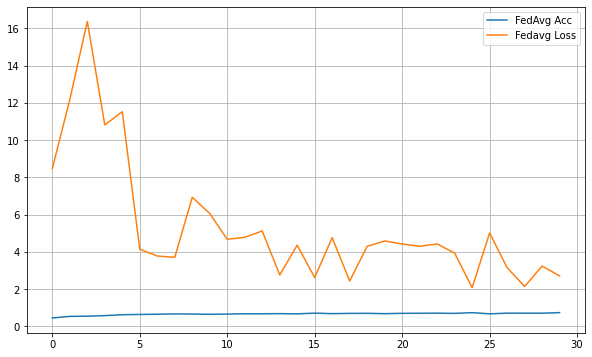

In [16]:
num = 3
average_acc_list, average_loss_list = [], []

for i in range(1,31):
    tmp_a, tmp_l = 0, 0
    for j in range(num):
        tmp_a = tmp_a + np.mean(globals()['acc{}'.format(j)][i])
        tmp_l = tmp_l + np.mean(globals()['loss{}'.format(j)][i])    
        
    average_acc_list.append(tmp_a/num)
    average_loss_list.append(tmp_l/num)   
    
plt.figure(figsize=(10,6))
plt.plot(average_acc_list, label='FedAvg Acc')
plt.plot(average_loss_list, label='Fedavg Loss')

plt.grid(True)
plt.legend()
plt.show()

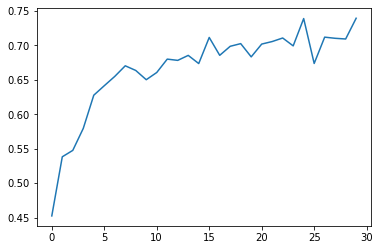

In [17]:
plt.plot(average_acc_list, label='FedAvg Acc')
plt.show()

In [18]:
print(average_acc_list,'\n') 
print(average_loss_list)

[0.4524555576344331, 0.538246666888396, 0.5475477791494794, 0.5794800019098653, 0.6276111128429571, 0.6413655549287797, 0.6548877793881628, 0.6702822203437487, 0.6635077779491743, 0.650098891556263, 0.6605611132250893, 0.6799744471907615, 0.678153333067894, 0.6853855537043677, 0.673541112906403, 0.7114100023276276, 0.6854822168747584, 0.6985844441586071, 0.7024533312353823, 0.6832499985065725, 0.7018022203611003, 0.7054844427439901, 0.710623334430986, 0.6991899971332814, 0.7388244450092317, 0.6736644418703186, 0.7118522230949668, 0.7101866660846604, 0.7091766686075264, 0.7392855547368526] 

[8.47609352270762, 12.180127317375607, 16.375111081865096, 10.820622810390262, 11.528652628262838, 4.147111446989907, 3.7801050682862596, 3.708907545937432, 6.9340493188964, 6.062731490532557, 4.676736385954751, 4.785017244683371, 5.124575774537193, 2.7634114967452157, 4.360685469706853, 2.622466490666071, 4.768311339616775, 2.435648759206136, 4.3006670872370405, 4.588524256812201, 4.423067552513546

# FedSGD

In [19]:
acc0 = [[], [0.195700004696846, 0.1736000031232834, 0.10989999771118164, 0.26179999113082886, 0.10000000149011612, 0.2809999883174896, 0.31929999589920044, 0.2874999940395355, 0.10000000149011612, 0.10000000149011612, 0.35409998893737793, 0.4275999963283539, 0.41999998688697815, 0.2770000100135803, 0.10000000149011612, 0.35580000281333923, 0.19329999387264252, 0.4000000059604645, 0.18940000236034393, 0.31189998984336853, 0.10000000149011612, 0.18279999494552612, 0.19189999997615814, 0.10000000149011612, 0.3441999852657318, 0.37610000371932983, 0.19130000472068787, 0.47350001335144043, 0.2897000014781952, 0.3158999979496002], [0.40869998931884766, 0.3675000071525574, 0.37709999084472656, 0.2694000005722046, 0.29789999127388, 0.12939999997615814, 0.4787999987602234, 0.28450000286102295, 0.10000000149011612, 0.39739999175071716, 0.10000000149011612, 0.3165000081062317, 0.39910000562667847, 0.3294000029563904, 0.4154999852180481, 0.10000000149011612, 0.23409999907016754, 0.4172999858856201, 0.4066999852657318, 0.3057999908924103, 0.48190000653266907, 0.3700000047683716, 0.4088999927043915, 0.23029999434947968, 0.25929999351501465, 0.2337000072002411, 0.3571999967098236, 0.46720001101493835, 0.15549999475479126, 0.4194999933242798], [0.32330000400543213, 0.48100000619888306, 0.3091000020503998, 0.39660000801086426, 0.38350000977516174, 0.3102000057697296, 0.3637999892234802, 0.23019999265670776, 0.46230000257492065, 0.2709999978542328, 0.48500001430511475, 0.3463999927043915, 0.3804999887943268, 0.34290000796318054, 0.43470001220703125, 0.604200005531311, 0.3817000091075897, 0.19930000603199005, 0.46070000529289246, 0.4661000072956085, 0.4352000057697296, 0.4643000066280365, 0.3508000075817108, 0.4327999949455261, 0.448199987411499, 0.4498000144958496, 0.44179999828338623, 0.43389999866485596, 0.3472000062465668, 0.41510000824928284], [0.3675000071525574, 0.10000000149011612, 0.5054000020027161, 0.10000000149011612, 0.4027000069618225, 0.5552999973297119, 0.43529999256134033, 0.5534999966621399, 0.5539000034332275, 0.49219998717308044, 0.503000020980835, 0.48510000109672546, 0.3580000102519989, 0.44359999895095825, 0.36169999837875366, 0.6193000078201294, 0.2732999920845032, 0.524399995803833, 0.3950999975204468, 0.250900000333786, 0.42559999227523804, 0.41609999537467957, 0.5121999979019165, 0.2498999983072281, 0.10010000318288803, 0.4528000056743622, 0.4235000014305115, 0.10000000149011612, 0.3100999891757965, 0.3490000069141388], [0.4846999943256378, 0.10000000149011612, 0.36910000443458557, 0.5627999901771545, 0.5016000270843506, 0.5005999803543091, 0.26429998874664307, 0.43950000405311584, 0.4828000068664551, 0.39430001378059387, 0.3619000017642975, 0.5942999720573425, 0.421099990606308, 0.4690999984741211, 0.6067000031471252, 0.34779998660087585, 0.5303999781608582, 0.5928999781608582, 0.6292999982833862, 0.10000000149011612, 0.3068000078201294, 0.25999999046325684, 0.5465999841690063, 0.5867999792098999, 0.36719998717308044, 0.10000000149011612, 0.36959999799728394, 0.4657999873161316, 0.536300003528595, 0.4138999879360199], [0.609499990940094, 0.44350001215934753, 0.628000020980835, 0.3467999994754791, 0.512499988079071, 0.5390999913215637, 0.5716999769210815, 0.49970000982284546, 0.5720000267028809, 0.45739999413490295, 0.5586000084877014, 0.5151000022888184, 0.46389999985694885, 0.10000000149011612, 0.4715000092983246, 0.5667999982833862, 0.5651999711990356, 0.5679000020027161, 0.4959000051021576, 0.48669999837875366, 0.10000000149011612, 0.3946000039577484, 0.4957999885082245, 0.5289999842643738, 0.4729999899864197, 0.3156999945640564, 0.5997999906539917, 0.46549999713897705, 0.4602000117301941, 0.40149998664855957], [0.6534000039100647, 0.4059000015258789, 0.5368000268936157, 0.10000000149011612, 0.5667999982833862, 0.10000000149011612, 0.46070000529289246, 0.5002999901771545, 0.5871000289916992, 0.47850000858306885, 0.6837999820709229, 0.5501999855041504, 0.5613999962806702, 0.5949000120162964, 0.477400004863739, 0.42570000886917114, 0.5648999810218811, 0.2865000069141388, 0.5891000032424927, 0.5029000043869019, 0.6894999742507935, 0.5896999835968018, 0.5587999820709229, 0.48089998960494995, 0.40209999680519104, 0.6022999882698059, 0.5094000101089478, 0.5480999946594238, 0.5623000264167786, 0.42309999465942383], [0.10000000149011612, 0.41929998993873596, 0.5221999883651733, 0.10000000149011612, 0.5084999799728394, 0.5940999984741211, 0.48260000348091125, 0.5465999841690063, 0.5522000193595886, 0.6704999804496765, 0.5353999733924866, 0.6898000240325928, 0.5830000042915344, 0.5982999801635742, 0.4778999984264374, 0.5885999798774719, 0.5439000129699707, 0.5835999846458435, 0.6464999914169312, 0.5432000160217285, 0.6500999927520752, 0.6324999928474426, 0.47690001130104065, 0.4943999946117401, 0.4632999897003174, 0.10000000149011612, 0.10000000149011612, 0.5241000056266785, 0.5871000289916992, 0.6137999892234802], [0.550599992275238, 0.3671000003814697, 0.33570000529289246, 0.4797999858856201, 0.6026999950408936, 0.6929000020027161, 0.645799994468689, 0.6452999711036682, 0.617900013923645, 0.4959999918937683, 0.550599992275238, 0.47839999198913574, 0.10000000149011612, 0.6935999989509583, 0.6618000268936157, 0.451200008392334, 0.5999000072479248, 0.6283000111579895, 0.6151000261306763, 0.5604000091552734, 0.5810999870300293, 0.6428999900817871, 0.4706999957561493, 0.6183000206947327, 0.49799999594688416, 0.5533000230789185, 0.4961000084877014, 0.5932999849319458, 0.6460000276565552, 0.6226999759674072], [0.6373999714851379, 0.6320000290870667, 0.676800012588501, 0.6086999773979187, 0.10000000149011612, 0.6593999862670898, 0.4544000029563904, 0.6554999947547913, 0.64410001039505, 0.506600022315979, 0.6065999865531921, 0.10000000149011612, 0.6859999895095825, 0.5667999982833862, 0.3878999948501587, 0.6455000042915344, 0.574400007724762, 0.6011999845504761, 0.6657999753952026, 0.6485000252723694, 0.6355999708175659, 0.5976999998092651, 0.4936000108718872, 0.6259999871253967, 0.10000000149011612, 0.6466000080108643, 0.553600013256073, 0.6022999882698059, 0.4918000102043152, 0.5482000112533569], [0.621999979019165, 0.10000000149011612, 0.5569000244140625, 0.6421999931335449, 0.6456999778747559, 0.5127999782562256, 0.6589000225067139, 0.6412000060081482, 0.5777999758720398, 0.5997999906539917, 0.6847000122070312, 0.5940999984741211, 0.6395999789237976, 0.120899997651577, 0.6159999966621399, 0.6333000063896179, 0.5752000212669373, 0.6633999943733215, 0.65829998254776, 0.6473000049591064, 0.613099992275238, 0.6851000189781189, 0.5835999846458435, 0.5703999996185303, 0.6938999891281128, 0.6100000143051147, 0.659600019454956, 0.6305999755859375, 0.6725000143051147, 0.4000999927520752], [0.684499979019165, 0.6862999796867371, 0.5684999823570251, 0.10000000149011612, 0.10000000149011612, 0.6621999740600586, 0.5497000217437744, 0.6478999853134155, 0.5860000252723694, 0.7168999910354614, 0.6787999868392944, 0.598800003528595, 0.6477000117301941, 0.23999999463558197, 0.6312999725341797, 0.6054999828338623, 0.4853000044822693, 0.5940999984741211, 0.6043999791145325, 0.6409000158309937, 0.5415999889373779, 0.10000000149011612, 0.7041000127792358, 0.64410001039505, 0.6087999939918518, 0.6541000008583069, 0.10000000149011612, 0.6780999898910522, 0.46149998903274536, 0.6990000009536743], [0.6656000018119812, 0.6335999965667725, 0.6229000091552734, 0.6209999918937683, 0.6901000142097473, 0.5131000280380249, 0.6740999817848206, 0.498199999332428, 0.6266999840736389, 0.6347000002861023, 0.5616000294685364, 0.47909998893737793, 0.649399995803833, 0.7003999948501587, 0.6412000060081482, 0.6313999891281128, 0.4950999915599823, 0.5807999968528748, 0.6080999970436096, 0.6488000154495239, 0.6373999714851379, 0.6438999772071838, 0.6531999707221985, 0.699999988079071, 0.6144999861717224, 0.20990000665187836, 0.6909999847412109, 0.5993000268936157, 0.5800999999046326, 0.6990000009536743], [0.6819000244140625, 0.7305999994277954, 0.690500020980835, 0.10000000149011612, 0.6658999919891357, 0.6571999788284302, 0.6032999753952026, 0.5662999749183655, 0.6398000121116638, 0.6097999811172485, 0.7203999757766724, 0.6730999946594238, 0.6675999760627747, 0.6360999941825867, 0.7003999948501587, 0.6974999904632568, 0.7031000256538391, 0.6230999827384949, 0.6639000177383423, 0.7199000120162964, 0.6754000186920166, 0.10000000149011612, 0.6269000172615051, 0.6349999904632568, 0.6455000042915344, 0.621399998664856, 0.67330002784729, 0.6996999979019165, 0.10000000149011612, 0.13079999387264252], [0.6725000143051147, 0.640999972820282, 0.67330002784729, 0.5968999862670898, 0.7081999778747559, 0.6837999820709229, 0.6534000039100647, 0.262800008058548, 0.633899986743927, 0.6238999962806702, 0.6154999732971191, 0.7092000246047974, 0.7139999866485596, 0.6675000190734863, 0.6406000256538391, 0.7157999873161316, 0.6643999814987183, 0.6855999827384949, 0.5626999735832214, 0.6151999831199646, 0.7167999744415283, 0.6326000094413757, 0.7044000029563904, 0.5752000212669373, 0.10199999809265137, 0.607200026512146, 0.7229999899864197, 0.7089999914169312, 0.6934000253677368, 0.7074999809265137], [0.7211999893188477, 0.6934999823570251, 0.671500027179718, 0.6431000232696533, 0.6699000000953674, 0.6855999827384949, 0.6596999764442444, 0.6794999837875366, 0.10000000149011612, 0.3280999958515167, 0.6266000270843506, 0.6589999794960022, 0.3377000093460083, 0.6759999990463257, 0.6775000095367432, 0.6485999822616577, 0.6935999989509583, 0.7129999995231628, 0.6732000112533569, 0.6046000123023987, 0.6568999886512756, 0.6747000217437744, 0.31850001215934753, 0.6560999751091003, 0.6614999771118164, 0.6832000017166138, 0.6438999772071838, 0.7039999961853027, 0.6917999982833862, 0.546500027179718], [0.642799973487854, 0.6455000042915344, 0.6499000191688538, 0.11919999867677689, 0.6984000205993652, 0.6689000129699707, 0.6766999959945679, 0.708299994468689, 0.6394000053405762, 0.5932000279426575, 0.5008999705314636, 0.6567000150680542, 0.6108999848365784, 0.7156999707221985, 0.6895999908447266, 0.6693999767303467, 0.6456999778747559, 0.728600025177002, 0.5741999745368958, 0.7516999840736389, 0.10010000318288803, 0.6730999946594238, 0.6373000144958496, 0.6504999995231628, 0.65829998254776, 0.7016000151634216, 0.6624000072479248, 0.7142999768257141, 0.1753000020980835, 0.6590999960899353], [0.6915000081062317, 0.6769000291824341, 0.641700029373169, 0.6207000017166138, 0.6610999703407288, 0.5497000217437744, 0.5788000226020813, 0.6467000246047974, 0.7264999747276306, 0.6607000231742859, 0.6675000190734863, 0.7186999917030334, 0.34610000252723694, 0.5579000115394592, 0.6308000087738037, 0.6895999908447266, 0.6894000172615051, 0.7024999856948853, 0.7317000031471252, 0.6628000140190125, 0.7160999774932861, 0.7300999760627747, 0.6489999890327454, 0.7055000066757202, 0.6370000243186951, 0.6769999861717224, 0.6811000108718872, 0.6973000168800354, 0.7167999744415283, 0.10000000149011612], [0.623199999332428, 0.6858999729156494, 0.7106000185012817, 0.7480999827384949, 0.6022999882698059, 0.6384999752044678, 0.6442999839782715, 0.7056000232696533, 0.6945000290870667, 0.10040000081062317, 0.10170000046491623, 0.6575999855995178, 0.7077000141143799, 0.6801000237464905, 0.6998000144958496, 0.6985999941825867, 0.10170000046491623, 0.722100019454956, 0.6916000247001648, 0.7376000285148621, 0.7177000045776367, 0.5936999917030334, 0.164000004529953, 0.6794999837875366, 0.7271999716758728, 0.5421000123023987, 0.708899974822998, 0.6567999720573425, 0.10000000149011612, 0.6496000289916992], [0.7386000156402588, 0.10000000149011612, 0.692300021648407, 0.49480000138282776, 0.7008000016212463, 0.7200999855995178, 0.5396999716758728, 0.7254999876022339, 0.6890000104904175, 0.6682999730110168, 0.10000000149011612, 0.10000000149011612, 0.7318000197410583, 0.5709999799728394, 0.6708999872207642, 0.698199987411499, 0.6319000124931335, 0.10119999945163727, 0.6632999777793884, 0.10209999978542328, 0.6362000107765198, 0.6963000297546387, 0.652999997138977, 0.7368000149726868, 0.7566999793052673, 0.714900016784668, 0.6360999941825867, 0.6549999713897705, 0.6891999840736389, 0.6480000019073486], [0.6593000292778015, 0.7258999943733215, 0.6876999735832214, 0.6373000144958496, 0.703000009059906, 0.6195999979972839, 0.6062999963760376, 0.6830999851226807, 0.7179999947547913, 0.7455999851226807, 0.6096000075340271, 0.6532999873161316, 0.6700000166893005, 0.732200026512146, 0.7049000263214111, 0.6836000084877014, 0.7027000188827515, 0.699400007724762, 0.10000000149011612, 0.6952000260353088, 0.10000000149011612, 0.7310000061988831, 0.7247999906539917, 0.6837999820709229, 0.708299994468689, 0.7343000173568726, 0.7160000205039978, 0.718999981880188, 0.6644999980926514, 0.659500002861023], [0.7232000231742859, 0.5169000029563904, 0.7250000238418579, 0.7117000222206116, 0.6693000197410583, 0.5394999980926514, 0.21220000088214874, 0.3702000081539154, 0.7239999771118164, 0.6891000270843506, 0.6869000196456909, 0.7458999752998352, 0.6456999778747559, 0.5285999774932861, 0.7221999764442444, 0.49939998984336853, 0.7398999929428101, 0.6818000078201294, 0.7242000102996826, 0.7319999933242798, 0.6969000101089478, 0.6759999990463257, 0.6682000160217285, 0.7053999900817871, 0.19629999995231628, 0.633400022983551, 0.7336999773979187, 0.6603000164031982, 0.7397000193595886, 0.6809999942779541], [0.7336999773979187, 0.7111999988555908, 0.5062999725341797, 0.6711999773979187, 0.6819999814033508, 0.7127000093460083, 0.6830000281333923, 0.7235000133514404, 0.10000000149011612, 0.6951000094413757, 0.7021999955177307, 0.7081999778747559, 0.730400025844574, 0.7523000240325928, 0.7208999991416931, 0.7052000164985657, 0.707099974155426, 0.6815999746322632, 0.7299000024795532, 0.7275000214576721, 0.7261999845504761, 0.6980000138282776, 0.7246000170707703, 0.6653000116348267, 0.7235000133514404, 0.10000000149011612, 0.6173999905586243, 0.6704999804496765, 0.14480000734329224, 0.7049000263214111], [0.6875, 0.6966999769210815, 0.7371000051498413, 0.7626000046730042, 0.7384999990463257, 0.6173999905586243, 0.6330999732017517, 0.10000000149011612, 0.7603999972343445, 0.7609999775886536, 0.7224000096321106, 0.6843000054359436, 0.7178999781608582, 0.732699990272522, 0.6976000070571899, 0.722000002861023, 0.6833999752998352, 0.7340999841690063, 0.5907999873161316, 0.625, 0.6477000117301941, 0.6872000098228455, 0.6550999879837036, 0.7394000291824341, 0.10000000149011612, 0.6894000172615051, 0.6675000190734863, 0.6079000234603882, 0.6789000034332275, 0.671500027179718], [0.6898000240325928, 0.7400000095367432, 0.6025999784469604, 0.6736000180244446, 0.723800003528595, 0.7311000227928162, 0.7372999787330627, 0.4900999963283539, 0.7222999930381775, 0.6676999926567078, 0.73089998960495, 0.5557000041007996, 0.6588000059127808, 0.7408999800682068, 0.7443000078201294, 0.6746000051498413, 0.713100016117096, 0.6740999817848206, 0.758899986743927, 0.7243000268936157, 0.7110999822616577, 0.6567000150680542, 0.6875, 0.1177000030875206, 0.7384999990463257, 0.680899977684021, 0.7343999743461609, 0.6657999753952026, 0.7361000180244446, 0.10000000149011612], [0.36010000109672546, 0.7050999999046326, 0.7282000184059143, 0.6226000189781189, 0.6872000098228455, 0.11789999902248383, 0.7300000190734863, 0.6967999935150146, 0.7404999732971191, 0.592199981212616, 0.7265999913215637, 0.7265999913215637, 0.684499979019165, 0.7074999809265137, 0.6819999814033508, 0.6758999824523926, 0.7196999788284302, 0.6897000074386597, 0.6234999895095825, 0.7005000114440918, 0.722000002861023, 0.7221999764442444, 0.6916999816894531, 0.715399980545044, 0.7013000249862671, 0.6987000107765198, 0.10000000149011612, 0.6998999714851379, 0.711899995803833, 0.10000000149011612], [0.7533000111579895, 0.6258000135421753, 0.7662000060081482, 0.6711000204086304, 0.7127000093460083, 0.6837000250816345, 0.7465000152587891, 0.6758999824523926, 0.10000000149011612, 0.7416999936103821, 0.646399974822998, 0.7386000156402588, 0.7300999760627747, 0.7185999751091003, 0.7538999915122986, 0.739799976348877, 0.6384000182151794, 0.6926000118255615, 0.6694999933242798, 0.7727000117301941, 0.6061000227928162, 0.5979999899864197, 0.7319999933242798, 0.7660999894142151, 0.6492000222206116, 0.7261999845504761, 0.715399980545044, 0.49950000643730164, 0.7422999739646912, 0.6847000122070312], [0.7239000201225281, 0.7250999808311462, 0.7253999710083008, 0.7506999969482422, 0.6818000078201294, 0.7233999967575073, 0.6901999711990356, 0.7425000071525574, 0.2930000126361847, 0.4438000023365021, 0.729200005531311, 0.6735000014305115, 0.7692999839782715, 0.7628999948501587, 0.1290999948978424, 0.5695000290870667, 0.7419000267982483, 0.7436000108718872, 0.20479999482631683, 0.705299973487854, 0.661899983882904, 0.7684000134468079, 0.6897000074386597, 0.6798999905586243, 0.7235999703407288, 0.7635999917984009, 0.7269999980926514, 0.7213000059127808, 0.7059000134468079, 0.2280000001192093], [0.6575000286102295, 0.7027999758720398, 0.7336999773979187, 0.7554000020027161, 0.6017000079154968, 0.10000000149011612, 0.7315000295639038, 0.7389000058174133, 0.5806999802589417, 0.742900013923645, 0.6241999864578247, 0.7368000149726868, 0.7526000142097473, 0.5891000032424927, 0.6898000240325928, 0.7014999985694885, 0.6850000023841858, 0.7401999831199646, 0.703000009059906, 0.720300018787384, 0.6883999705314636, 0.10779999941587448, 0.19200000166893005, 0.6636000275611877, 0.7687000036239624, 0.715499997138977, 0.714900016784668, 0.6111999750137329, 0.396699994802475, 0.7074999809265137], [0.7179999947547913, 0.6381000280380249, 0.6741999983787537, 0.7046999931335449, 0.7416999936103821, 0.6714000105857849, 0.6807000041007996, 0.722000002861023, 0.6915000081062317, 0.6660000085830688, 0.6783000230789185, 0.6700999736785889, 0.7603999972343445, 0.7777000069618225, 0.7487999796867371, 0.7386999726295471, 0.7282999753952026, 0.10909999907016754, 0.7423999905586243, 0.7287999987602234, 0.6251000165939331, 0.7486000061035156, 0.6662999987602234, 0.5928999781608582, 0.7139000296592712, 0.736299991607666, 0.6093000173568726, 0.7409999966621399, 0.6536999940872192, 0.6753000020980835]]
loss0 = [[], [2.576965808868408, 2.249986410140991, 2.255868434906006, 2.2015860080718994, 2.604351758956909, 2.194617748260498, 2.064380168914795, 2.0149600505828857, 3.3335793018341064, 3.3567800521850586, 1.8864575624465942, 1.9388201236724854, 2.097196340560913, 2.093151092529297, 3.6786656379699707, 2.175614356994629, 2.291043281555176, 2.0724008083343506, 2.378115177154541, 1.9969263076782227, 8.954625129699707, 3.4090065956115723, 2.2574586868286133, 2.480905055999756, 2.093116044998169, 2.154327630996704, 2.1948938369750977, 1.930172324180603, 2.09895920753479, 2.1763293743133545], [1.6753902435302734, 1.9351601600646973, 1.9932729005813599, 2.1247153282165527, 2.031660556793213, 2.300718069076538, 1.8950642347335815, 2.7977123260498047, 29.632280349731445, 2.1353399753570557, 45.74929428100586, 2.276395559310913, 1.8510574102401733, 1.7542804479599, 1.5714997053146362, 20.092811584472656, 2.110950469970703, 1.4327362775802612, 2.041205883026123, 1.8947505950927734, 1.6423099040985107, 1.8332834243774414, 1.7763255834579468, 4.413965225219727, 2.2199323177337646, 4.16791296005249, 1.7135015726089478, 1.4016437530517578, 2.3237664699554443, 1.8199849128723145], [3.000579595565796, 1.8429034948349, 1.9831513166427612, 1.8725470304489136, 1.892982006072998, 2.332899332046509, 1.8376437425613403, 4.323193550109863, 1.6756117343902588, 4.74543571472168, 1.6358987092971802, 2.156771421432495, 1.7800182104110718, 2.1271464824676514, 1.8525382280349731, 1.4490491151809692, 2.9186882972717285, 4.670517921447754, 2.2750282287597656, 1.7963863611221313, 1.5464375019073486, 1.7886145114898682, 1.9313169717788696, 1.9039939641952515, 1.6327688694000244, 1.8874205350875854, 1.676037073135376, 1.6190760135650635, 2.5266129970550537, 1.6584910154342651], [1.651773452758789, 15.67147159576416, 1.802488088607788, 59.30183029174805, 2.2110047340393066, 1.2554928064346313, 1.5881712436676025, 1.2491103410720825, 1.3482621908187866, 1.4150007963180542, 1.862673044204712, 1.6314893960952759, 1.6597120761871338, 1.630842924118042, 1.822904348373413, 1.2069212198257446, 3.2944414615631104, 1.238723874092102, 1.6854299306869507, 4.602659225463867, 1.5020968914031982, 1.613121509552002, 1.4761954545974731, 2.7588181495666504, 5.515913963317871, 1.4953354597091675, 1.537592887878418, 32.38412857055664, 1.8587557077407837, 2.5213000774383545], [1.906601905822754, 21.50821304321289, 2.1559576988220215, 1.3622608184814453, 1.4140607118606567, 1.8171271085739136, 4.283144950866699, 1.3828798532485962, 2.295713424682617, 1.6646562814712524, 2.024710178375244, 1.4991263151168823, 1.7419244050979614, 1.4884806871414185, 1.102249264717102, 3.269198417663574, 2.4546658992767334, 1.2907366752624512, 1.3926794528961182, 19.128280639648438, 1.782913327217102, 1.880597710609436, 1.5053659677505493, 1.4280096292495728, 2.3484907150268555, 17.412668228149414, 1.7038027048110962, 2.2154700756073, 1.5661745071411133, 1.6390748023986816], [1.1987920999526978, 1.3191522359848022, 1.0647015571594238, 1.5513319969177246, 1.3440920114517212, 1.4369913339614868, 1.4061474800109863, 1.3861174583435059, 1.319170355796814, 1.520531415939331, 1.3618258237838745, 1.498695969581604, 2.3042469024658203, 4.961079120635986, 1.6698129177093506, 1.3089120388031006, 1.42971670627594, 1.3988741636276245, 1.4392575025558472, 1.401136875152588, 44.13023376464844, 1.6908622980117798, 1.3631523847579956, 1.3798166513442993, 1.687304139137268, 4.567127704620361, 1.4195902347564697, 1.7296314239501953, 1.463441014289856, 1.7474234104156494], [1.2297908067703247, 2.088441848754883, 1.158257246017456, 33.57761764526367, 1.5724234580993652, 16.10980796813965, 2.0413777828216553, 1.4741326570510864, 1.177443027496338, 3.174255132675171, 1.0066120624542236, 1.3357573747634888, 2.1375327110290527, 1.221648097038269, 2.2775676250457764, 1.2910583019256592, 1.2692197561264038, 3.137035369873047, 1.483973503112793, 1.6684236526489258, 0.8652613162994385, 1.3380763530731201, 1.3085695505142212, 1.8592802286148071, 2.0299174785614014, 1.1882938146591187, 1.6029614210128784, 1.2810993194580078, 1.5367628335952759, 1.6070959568023682], [21.697999954223633, 3.1135387420654297, 1.6376676559448242, 33.030574798583984, 1.5076489448547363, 1.1502753496170044, 1.5746046304702759, 1.23514723777771, 1.2335444688796997, 0.8725876212120056, 1.4028847217559814, 1.0295517444610596, 1.0338683128356934, 1.0541049242019653, 2.462677240371704, 1.1148995161056519, 1.7706507444381714, 1.1595185995101929, 1.1946184635162354, 1.3976384401321411, 0.9969721436500549, 1.085774540901184, 1.7255316972732544, 1.273485541343689, 1.6564252376556396, 56.58441162109375, 26.55174446105957, 1.4739220142364502, 1.149124026298523, 1.1969245672225952], [1.1131993532180786, 1.6390588283538818, 2.5317635536193848, 1.806760311126709, 1.1064399480819702, 1.01353120803833, 1.0013998746871948, 0.9926468729972839, 1.0706110000610352, 1.4513437747955322, 1.2251189947128296, 1.911575198173523, 15.662667274475098, 0.8445613980293274, 0.9063824415206909, 2.125065803527832, 1.1398966312408447, 1.0962179899215698, 1.0428582429885864, 1.5556755065917969, 1.1567909717559814, 0.9557884931564331, 1.3300199508666992, 1.094409465789795, 1.5431240797042847, 1.1704336404800415, 1.2502846717834473, 1.2322734594345093, 1.2342735528945923, 1.2606207132339478], [0.9443414211273193, 1.1157652139663696, 0.9996576309204102, 1.0784995555877686, 15.366857528686523, 0.924302339553833, 1.847232460975647, 1.0194592475891113, 0.9984574913978577, 2.040799140930176, 1.812253475189209, 24.026857376098633, 0.9985194206237793, 1.5325086116790771, 3.0263893604278564, 1.0150911808013916, 1.4587974548339844, 1.4973245859146118, 1.1189814805984497, 0.9408613443374634, 1.0101020336151123, 1.1174167394638062, 2.071484088897705, 1.0624449253082275, 21.550302505493164, 1.0222303867340088, 1.4492592811584473, 1.0427157878875732, 1.3151330947875977, 1.9309360980987549], [1.0908191204071045, 19.953542709350586, 1.1478887796401978, 1.0157843828201294, 0.9478312730789185, 1.3541160821914673, 0.8943939208984375, 1.1252621412277222, 1.4615817070007324, 1.1734449863433838, 0.9814875721931458, 1.0395019054412842, 1.0594452619552612, 14.4031343460083, 1.0665313005447388, 1.0297619104385376, 1.8106818199157715, 1.0999548435211182, 1.0143431425094604, 0.9992324113845825, 1.0372835397720337, 0.888917088508606, 1.1864264011383057, 1.0527700185775757, 0.81595778465271, 1.001518726348877, 1.0565189123153687, 1.0895415544509888, 0.8970727324485779, 3.6200602054595947], [0.9403721690177917, 0.880801260471344, 1.0978862047195435, 32.02108383178711, 15.251640319824219, 1.1261056661605835, 2.8895976543426514, 1.0251991748809814, 1.2628651857376099, 0.8739209771156311, 0.9401496052742004, 1.2221018075942993, 0.9914823174476624, 7.446916580200195, 1.0175496339797974, 1.709256887435913, 1.6065266132354736, 1.9447896480560303, 1.5208301544189453, 0.9843782186508179, 1.4154905080795288, 20.735727310180664, 1.0751193761825562, 1.1216412782669067, 1.2008311748504639, 0.849070131778717, 24.557207107543945, 0.8732823133468628, 1.4301478862762451, 0.9413887858390808], [0.9452949166297913, 1.043063759803772, 1.1189241409301758, 1.9397128820419312, 0.9070500135421753, 2.0883872509002686, 0.9460858106613159, 2.2184524536132812, 1.350799560546875, 1.1413408517837524, 1.3868886232376099, 1.8310816287994385, 1.1332886219024658, 0.8655421137809753, 0.9706541299819946, 0.9728222489356995, 2.1742448806762695, 1.2456265687942505, 1.1133804321289062, 1.0405964851379395, 0.9298896193504333, 0.9637293219566345, 1.4443986415863037, 0.840438961982727, 1.3106356859207153, 3.541560649871826, 0.9086161851882935, 1.0709954500198364, 1.3764071464538574, 0.8148810267448425], [0.8612629771232605, 0.7653928399085999, 1.0629899501800537, 26.641752243041992, 0.8844930529594421, 0.9040800929069519, 1.0798603296279907, 2.16288423538208, 1.1969068050384521, 1.065169095993042, 0.9192179441452026, 0.9249642491340637, 0.9043432474136353, 0.9641655087471008, 0.7817248702049255, 0.9034237265586853, 0.8262786865234375, 1.041608452796936, 0.8855525255203247, 0.7480814456939697, 0.9139925837516785, 9.304183006286621, 1.3741471767425537, 0.9697955846786499, 0.9211399555206299, 0.9657555818557739, 1.0602959394454956, 0.8201646208763123, 31.541240692138672, 6.0532732009887695], [0.9389987587928772, 1.0418000221252441, 0.8435260653495789, 1.795750379562378, 0.8122608661651611, 0.9025355577468872, 1.2142596244812012, 4.71021032333374, 1.082024335861206, 1.105562448501587, 1.0568453073501587, 0.8699891567230225, 0.7756813168525696, 1.1972322463989258, 1.1504168510437012, 0.9056644439697266, 1.0593217611312866, 0.9243948459625244, 1.9645562171936035, 1.1482698917388916, 0.7996211647987366, 1.068709373474121, 1.0948333740234375, 1.3453863859176636, 11.158585548400879, 1.1557995080947876, 0.8130947351455688, 0.8056782484054565, 0.9500678777694702, 1.1604055166244507], [0.8887454271316528, 0.8496423959732056, 1.1169873476028442, 1.0071325302124023, 0.9676816463470459, 0.9085991382598877, 0.9181682467460632, 0.8804457783699036, 11.114933967590332, 3.5108346939086914, 1.2871474027633667, 1.015832781791687, 2.151916265487671, 0.8015391826629639, 0.836514949798584, 1.274398684501648, 0.9153459072113037, 0.8093504309654236, 0.8718245029449463, 1.3995722532272339, 1.0280251502990723, 0.9589045643806458, 4.198780536651611, 0.9458770751953125, 0.9003880023956299, 0.9055575132369995, 1.0203224420547485, 0.771994948387146, 0.9114779233932495, 1.7965320348739624], [1.0974072217941284, 0.9629871845245361, 0.9708752632141113, 8.912564277648926, 0.9229620099067688, 1.0301421880722046, 0.857824981212616, 0.8903687596321106, 0.9338909387588501, 1.1793988943099976, 2.6057870388031006, 0.9412341713905334, 1.0599932670593262, 0.9078578352928162, 1.0135512351989746, 0.8802174925804138, 1.699633002281189, 0.761009156703949, 1.6410433053970337, 0.7442288994789124, 12.074471473693848, 1.0126588344573975, 1.2560393810272217, 1.0553147792816162, 1.0023306608200073, 0.8375310301780701, 1.399125337600708, 0.8166854977607727, 5.427415370941162, 1.066020131111145], [0.8382572531700134, 1.0505003929138184, 1.5910305976867676, 1.217529535293579, 1.0786519050598145, 1.0394972562789917, 1.5345121622085571, 1.2551828622817993, 0.7245876789093018, 0.9945598840713501, 0.9339215755462646, 0.8008959889411926, 2.3712985515594482, 1.3536757230758667, 1.260561466217041, 0.992996096611023, 0.8916081786155701, 0.7984337210655212, 0.9395225644111633, 1.0481133460998535, 0.7539008259773254, 0.7810428142547607, 1.0358939170837402, 0.7987544536590576, 1.3289886713027954, 0.8884433507919312, 0.8072162866592407, 0.9298507571220398, 0.8665459752082825, 15.181315422058105], [1.1545478105545044, 0.8965530395507812, 1.0974448919296265, 0.7654123902320862, 1.3520244359970093, 1.527949333190918, 1.0180813074111938, 0.9682980179786682, 0.8695938587188721, 9.359712600708008, 7.880063056945801, 0.9454414248466492, 0.8024728298187256, 0.9877213835716248, 0.8359543085098267, 0.9055795669555664, 4.872914791107178, 0.7909894585609436, 0.9841752648353577, 0.7910845279693604, 1.1431225538253784, 1.3853482007980347, 6.552148342132568, 0.9745866060256958, 0.757206380367279, 1.860589861869812, 0.9827290773391724, 1.0121592283248901, 58.777156829833984, 0.9695140719413757], [0.8905057907104492, 19.503257751464844, 1.192498803138733, 1.8862144947052002, 0.8120110034942627, 0.818498969078064, 1.6166415214538574, 0.7545010447502136, 0.9830982685089111, 0.8890801668167114, 18.930694580078125, 13.361321449279785, 0.7149339318275452, 1.4573545455932617, 0.8976232409477234, 0.8455668687820435, 1.0773593187332153, 7.112395286560059, 1.091475248336792, 10.844396591186523, 1.0598251819610596, 1.2650225162506104, 0.9655062556266785, 0.718654453754425, 0.6617146730422974, 0.7672426700592041, 0.9031417965888977, 1.078473687171936, 1.437463402748108, 1.0648223161697388], [1.1645909547805786, 0.7222412824630737, 0.8656625747680664, 0.9795117378234863, 0.7653918862342834, 1.043760061264038, 0.9496632814407349, 0.8838869333267212, 0.7938439249992371, 0.694526731967926, 1.3223304748535156, 1.8772401809692383, 1.0427064895629883, 0.9624982476234436, 0.7907299399375916, 0.8071802854537964, 0.7320060729980469, 0.8081077933311462, 43.326534271240234, 0.8443837761878967, 12.917906761169434, 0.7451285123825073, 0.7533918619155884, 0.8048642873764038, 0.8411952257156372, 0.7410933375358582, 0.7502270340919495, 0.8672745227813721, 0.9468827247619629, 1.202358603477478], [0.7322242259979248, 2.1453237533569336, 0.8335444331169128, 0.8844528198242188, 1.0062010288238525, 1.5473649501800537, 4.070776462554932, 2.7578678131103516, 0.7350867390632629, 0.9160584807395935, 1.0187230110168457, 0.8198739290237427, 0.9305707216262817, 1.8124994039535522, 0.9857038855552673, 1.7858513593673706, 0.7827175855636597, 0.9418743252754211, 0.8689233660697937, 0.7668200731277466, 0.8187627196311951, 0.8180776238441467, 1.2273720502853394, 0.8301604390144348, 3.75531005859375, 1.1309973001480103, 0.8538069128990173, 0.9179961085319519, 0.7968065142631531, 0.9047514796257019], [0.7681065797805786, 0.7427673935890198, 2.183739185333252, 1.017112135887146, 1.1295299530029297, 0.7474501132965088, 0.9358546137809753, 0.7933412790298462, 13.499556541442871, 0.8158619403839111, 0.8401907086372375, 0.8204885721206665, 0.7553947567939758, 0.6876055598258972, 0.7581055760383606, 0.7706796526908875, 0.8184788823127747, 0.8610751032829285, 0.9421839714050293, 0.7407124042510986, 0.9149382710456848, 0.7422195076942444, 0.7626970410346985, 0.9244672060012817, 0.8446187376976013, 15.504412651062012, 2.3771657943725586, 1.1340150833129883, 3.650317668914795, 0.7392404079437256], [1.1860613822937012, 0.8467295169830322, 0.7724367380142212, 0.7381422519683838, 0.6699085831642151, 1.5887809991836548, 1.6569098234176636, 17.83324432373047, 0.6627413034439087, 0.8505743145942688, 0.7565919756889343, 1.022943139076233, 0.8914380073547363, 1.014089584350586, 1.0038344860076904, 0.9218490123748779, 1.344186782836914, 0.7452084422111511, 1.4494467973709106, 1.283865213394165, 1.0106996297836304, 1.2814971208572388, 0.8495703339576721, 0.7441635131835938, 19.118751525878906, 0.8977771401405334, 1.140791654586792, 1.0163962841033936, 1.0794270038604736, 0.8161416053771973], [0.9666016697883606, 0.7363147735595703, 1.5633457899093628, 0.949877917766571, 0.7469004392623901, 0.7472800016403198, 0.6556882262229919, 2.5186691284179688, 0.7608619332313538, 1.1280006170272827, 0.7580257058143616, 1.5599843263626099, 0.8626974821090698, 0.7041293382644653, 0.6912697553634644, 0.9992167949676514, 0.7693906426429749, 1.16275954246521, 0.6870471835136414, 0.7587541341781616, 0.7585667967796326, 0.868488073348999, 0.8627697229385376, 8.56161880493164, 0.727081835269928, 0.948347270488739, 1.2625434398651123, 0.9794482588768005, 0.7137196063995361, 15.403707504272461], [3.8302855491638184, 0.7638769149780273, 0.9135006666183472, 1.1533422470092773, 0.827757716178894, 12.640597343444824, 0.8807250261306763, 1.4251251220703125, 0.7106500267982483, 1.2987850904464722, 0.8378852605819702, 0.8197384476661682, 0.8692044019699097, 0.7846839427947998, 0.958137571811676, 0.9387348890304565, 0.9324607253074646, 0.8161320090293884, 1.7579890489578247, 1.1963615417480469, 0.7875773906707764, 0.7576705813407898, 0.8006323575973511, 0.9482007622718811, 0.985175609588623, 0.8343530297279358, 20.51787757873535, 0.7663052678108215, 0.7549555897712708, 21.964406967163086], [0.6820048689842224, 0.9787665009498596, 0.6561746597290039, 1.007670521736145, 1.0096487998962402, 0.7905856966972351, 0.7533054947853088, 1.2254730463027954, 15.885624885559082, 0.7687303423881531, 1.2945713996887207, 0.7062601447105408, 0.7469459176063538, 0.7930157780647278, 0.6973537802696228, 0.8486756086349487, 1.5732059478759766, 0.778634786605835, 1.113523244857788, 0.6474412083625793, 1.4919339418411255, 1.4007651805877686, 0.8232957720756531, 0.6523787975311279, 0.9331237077713013, 0.7504764199256897, 0.810886800289154, 2.9371962547302246, 0.7143877148628235, 1.3247034549713135], [0.7305237650871277, 0.759681761264801, 0.7730501294136047, 0.8358590006828308, 1.0142974853515625, 0.7925707697868347, 0.8917878866195679, 0.7839207649230957, 3.4757065773010254, 3.0015902519226074, 0.7086425423622131, 1.1830679178237915, 0.7469285726547241, 0.7399263381958008, 10.795281410217285, 3.1026666164398193, 0.7048898935317993, 0.7962395548820496, 5.450770378112793, 0.7011916041374207, 1.2214611768722534, 0.6283263564109802, 1.5316646099090576, 0.8623495101928711, 0.7738152146339417, 0.7864124178886414, 0.7231413125991821, 0.7583807110786438, 0.934731125831604, 6.985652446746826], [1.5287574529647827, 0.8362312316894531, 0.7114881873130798, 0.7157576084136963, 0.9749908447265625, 15.71480655670166, 0.8570213913917542, 0.7013744711875916, 1.6633529663085938, 0.8765924572944641, 1.0848604440689087, 0.7449013590812683, 0.776298463344574, 1.0714889764785767, 0.8941512703895569, 0.9567961692810059, 0.8277531266212463, 0.7243838310241699, 0.776272177696228, 0.7868993878364563, 0.8005169630050659, 16.88339614868164, 8.576213836669922, 0.91452956199646, 0.6887519955635071, 1.1425132751464844, 0.9245237112045288, 2.1976773738861084, 3.611682891845703, 0.846947431564331], [0.8314629197120667, 1.3857619762420654, 0.9785902500152588, 0.9112729430198669, 0.7012476325035095, 0.9989562630653381, 1.2109365463256836, 0.7839593887329102, 0.8455597758293152, 0.8325331807136536, 0.9976664781570435, 1.0750157833099365, 0.7732334733009338, 0.6751610040664673, 0.7074028849601746, 0.7957675457000732, 0.7324128150939941, 7.032615661621094, 0.8027542233467102, 0.9962116479873657, 1.0321935415267944, 0.6892671585083008, 0.9180049896240234, 2.5254273414611816, 0.8532099723815918, 0.7095077037811279, 1.4230225086212158, 0.8446849584579468, 1.1537601947784424, 1.2218133211135864]] 

acc1 = [[], [0.1534000039100647, 0.19439999759197235, 0.31439998745918274, 0.31949999928474426, 0.35659998655319214, 0.11869999766349792, 0.3950999975204468, 0.35359999537467957, 0.19979999959468842, 0.18559999763965607, 0.10000000149011612, 0.1981000006198883, 0.10000000149011612, 0.38040000200271606, 0.3433000147342682, 0.3416999876499176, 0.27730000019073486, 0.2833000123500824, 0.1745000034570694, 0.3427000045776367, 0.33629998564720154, 0.18809999525547028, 0.17640000581741333, 0.3165999948978424, 0.2547000050544739, 0.10000000149011612, 0.10000000149011612, 0.3822000026702881, 0.2563999891281128, 0.44690001010894775], [0.487199991941452, 0.23739999532699585, 0.4032000005245209, 0.3292999863624573, 0.10000000149011612, 0.38089999556541443, 0.39629998803138733, 0.30660000443458557, 0.1988999992609024, 0.10000000149011612, 0.2856000065803528, 0.25279998779296875, 0.4465999901294708, 0.29589998722076416, 0.4153999984264374, 0.4090999960899353, 0.39259999990463257, 0.3921999931335449, 0.2678000032901764, 0.2442999929189682, 0.3792000114917755, 0.10000000149011612, 0.3343999981880188, 0.3508000075817108, 0.19189999997615814, 0.475600004196167, 0.3578999936580658, 0.25279998779296875, 0.20829999446868896, 0.1574999988079071], [0.2676999866962433, 0.35269999504089355, 0.37869998812675476, 0.19629999995231628, 0.48429998755455017, 0.38679999113082886, 0.4262000024318695, 0.4302999973297119, 0.2955999970436096, 0.3635999858379364, 0.49000000953674316, 0.10239999741315842, 0.4293000102043152, 0.4447999894618988, 0.4228000044822693, 0.4108999967575073, 0.36550000309944153, 0.3781999945640564, 0.33820000290870667, 0.3499000072479248, 0.29649999737739563, 0.10000000149011612, 0.22210000455379486, 0.3422999978065491, 0.3310999870300293, 0.10000000149011612, 0.3531999886035919, 0.5292999744415283, 0.2653999924659729, 0.36410000920295715], [0.4562000036239624, 0.40369999408721924, 0.39410001039505005, 0.6097000241279602, 0.22830000519752502, 0.3702999949455261, 0.41019999980926514, 0.4611000120639801, 0.17419999837875366, 0.4952999949455261, 0.429500013589859, 0.4221000075340271, 0.5166000127792358, 0.10000000149011612, 0.34139999747276306, 0.24770000576972961, 0.578499972820282, 0.44190001487731934, 0.38519999384880066, 0.6068999767303467, 0.10000000149011612, 0.10000000149011612, 0.5523999929428101, 0.4068000018596649, 0.3571999967098236, 0.3840999901294708, 0.21369999647140503, 0.37459999322891235, 0.33959999680519104, 0.41780000925064087], [0.10000000149011612, 0.4717000126838684, 0.435699999332428, 0.38499999046325684, 0.10000000149011612, 0.4025000035762787, 0.6219000220298767, 0.4569999873638153, 0.5304999947547913, 0.5260000228881836, 0.10000000149011612, 0.34040001034736633, 0.5742999911308289, 0.5519999861717224, 0.45159998536109924, 0.6047000288963318, 0.10000000149011612, 0.32710000872612, 0.5681999921798706, 0.3806000053882599, 0.5404000282287598, 0.4011000096797943, 0.5375999808311462, 0.399399995803833, 0.4032000005245209, 0.4771000146865845, 0.3594000041484833, 0.5309000015258789, 0.39719998836517334, 0.5577999949455261], [0.5863999724388123, 0.5680999755859375, 0.6190999746322632, 0.390500009059906, 0.4413999915122986, 0.445499986410141, 0.5479000210762024, 0.6308000087738037, 0.5148000121116638, 0.48989999294281006, 0.10000000149011612, 0.10000000149011612, 0.3910999894142151, 0.4887000024318695, 0.5782999992370605, 0.266400009393692, 0.2806999981403351, 0.3580999970436096, 0.3553999960422516, 0.49779999256134033, 0.4113999903202057, 0.39410001039505005, 0.388700008392334, 0.5041999816894531, 0.5295000076293945, 0.47909998893737793, 0.5408999919891357, 0.673799991607666, 0.38600000739097595, 0.375], [0.5536999702453613, 0.3952000141143799, 0.6140000224113464, 0.5612000226974487, 0.4878999888896942, 0.4383000135421753, 0.5575000047683716, 0.5436000227928162, 0.4860000014305115, 0.6474000215530396, 0.6407999992370605, 0.5095000267028809, 0.45730000734329224, 0.538100004196167, 0.5648999810218811, 0.4713999927043915, 0.4426000118255615, 0.6514000296592712, 0.4894999861717224, 0.5519000291824341, 0.5609999895095825, 0.545199990272522, 0.4471000134944916, 0.5358999967575073, 0.49570000171661377, 0.10000000149011612, 0.49939998984336853, 0.5253000259399414, 0.5800999999046326, 0.6496000289916992], [0.6226999759674072, 0.5447999835014343, 0.559499979019165, 0.6295999884605408, 0.4912000000476837, 0.5996999740600586, 0.5688999891281128, 0.5928000211715698, 0.5602999925613403, 0.5426999926567078, 0.4242999851703644, 0.6176999807357788, 0.10000000149011612, 0.6625999808311462, 0.5662999749183655, 0.6238999962806702, 0.5810999870300293, 0.5679000020027161, 0.3197000026702881, 0.5605999827384949, 0.5895000100135803, 0.5629000067710876, 0.5726000070571899, 0.6510000228881836, 0.5145000219345093, 0.5612000226974487, 0.6154999732971191, 0.6615999937057495, 0.5766000151634216, 0.5371000170707703], [0.5101000070571899, 0.5199000239372253, 0.5504999756813049, 0.5719000101089478, 0.35199999809265137, 0.10109999775886536, 0.6060000061988831, 0.4893999993801117, 0.4401000142097473, 0.5900999903678894, 0.6814000010490417, 0.10000000149011612, 0.5555999875068665, 0.46470001339912415, 0.5389999747276306, 0.42309999465942383, 0.6011999845504761, 0.6013000011444092, 0.44440001249313354, 0.5476999878883362, 0.5271000266075134, 0.6498000025749207, 0.43299999833106995, 0.6177999973297119, 0.621399998664856, 0.6021999716758728, 0.6953999996185303, 0.5985999703407288, 0.5964999794960022, 0.10000000149011612], [0.6363000273704529, 0.661899983882904, 0.15929999947547913, 0.10000000149011612, 0.6765999794006348, 0.6480000019073486, 0.5407000184059143, 0.6432999968528748, 0.7087000012397766, 0.6643000245094299, 0.6089000105857849, 0.54339998960495, 0.6008999943733215, 0.5688999891281128, 0.6607999801635742, 0.5236999988555908, 0.6732000112533569, 0.23520000278949738, 0.6348000168800354, 0.684499979019165, 0.6651999950408936, 0.10679999738931656, 0.5789999961853027, 0.6044999957084656, 0.5629000067710876, 0.4713999927043915, 0.6643999814987183, 0.49239999055862427, 0.6381999850273132, 0.7113000154495239], [0.6392999887466431, 0.6513000130653381, 0.5493000149726868, 0.5945000052452087, 0.6556000113487244, 0.6682000160217285, 0.6133000254631042, 0.607699990272522, 0.5263000130653381, 0.6751999855041504, 0.3788999915122986, 0.4546000063419342, 0.48539999127388, 0.64410001039505, 0.5594000220298767, 0.10000000149011612, 0.5343000292778015, 0.10000000149011612, 0.5874999761581421, 0.6164000034332275, 0.5828999876976013, 0.5339999794960022, 0.6306999921798706, 0.5956000089645386, 0.7039999961853027, 0.6140000224113464, 0.635200023651123, 0.10000000149011612, 0.6254000067710876, 0.6689000129699707], [0.6556000113487244, 0.6679999828338623, 0.10000000149011612, 0.6715999841690063, 0.428600013256073, 0.6794999837875366, 0.6567000150680542, 0.6359000205993652, 0.5090000033378601, 0.6018999814987183, 0.6980000138282776, 0.5717999935150146, 0.6162999868392944, 0.6851999759674072, 0.10000000149011612, 0.60589998960495, 0.6004999876022339, 0.6765000224113464, 0.7028999924659729, 0.5586000084877014, 0.47119998931884766, 0.70660001039505, 0.6438000202178955, 0.6572999954223633, 0.6000999808311462, 0.5972999930381775, 0.609499990940094, 0.659600019454956, 0.6353999972343445, 0.6175000071525574], [0.10000000149011612, 0.6985999941825867, 0.6395000219345093, 0.10000000149011612, 0.6819000244140625, 0.7117000222206116, 0.5595999956130981, 0.6685000061988831, 0.6553999781608582, 0.6220999956130981, 0.5544999837875366, 0.6583999991416931, 0.6862000226974487, 0.629800021648407, 0.10000000149011612, 0.6171000003814697, 0.5873000025749207, 0.7074000239372253, 0.6599000096321106, 0.7235000133514404, 0.7170000076293945, 0.6712999939918518, 0.6965000033378601, 0.6402000188827515, 0.6636999845504761, 0.7193999886512756, 0.6894999742507935, 0.10000000149011612, 0.5228999853134155, 0.7135000228881836], [0.6421999931335449, 0.6474999785423279, 0.5418999791145325, 0.6847000122070312, 0.10000000149011612, 0.6984000205993652, 0.7251999974250793, 0.6259999871253967, 0.6543999910354614, 0.6082000136375427, 0.6510999798774719, 0.6468999981880188, 0.5701000094413757, 0.7202000021934509, 0.6269000172615051, 0.6834999918937683, 0.6829000115394592, 0.4684999883174896, 0.6916999816894531, 0.604200005531311, 0.6402000188827515, 0.6908000111579895, 0.11159999668598175, 0.614799976348877, 0.6687999963760376, 0.6635000109672546, 0.6085000038146973, 0.6844000220298767, 0.703000009059906, 0.10000000149011612], [0.5674999952316284, 0.6326000094413757, 0.7028999924659729, 0.6126000285148621, 0.10159999877214432, 0.6118999719619751, 0.5655999779701233, 0.6704999804496765, 0.6912000179290771, 0.6614999771118164, 0.10000000149011612, 0.7299000024795532, 0.6775000095367432, 0.5544999837875366, 0.7253999710083008, 0.10000000149011612, 0.6575999855995178, 0.4724000096321106, 0.5644000172615051, 0.10000000149011612, 0.10000000149011612, 0.696399986743927, 0.7178999781608582, 0.6740000247955322, 0.5929999947547913, 0.6707000136375427, 0.6525999903678894, 0.6726999878883362, 0.7045000195503235, 0.6133000254631042], [0.6942999958992004, 0.6678000092506409, 0.5684000253677368, 0.6660000085830688, 0.5519000291824341, 0.5203999876976013, 0.6159999966621399, 0.6942999958992004, 0.7031999826431274, 0.6866999864578247, 0.5379999876022339, 0.6521000266075134, 0.6881999969482422, 0.727400004863739, 0.5950000286102295, 0.6351000070571899, 0.6969000101089478, 0.7080000042915344, 0.6564000248908997, 0.6589999794960022, 0.46549999713897705, 0.7272999882698059, 0.677299976348877, 0.6653000116348267, 0.630299985408783, 0.6866000294685364, 0.6309000253677368, 0.10000000149011612, 0.13819999992847443, 0.6542999744415283], [0.7322999835014343, 0.602400004863739, 0.6865000128746033, 0.6460999846458435, 0.5863000154495239, 0.6721000075340271, 0.6014000177383423, 0.17069999873638153, 0.7078999876976013, 0.6366999745368958, 0.7454000115394592, 0.6703000068664551, 0.710099995136261, 0.6420999765396118, 0.708899974822998, 0.6554999947547913, 0.10000000149011612, 0.6340000033378601, 0.5595999956130981, 0.612500011920929, 0.10000000149011612, 0.6579999923706055, 0.5583999752998352, 0.6097999811172485, 0.6547999978065491, 0.640999972820282, 0.6699000000953674, 0.38040000200271606, 0.6309000253677368, 0.6582000255584717], [0.6570000052452087, 0.6933000087738037, 0.6078000068664551, 0.7038000226020813, 0.7135999798774719, 0.6877999901771545, 0.7044000029563904, 0.6564000248908997, 0.6452000141143799, 0.6865000128746033, 0.3059999942779541, 0.7215999960899353, 0.10000000149011612, 0.6858999729156494, 0.6930000185966492, 0.6758000254631042, 0.7472000122070312, 0.5961999893188477, 0.7026000022888184, 0.6085000038146973, 0.7081999778747559, 0.7170000076293945, 0.6887000203132629, 0.6485000252723694, 0.10000000149011612, 0.739300012588501, 0.6660000085830688, 0.6302000284194946, 0.7206000089645386, 0.7193999886512756], [0.6793000102043152, 0.6978999972343445, 0.7447999715805054, 0.6596999764442444, 0.6904000043869019, 0.7034000158309937, 0.7110999822616577, 0.6474999785423279, 0.5820000171661377, 0.6578999757766724, 0.7113000154495239, 0.6011000275611877, 0.6730999946594238, 0.6705999970436096, 0.586899995803833, 0.718500018119812, 0.7465999722480774, 0.7135000228881836, 0.7164999842643738, 0.6848999857902527, 0.6940000057220459, 0.7139999866485596, 0.5615000128746033, 0.7494000196456909, 0.6732000112533569, 0.6464999914169312, 0.7113999724388123, 0.6987000107765198, 0.7325000166893005, 0.27459999918937683], [0.6096000075340271, 0.7211999893188477, 0.7200000286102295, 0.6779999732971191, 0.6974999904632568, 0.7098000049591064, 0.6924999952316284, 0.6581000089645386, 0.7111999988555908, 0.6967999935150146, 0.10000000149011612, 0.6877999901771545, 0.7520999908447266, 0.7360000014305115, 0.722599983215332, 0.7534000277519226, 0.718500018119812, 0.6516000032424927, 0.6344000101089478, 0.6929000020027161, 0.7197999954223633, 0.637499988079071, 0.7001000046730042, 0.7289999723434448, 0.7222999930381775, 0.6065000295639038, 0.6754000186920166, 0.626800000667572, 0.6729000210762024, 0.6766999959945679], [0.6255999803543091, 0.5622000098228455, 0.7297000288963318, 0.6920999884605408, 0.7333999872207642, 0.734000027179718, 0.6416000127792358, 0.7010999917984009, 0.7088000178337097, 0.7361999750137329, 0.7279000282287598, 0.6916999816894531, 0.6956999897956848, 0.7296000123023987, 0.6672000288963318, 0.7458000183105469, 0.17579999566078186, 0.701200008392334, 0.696399986743927, 0.7002000212669373, 0.6402999758720398, 0.6844000220298767, 0.6484000086784363, 0.7113999724388123, 0.6381000280380249, 0.6498000025749207, 0.6739000082015991, 0.7268000245094299, 0.6559000015258789, 0.6636000275611877], [0.16689999401569366, 0.6207000017166138, 0.7444999814033508, 0.6988999843597412, 0.6643000245094299, 0.6996999979019165, 0.6851000189781189, 0.7153000235557556, 0.6783999800682068, 0.6019999980926514, 0.6710000038146973, 0.6779999732971191, 0.7111999988555908, 0.6700000166893005, 0.6894999742507935, 0.7353000044822693, 0.7070000171661377, 0.16380000114440918, 0.10100000351667404, 0.6359999775886536, 0.6998000144958496, 0.729200005531311, 0.6309000253677368, 0.6482999920845032, 0.6816999912261963, 0.664900004863739, 0.7142999768257141, 0.682699978351593, 0.7315000295639038, 0.7128000259399414], [0.49720001220703125, 0.1492999941110611, 0.6898000240325928, 0.7321000099182129, 0.73580002784729, 0.6204000115394592, 0.7281000018119812, 0.6804999709129333, 0.7175999879837036, 0.6158999800682068, 0.7635999917984009, 0.6284000277519226, 0.5849999785423279, 0.6872000098228455, 0.10000000149011612, 0.7186999917030334, 0.7261000275611877, 0.6980999708175659, 0.6937000155448914, 0.6456999778747559, 0.691100001335144, 0.6305999755859375, 0.6787999868392944, 0.6288999915122986, 0.7170000076293945, 0.652899980545044, 0.6822999715805054, 0.7555000185966492, 0.6937000155448914, 0.70660001039505], [0.7267000079154968, 0.6693000197410583, 0.741100013256073, 0.7014999985694885, 0.6959999799728394, 0.6977999806404114, 0.7631999850273132, 0.7317000031471252, 0.7023000121116638, 0.6948999762535095, 0.7674999833106995, 0.10000000149011612, 0.5781999826431274, 0.10000000149011612, 0.7031999826431274, 0.5983999967575073, 0.7107999920845032, 0.7257000207901001, 0.6744999885559082, 0.698199987411499, 0.6169999837875366, 0.7281000018119812, 0.7269999980926514, 0.7207000255584717, 0.10000000149011612, 0.7095999717712402, 0.7305999994277954, 0.6524999737739563, 0.5916000008583069, 0.7096999883651733], [0.7240999937057495, 0.7307999730110168, 0.7419999837875366, 0.10040000081062317, 0.14710000157356262, 0.7185999751091003, 0.6269000172615051, 0.6962000131607056, 0.7554000020027161, 0.6796000003814697, 0.6859999895095825, 0.7077999711036682, 0.6869999766349792, 0.725600004196167, 0.7574999928474426, 0.724399983882904, 0.13779999315738678, 0.7009000182151794, 0.6942999958992004, 0.7190999984741211, 0.7616999745368958, 0.7179999947547913, 0.6894999742507935, 0.6747999787330627, 0.6728000044822693, 0.7281000018119812, 0.720300018787384, 0.6532999873161316, 0.10000000149011612, 0.6915000081062317], [0.7075999975204468, 0.7253999710083008, 0.6424999833106995, 0.7497000098228455, 0.7307000160217285, 0.7423999905586243, 0.7089999914169312, 0.6510000228881836, 0.7242000102996826, 0.7369999885559082, 0.7562000155448914, 0.7031999826431274, 0.7225000262260437, 0.3257000148296356, 0.6887999773025513, 0.7041000127792358, 0.715499997138977, 0.7243000268936157, 0.6877999901771545, 0.7401000261306763, 0.6955999732017517, 0.6909999847412109, 0.7317000031471252, 0.671500027179718, 0.7469000220298767, 0.7457000017166138, 0.7354000210762024, 0.7123000025749207, 0.6599000096321106, 0.666700005531311], [0.63919997215271, 0.6557000279426575, 0.6640999913215637, 0.6729999780654907, 0.5746999979019165, 0.7519999742507935, 0.7817999720573425, 0.6827999949455261, 0.5084999799728394, 0.6225000023841858, 0.6646000146865845, 0.7616999745368958, 0.6177999973297119, 0.6671000123023987, 0.7562000155448914, 0.5170000195503235, 0.7439000010490417, 0.6783999800682068, 0.7045999765396118, 0.6974999904632568, 0.513700008392334, 0.7009000182151794, 0.6578999757766724, 0.7142000198364258, 0.6575000286102295, 0.10000000149011612, 0.10000000149011612, 0.7195000052452087, 0.7659000158309937, 0.7419999837875366], [0.7404000163078308, 0.7516000270843506, 0.7667999863624573, 0.13439999520778656, 0.7416999936103821, 0.7111999988555908, 0.6014999747276306, 0.7174999713897705, 0.16910000145435333, 0.6801000237464905, 0.695900022983551, 0.7174000144004822, 0.659500002861023, 0.7067000269889832, 0.732699990272522, 0.10000000149011612, 0.7275999784469604, 0.6636000275611877, 0.7217000126838684, 0.6894999742507935, 0.638700008392334, 0.7642999887466431, 0.7153000235557556, 0.727400004863739, 0.6610000133514404, 0.6920999884605408, 0.7425000071525574, 0.678600013256073, 0.7598000168800354, 0.6728000044822693], [0.7457000017166138, 0.6829000115394592, 0.5906000137329102, 0.7093999981880188, 0.30640000104904175, 0.7501000165939331, 0.7767999768257141, 0.734499990940094, 0.7470999956130981, 0.10000000149011612, 0.7560999989509583, 0.6945000290870667, 0.7304999828338623, 0.7432000041007996, 0.7353000044822693, 0.10000000149011612, 0.10000000149011612, 0.7214000225067139, 0.7581999897956848, 0.7651000022888184, 0.10040000081062317, 0.7461000084877014, 0.6721000075340271, 0.7041000127792358, 0.7131999731063843, 0.7592999935150146, 0.7660999894142151, 0.7402999997138977, 0.7157999873161316, 0.6353999972343445], [0.7254999876022339, 0.44769999384880066, 0.7224000096321106, 0.7879999876022339, 0.6872000098228455, 0.7397000193595886, 0.7429999709129333, 0.6733999848365784, 0.5016999840736389, 0.6808000206947327, 0.7017999887466431, 0.7111999988555908, 0.743399977684021, 0.7452999949455261, 0.7095000147819519, 0.6935999989509583, 0.7077000141143799, 0.6862000226974487, 0.7123000025749207, 0.6848999857902527, 0.7476999759674072, 0.6977999806404114, 0.6851999759674072, 0.7116000056266785, 0.7032999992370605, 0.7361000180244446, 0.6919999718666077, 0.6922000050544739, 0.715499997138977, 0.326200008392334]]
loss1 = [[], [2.2115375995635986, 2.1962525844573975, 2.0117721557617188, 2.231140613555908, 1.9641146659851074, 2.1798436641693115, 2.150158643722534, 2.023653507232666, 2.1671910285949707, 2.2581093311309814, 19.395442962646484, 2.2970595359802246, 18.300146102905273, 1.968329906463623, 1.9620230197906494, 1.9273501634597778, 2.231204032897949, 2.1147308349609375, 2.8968586921691895, 1.9245024919509888, 2.1297996044158936, 2.164823532104492, 2.361629009246826, 2.3374245166778564, 2.064638137817383, 19.716209411621094, 2.27397084236145, 1.9332526922225952, 2.216542959213257, 1.928992748260498], [1.638700008392334, 2.144289016723633, 1.8024320602416992, 2.019397020339966, 11.45978832244873, 1.907482624053955, 1.8468971252441406, 2.236168384552002, 2.152926445007324, 11.178086280822754, 1.9655494689941406, 1.9002119302749634, 1.466123104095459, 2.016179323196411, 1.5215305089950562, 1.779811143875122, 1.5048445463180542, 2.145646333694458, 2.035323143005371, 1.9673579931259155, 1.832435965538025, 14.219249725341797, 1.9475361108779907, 2.46513295173645, 3.5854086875915527, 1.4340406656265259, 2.6169049739837646, 1.968137264251709, 2.472475051879883, 2.9365789890289307], [1.992948055267334, 1.5833491086959839, 1.790913701057434, 4.824546813964844, 1.676437258720398, 2.287113666534424, 2.0442771911621094, 1.8242692947387695, 1.9271464347839355, 2.0662548542022705, 1.678755521774292, 11.73263168334961, 2.1792304515838623, 1.5918512344360352, 1.650509238243103, 3.068668842315674, 1.8551123142242432, 1.6936665773391724, 1.9088354110717773, 1.9545096158981323, 2.3297882080078125, 50.155059814453125, 2.178351879119873, 1.8696939945220947, 1.833829641342163, 46.166847229003906, 2.5040481090545654, 1.6956130266189575, 2.1287827491760254, 3.3955323696136475], [1.4118995666503906, 1.7593146562576294, 1.6171573400497437, 1.1844173669815063, 3.48761248588562, 1.7787898778915405, 1.950667142868042, 1.4715001583099365, 3.65704345703125, 1.4078874588012695, 1.6670328378677368, 1.5368773937225342, 1.4656509160995483, 7.850479602813721, 1.7282289266586304, 2.8417282104492188, 1.3587777614593506, 1.5052354335784912, 1.8384382724761963, 1.3568724393844604, 18.286108016967773, 59.8745231628418, 1.600999355316162, 1.72989022731781, 1.7184791564941406, 1.7092444896697998, 4.696098327636719, 1.9667699337005615, 2.079859972000122, 1.4775679111480713], [10.352782249450684, 1.8086521625518799, 1.743783950805664, 2.7269375324249268, 22.463180541992188, 2.685917615890503, 1.1383419036865234, 1.7360680103302002, 1.6454765796661377, 1.550560474395752, 20.49319076538086, 2.756749153137207, 1.1262001991271973, 1.3714683055877686, 1.7135941982269287, 1.2100813388824463, 43.851905822753906, 1.9367238283157349, 1.229109764099121, 2.1517887115478516, 1.2572349309921265, 1.6827701330184937, 1.310479760169983, 1.7449963092803955, 1.6822900772094727, 1.5322333574295044, 2.9107577800750732, 1.3735358715057373, 1.739234209060669, 1.663138508796692], [1.4848133325576782, 1.319550633430481, 1.1505578756332397, 2.6709790229797363, 1.4057304859161377, 1.525696039199829, 1.3478647470474243, 1.1556956768035889, 1.3783930540084839, 1.489502191543579, 12.355233192443848, 17.524503707885742, 2.1914236545562744, 1.3814330101013184, 1.2091519832611084, 2.944190263748169, 3.8707664012908936, 2.100918769836426, 4.846010208129883, 1.3862717151641846, 1.6638764142990112, 2.3148624897003174, 1.586294174194336, 1.9319459199905396, 1.5648643970489502, 1.394702672958374, 1.3808653354644775, 1.265746831893921, 2.2972476482391357, 1.4615368843078613], [1.0974692106246948, 2.5262205600738525, 1.1424891948699951, 1.537533164024353, 1.4531893730163574, 2.248314142227173, 1.3352609872817993, 1.1619173288345337, 1.749075174331665, 1.0500494241714478, 1.036758542060852, 1.4943342208862305, 2.03342342376709, 1.3193639516830444, 1.2120898962020874, 1.4822241067886353, 2.101043224334717, 1.3459492921829224, 2.0112810134887695, 1.3428128957748413, 1.227792501449585, 1.288261890411377, 1.8730909824371338, 1.2652490139007568, 1.4736406803131104, 11.389335632324219, 1.2582396268844604, 1.2345380783081055, 1.1328587532043457, 1.123216152191162], [1.1087576150894165, 1.2406073808670044, 1.2586829662322998, 1.1213598251342773, 1.2894253730773926, 1.1695486307144165, 1.4493615627288818, 1.3681175708770752, 1.2418206930160522, 1.2694841623306274, 1.8160103559494019, 1.159728765487671, 19.82896614074707, 1.015134334564209, 1.1319674253463745, 1.810046911239624, 1.7889633178710938, 1.6087766885757446, 2.6289641857147217, 1.4101988077163696, 1.2690078020095825, 1.3487818241119385, 1.3923194408416748, 1.0320351123809814, 1.45967435836792, 1.1853864192962646, 1.1120808124542236, 1.1176342964172363, 1.4622377157211304, 1.215941071510315], [1.517548680305481, 1.5594557523727417, 1.351470947265625, 1.2582350969314575, 1.945820927619934, 7.010509490966797, 1.1096172332763672, 1.5738667249679565, 1.488205909729004, 1.111084222793579, 1.121048092842102, 36.72964859008789, 1.339624047279358, 1.4758658409118652, 1.333630919456482, 4.419929504394531, 1.1999422311782837, 1.1414625644683838, 1.5797430276870728, 1.188414454460144, 1.7052960395812988, 1.0208170413970947, 1.8270572423934937, 1.133741021156311, 1.3250532150268555, 1.1643837690353394, 0.9935705065727234, 1.0681641101837158, 1.1047512292861938, 13.513559341430664], [1.172455906867981, 1.0318269729614258, 5.989586353302002, 11.253682136535645, 0.8783022165298462, 1.0871368646621704, 1.323336124420166, 1.1306211948394775, 0.957442581653595, 1.100085973739624, 1.086435317993164, 1.209348201751709, 1.2016382217407227, 1.897932767868042, 1.0684551000595093, 1.3403228521347046, 1.1322118043899536, 8.073321342468262, 1.099853754043579, 0.9118698239326477, 1.1041996479034424, 5.989426136016846, 1.2001559734344482, 1.473544955253601, 2.5657758712768555, 2.57564115524292, 1.066444754600525, 4.492672443389893, 1.0579605102539062, 0.8680777549743652], [0.9742760062217712, 1.1210596561431885, 1.9012120962142944, 0.9912823438644409, 1.770683765411377, 0.9773246049880981, 1.0665297508239746, 1.1569949388504028, 2.202577590942383, 0.9772632718086243, 3.2110989093780518, 2.0643813610076904, 1.6283419132232666, 0.9833313226699829, 1.2895945310592651, 21.871049880981445, 1.550217866897583, 43.87544250488281, 2.1561262607574463, 0.9729332327842712, 1.1114524602890015, 1.284438133239746, 1.9358971118927002, 1.1624059677124023, 0.8403221964836121, 1.0613535642623901, 0.9846888780593872, 23.843719482421875, 1.0771454572677612, 0.9815020561218262], [1.031754493713379, 0.9561939239501953, 26.925111770629883, 1.0122811794281006, 2.235779285430908, 1.102260708808899, 1.0899180173873901, 1.0330339670181274, 1.9062634706497192, 1.6185146570205688, 0.8330849409103394, 1.2676373720169067, 1.2813225984573364, 1.0517423152923584, 41.93357849121094, 0.9929434657096863, 1.0606228113174438, 1.038021445274353, 0.9525492191314697, 1.3405290842056274, 1.8253803253173828, 1.488699197769165, 1.1532979011535645, 1.0795841217041016, 1.068681240081787, 1.2279449701309204, 1.1003272533416748, 0.9218804836273193, 1.0325462818145752, 1.02268385887146], [24.04391860961914, 0.8494866490364075, 1.0600906610488892, 19.749755859375, 1.0183302164077759, 0.7569698691368103, 1.236559510231018, 0.8944743275642395, 1.1261686086654663, 1.5555565357208252, 1.1683428287506104, 0.8893277049064636, 0.872466504573822, 1.0606272220611572, 10.604759216308594, 1.204435110092163, 1.0602551698684692, 0.873971164226532, 1.0229685306549072, 0.7499045133590698, 0.7874780893325806, 0.9644944071769714, 0.7786904573440552, 0.8858366012573242, 1.0671918392181396, 0.772624671459198, 1.0113468170166016, 21.410316467285156, 1.6383284330368042, 0.7647476196289062], [1.2302649021148682, 1.0462068319320679, 1.98878812789917, 0.8730552792549133, 18.677934646606445, 0.8640803694725037, 0.8233438730239868, 1.4146219491958618, 1.06571364402771, 1.833329677581787, 0.926101565361023, 1.5329971313476562, 1.2564218044281006, 0.8098333477973938, 1.066710352897644, 0.9053864479064941, 0.8861166834831238, 1.4978704452514648, 1.0785249471664429, 1.0327551364898682, 0.9471393823623657, 1.0234782695770264, 7.033367156982422, 1.0969233512878418, 1.0010815858840942, 1.1332085132598877, 1.0326350927352905, 1.5770498514175415, 1.1089415550231934, 18.477989196777344], [1.1811896562576294, 0.8814490437507629, 0.7816736102104187, 1.105967402458191, 6.454568862915039, 1.1039561033248901, 1.3037004470825195, 1.5617671012878418, 0.8595949411392212, 0.9201756715774536, 17.7455997467041, 0.7495812177658081, 0.9865482449531555, 1.654035210609436, 0.8971338868141174, 8.531405448913574, 0.8834006786346436, 1.9830220937728882, 1.463079571723938, 28.95791244506836, 28.741418838500977, 0.8178024888038635, 0.8365622758865356, 0.9265156984329224, 2.3477678298950195, 0.9467340111732483, 1.0152541399002075, 0.9181097745895386, 1.0040855407714844, 1.08644700050354], [0.9527934789657593, 1.01571786403656, 1.3861972093582153, 1.0219600200653076, 1.432884931564331, 2.066800117492676, 1.1412415504455566, 0.8499142527580261, 0.7626279592514038, 0.8605688214302063, 1.931194543838501, 1.2507539987564087, 0.965699315071106, 0.9289268851280212, 1.2274744510650635, 0.9521909356117249, 1.1430613994598389, 1.0760583877563477, 1.0074843168258667, 1.1563013792037964, 2.443033218383789, 0.9769065380096436, 1.0627115964889526, 1.0264782905578613, 1.078844428062439, 1.17300546169281, 0.9211854338645935, 19.770198822021484, 9.281679153442383, 1.4261077642440796], [0.7547457814216614, 1.4059343338012695, 0.863275408744812, 0.9398540258407593, 1.0706737041473389, 1.1996428966522217, 1.0466424226760864, 8.75579833984375, 0.9321850538253784, 0.9771237373352051, 0.7337031960487366, 1.0270003080368042, 0.7768898010253906, 1.4840506315231323, 0.8757668733596802, 1.0003206729888916, 35.35341262817383, 1.0012123584747314, 1.4051918983459473, 1.2030304670333862, 40.58474349975586, 0.9197583198547363, 1.108572244644165, 1.215714693069458, 0.9721705317497253, 0.9244484305381775, 0.9178226590156555, 2.604031801223755, 1.070480465888977, 0.9398366212844849], [0.9556448459625244, 1.0203595161437988, 1.0608981847763062, 0.8068522810935974, 0.9083050489425659, 0.8426161408424377, 0.8016363978385925, 1.2331854104995728, 1.3602805137634277, 1.006846308708191, 3.297346591949463, 0.8104718327522278, 7.087440013885498, 0.9374732375144958, 1.4251341819763184, 0.9119186401367188, 0.7490184307098389, 1.136135458946228, 0.8199551701545715, 1.162434697151184, 0.8856779336929321, 0.7913141250610352, 0.8792474865913391, 0.9206719994544983, 24.888381958007812, 0.7012948989868164, 1.1625648736953735, 1.616287350654602, 0.8256161212921143, 0.8978906273841858], [0.9156801700592041, 0.997776448726654, 0.7311055064201355, 0.9555771350860596, 0.8051283955574036, 0.8445714712142944, 0.7991124987602234, 1.0063450336456299, 2.226524829864502, 1.0036461353302002, 0.8439435362815857, 1.6702654361724854, 0.9310287237167358, 0.9301043748855591, 1.9362202882766724, 0.9413343667984009, 0.8067139387130737, 0.7871913313865662, 1.0816031694412231, 0.8891919851303101, 0.9062895774841309, 0.7884954810142517, 1.398461937904358, 0.7015764117240906, 0.86342853307724, 1.3033446073532104, 0.8072783350944519, 0.8286111354827881, 0.7416177988052368, 7.486156463623047], [1.0305546522140503, 0.8774734139442444, 0.7895389795303345, 0.8724928498268127, 0.8474838733673096, 0.8188067674636841, 0.9433884620666504, 0.983066201210022, 1.2677538394927979, 0.8787202835083008, 22.033353805541992, 0.9747766852378845, 0.7409793138504028, 0.7379165887832642, 1.0961556434631348, 0.7574734687805176, 0.946952223777771, 0.8910552859306335, 1.7683123350143433, 0.878135085105896, 1.0006805658340454, 0.9755472540855408, 0.9461877942085266, 0.8491053581237793, 0.7565615177154541, 1.4587879180908203, 0.8975493907928467, 1.2055093050003052, 1.131463885307312, 1.0771795511245728], [1.541715383529663, 1.2673271894454956, 0.8177280426025391, 0.8476346731185913, 0.7864038944244385, 0.7467294335365295, 0.9153378009796143, 0.8447686433792114, 1.0917911529541016, 0.715152382850647, 0.8238853812217712, 0.7473574876785278, 0.9328884482383728, 0.8005708456039429, 2.1404218673706055, 0.8992443084716797, 10.153990745544434, 0.7605819702148438, 0.9634564518928528, 0.8411197066307068, 1.2620359659194946, 1.3658032417297363, 1.2816083431243896, 0.8104977607727051, 1.0198626518249512, 1.2158901691436768, 0.9193874001502991, 1.0112168788909912, 1.8109620809555054, 0.8843079209327698], [11.824437141418457, 1.540894865989685, 0.882765531539917, 0.8011143803596497, 0.9288604259490967, 0.9600496888160706, 0.8612986207008362, 0.8627579212188721, 1.1536005735397339, 1.0015660524368286, 0.9508373141288757, 0.9573616981506348, 0.7834359407424927, 0.909473717212677, 0.947974681854248, 0.7124934792518616, 1.1332247257232666, 7.680368900299072, 12.700732231140137, 0.9693898558616638, 0.957953691482544, 0.8266375064849854, 0.9208741188049316, 0.9214442372322083, 0.865310549736023, 1.253013014793396, 0.9799806475639343, 1.171765923500061, 0.7747532725334167, 0.8994542956352234], [2.3162078857421875, 4.179742336273193, 0.7989063262939453, 0.7517907023429871, 0.850529670715332, 1.1087130308151245, 0.785010576248169, 0.932728111743927, 0.7549548745155334, 1.4235323667526245, 0.6493225693702698, 1.9062753915786743, 2.0928635597229004, 0.8519267439842224, 13.048315048217773, 1.0184650421142578, 0.7951075434684753, 0.9598968029022217, 0.8007503151893616, 0.9733366370201111, 1.6647640466690063, 1.3552008867263794, 0.8765732645988464, 1.1920146942138672, 0.8707368969917297, 0.874992311000824, 0.9068240523338318, 0.7719888091087341, 1.0277150869369507, 0.8380520343780518], [0.8273949027061462, 0.9638797640800476, 0.7700350284576416, 0.8949617147445679, 0.8443401455879211, 1.1644593477249146, 0.6941208839416504, 0.7179631590843201, 0.8182822465896606, 0.8453202843666077, 0.6755067706108093, 15.68555736541748, 1.215055227279663, 38.40199279785156, 0.9746838808059692, 1.2964333295822144, 0.8210005164146423, 0.7638444304466248, 1.4373438358306885, 1.0525606870651245, 1.3623132705688477, 1.052094578742981, 0.7639416456222534, 0.83040851354599, 35.4400520324707, 0.8134444355964661, 0.743303120136261, 0.9162012934684753, 2.058030128479004, 0.7250909209251404], [0.7492935657501221, 0.8990916013717651, 0.7317115664482117, 8.375886917114258, 10.250835418701172, 0.8842529058456421, 1.0370374917984009, 1.3563646078109741, 0.6988213658332825, 0.8889172077178955, 0.834115207195282, 0.8424825072288513, 0.8664242029190063, 0.8594358563423157, 0.6729884147644043, 0.7735575437545776, 6.631974220275879, 1.0994187593460083, 1.0240200757980347, 0.9681292176246643, 0.6833244562149048, 0.9887397289276123, 0.9042451977729797, 1.0353143215179443, 1.2309956550598145, 0.923668622970581, 0.8111319541931152, 1.2350431680679321, 30.081836700439453, 0.8357791304588318], [0.8243085145950317, 0.8922690153121948, 1.116063117980957, 0.6684454679489136, 0.7463749051094055, 0.6762487292289734, 1.2906168699264526, 0.816939651966095, 0.706124484539032, 0.7350703477859497, 0.7013813853263855, 0.9145882725715637, 0.7881751656532288, 5.173490524291992, 0.8396150469779968, 1.3207303285598755, 0.8417314291000366, 0.8208081126213074, 0.8029366731643677, 0.7430760264396667, 0.9772406220436096, 0.8976531028747559, 0.7518491744995117, 1.205589771270752, 0.7282667756080627, 0.7494669556617737, 0.8194537162780762, 0.7947922348976135, 0.8316586017608643, 0.9516221880912781], [1.2660306692123413, 1.1804604530334473, 1.0344655513763428, 1.1623443365097046, 1.380179524421692, 0.7131054401397705, 0.6214703917503357, 1.2129889726638794, 1.704557180404663, 1.4151699542999268, 1.2452701330184937, 0.695980966091156, 2.0135600566864014, 0.8261611461639404, 0.6738134026527405, 3.439110040664673, 0.8278107643127441, 1.2633341550827026, 1.251712441444397, 0.9661966562271118, 2.3827242851257324, 0.9291152358055115, 1.0768039226531982, 0.8299788236618042, 1.1893706321716309, 18.693050384521484, 19.20174789428711, 0.7533908486366272, 0.7055168747901917, 0.8653601408004761], [0.6795282959938049, 0.7229636311531067, 0.8534239530563354, 8.610963821411133, 0.7207105755805969, 0.8509805798530579, 2.081190347671509, 0.8904109597206116, 3.713696002960205, 1.1979187726974487, 1.3863012790679932, 0.8314862251281738, 0.9606514573097229, 0.820731520652771, 0.7778562903404236, 19.1993465423584, 0.893970787525177, 0.9270779490470886, 0.7199729084968567, 0.9146523475646973, 0.9452312588691711, 0.6334510445594788, 1.1039904356002808, 0.767121434211731, 0.946793258190155, 0.870591402053833, 0.7480412721633911, 0.8814968466758728, 0.7444477081298828, 0.9135298132896423], [0.7555351257324219, 1.2316362857818604, 1.6359246969223022, 0.8753591775894165, 3.438633680343628, 0.757678747177124, 0.6435402631759644, 0.7456588745117188, 0.8707449436187744, 17.85574722290039, 0.700726330280304, 0.8549122214317322, 0.7923228144645691, 0.9278489947319031, 0.8078761100769043, 12.24012279510498, 20.729965209960938, 0.8803306818008423, 0.6865341663360596, 0.755283772945404, 17.716121673583984, 0.7767967581748962, 0.7667486071586609, 0.9516127109527588, 0.9929525256156921, 0.719765305519104, 0.7259203195571899, 0.7585355639457703, 0.7824146747589111, 1.2379120588302612], [0.7588139772415161, 3.5148661136627197, 0.7733954191207886, 0.6099632978439331, 0.8533233404159546, 0.8300403356552124, 0.6715342998504639, 0.9083150625228882, 1.7127281427383423, 0.746064305305481, 0.9650558829307556, 0.8092846870422363, 0.6958203315734863, 0.7134851813316345, 1.0209707021713257, 0.8417022228240967, 0.8792941570281982, 1.6836353540420532, 1.3098039627075195, 1.2559776306152344, 0.693034827709198, 0.9666216969490051, 0.9333518743515015, 1.0435242652893066, 0.9987591505050659, 0.9982181787490845, 1.1757065057754517, 1.4904043674468994, 1.4417797327041626, 4.602261066436768]] 

acc2 = [[], [0.2159000039100647, 0.10589999705553055, 0.1868000030517578, 0.10000000149011612, 0.3215000033378601, 0.18770000338554382, 0.23240000009536743, 0.38749998807907104, 0.3154999911785126, 0.20250000059604645, 0.27239999175071716, 0.30469998717308044, 0.18629999458789825, 0.1818999946117401, 0.10180000215768814, 0.37400001287460327, 0.21780000627040863, 0.4165000021457672, 0.16979999840259552, 0.2565000057220459, 0.12839999794960022, 0.19339999556541443, 0.34389999508857727, 0.19329999387264252, 0.14219999313354492, 0.10000000149011612, 0.35179999470710754, 0.18140000104904175, 0.10890000313520432, 0.14139999449253082], [0.10000000149011612, 0.33820000290870667, 0.2842000126838684, 0.3564000129699707, 0.10119999945163727, 0.3668999969959259, 0.10509999841451645, 0.2029999941587448, 0.243599995970726, 0.39649999141693115, 0.2639999985694885, 0.39750000834465027, 0.2903999984264374, 0.3522000014781952, 0.12700000405311584, 0.10000000149011612, 0.14720000326633453, 0.396699994802475, 0.44859999418258667, 0.10000000149011612, 0.10000000149011612, 0.43709999322891235, 0.2847000062465668, 0.10000000149011612, 0.18549999594688416, 0.12039999663829803, 0.22759999334812164, 0.27239999175071716, 0.28999999165534973, 0.2606000006198883], [0.33869999647140503, 0.43479999899864197, 0.10000000149011612, 0.29159998893737793, 0.32589998841285706, 0.4578999876976013, 0.10000000149011612, 0.10000000149011612, 0.5, 0.392300009727478, 0.10000000149011612, 0.31470000743865967, 0.3700000047683716, 0.35030001401901245, 0.4810999929904938, 0.4002000093460083, 0.391400009393692, 0.3393000066280365, 0.3910999894142151, 0.5076000094413757, 0.33379998803138733, 0.3156000077724457, 0.2071000039577484, 0.21739999949932098, 0.36970001459121704, 0.10000000149011612, 0.31839999556541443, 0.37929999828338623, 0.24789999425411224, 0.34940001368522644], [0.45730000734329224, 0.32829999923706055, 0.3578999936580658, 0.4072999954223633, 0.43549999594688416, 0.10000000149011612, 0.23759999871253967, 0.10000000149011612, 0.25380000472068787, 0.44119998812675476, 0.34389999508857727, 0.305400013923645, 0.5012999773025513, 0.29809999465942383, 0.3499999940395355, 0.10000000149011612, 0.26809999346733093, 0.3944999873638153, 0.5045999884605408, 0.4846000075340271, 0.544700026512146, 0.5202000141143799, 0.5306000113487244, 0.5300999879837036, 0.27250000834465027, 0.2897000014781952, 0.4002000093460083, 0.2842000126838684, 0.32919999957084656, 0.3725999891757965], [0.574999988079071, 0.10000000149011612, 0.49000000953674316, 0.3610000014305115, 0.3734999895095825, 0.4034999907016754, 0.4162999987602234, 0.49630001187324524, 0.6208999752998352, 0.5706999897956848, 0.4975000023841858, 0.46389999985694885, 0.5577999949455261, 0.36149999499320984, 0.4203999936580658, 0.10080000013113022, 0.5302000045776367, 0.387800008058548, 0.41019999980926514, 0.5163999795913696, 0.4343999922275543, 0.10000000149011612, 0.46309998631477356, 0.4496999979019165, 0.289900004863739, 0.5422999858856201, 0.52920001745224, 0.43290001153945923, 0.38670000433921814, 0.3736000061035156], [0.10010000318288803, 0.498199999332428, 0.3012999892234802, 0.605400025844574, 0.6177999973297119, 0.5924999713897705, 0.4812000095844269, 0.4526999890804291, 0.2533999979496002, 0.10000000149011612, 0.5993000268936157, 0.6254000067710876, 0.5751000046730042, 0.10000000149011612, 0.5306000113487244, 0.5105000138282776, 0.5440999865531921, 0.5419999957084656, 0.10019999742507935, 0.5523999929428101, 0.47929999232292175, 0.4016000032424927, 0.557200014591217, 0.49559998512268066, 0.4180000126361847, 0.5554999709129333, 0.5722000002861023, 0.5066999793052673, 0.4212999939918518, 0.5550000071525574], [0.44339999556541443, 0.5307999849319458, 0.5160999894142151, 0.490200012922287, 0.3840999901294708, 0.5260000228881836, 0.3068000078201294, 0.5185999870300293, 0.5473999977111816, 0.692799985408783, 0.5350000262260437, 0.6894999742507935, 0.510200023651123, 0.6061999797821045, 0.10000000149011612, 0.5012999773025513, 0.5152999758720398, 0.49050000309944153, 0.6327999830245972, 0.5947999954223633, 0.5440000295639038, 0.5684999823570251, 0.5307999849319458, 0.5760999917984009, 0.534600019454956, 0.5623000264167786, 0.6297000050544739, 0.5236999988555908, 0.10000000149011612, 0.49129998683929443], [0.414900004863739, 0.4311000108718872, 0.49149999022483826, 0.5148000121116638, 0.10040000081062317, 0.6345000267028809, 0.6302000284194946, 0.10000000149011612, 0.6496000289916992, 0.4374000132083893, 0.5376999974250793, 0.5471000075340271, 0.40959998965263367, 0.4787999987602234, 0.5390999913215637, 0.4708999991416931, 0.6146000027656555, 0.4830999970436096, 0.10000000149011612, 0.5274999737739563, 0.5489000082015991, 0.5590999722480774, 0.10000000149011612, 0.5745999813079834, 0.4799000024795532, 0.5303000211715698, 0.5896000266075134, 0.5697000026702881, 0.5263000130653381, 0.6225000023841858], [0.6841999888420105, 0.6535000205039978, 0.5985999703407288, 0.6072999835014343, 0.6133000254631042, 0.4343000054359436, 0.641700029373169, 0.5109999775886536, 0.590499997138977, 0.4278999865055084, 0.10000000149011612, 0.6291000247001648, 0.5047000050544739, 0.6654000282287598, 0.5932999849319458, 0.5177000164985657, 0.4092999994754791, 0.505299985408783, 0.48190000653266907, 0.64410001039505, 0.6007999777793884, 0.6245999932289124, 0.5909000039100647, 0.6351000070571899, 0.621399998664856, 0.6345999836921692, 0.5691999793052673, 0.5318999886512756, 0.6324999928474426, 0.4487999975681305], [0.5828999876976013, 0.670199990272522, 0.10000000149011612, 0.5835999846458435, 0.536300003528595, 0.47850000858306885, 0.6660000085830688, 0.6062999963760376, 0.6067000031471252, 0.6492999792098999, 0.6739000082015991, 0.6873000264167786, 0.6360999941825867, 0.6055999994277954, 0.5734999775886536, 0.7095000147819519, 0.6615999937057495, 0.6729999780654907, 0.5087000131607056, 0.6021999716758728, 0.6371999979019165, 0.6291999816894531, 0.5803999900817871, 0.6262999773025513, 0.6248000264167786, 0.10000000149011612, 0.6230999827384949, 0.6459000110626221, 0.647599995136261, 0.6341000199317932], [0.10000000149011612, 0.586899995803833, 0.49160000681877136, 0.6445000171661377, 0.5031999945640564, 0.6553000211715698, 0.6844000220298767, 0.5022000074386597, 0.6626999974250793, 0.6191999912261963, 0.6583999991416931, 0.6129999756813049, 0.6955999732017517, 0.6876000165939331, 0.6930000185966492, 0.5138999819755554, 0.7087000012397766, 0.5996999740600586, 0.642300009727478, 0.5845000147819519, 0.5400999784469604, 0.63919997215271, 0.10000000149011612, 0.10000000149011612, 0.5932000279426575, 0.6539999842643738, 0.10000000149011612, 0.6345999836921692, 0.5924000144004822, 0.5939000248908997], [0.7110000252723694, 0.4392000138759613, 0.6485000252723694, 0.6359999775886536, 0.6721000075340271, 0.6180999875068665, 0.6794999837875366, 0.6906999945640564, 0.663100004196167, 0.6079999804496765, 0.6571999788284302, 0.17270000278949738, 0.6154999732971191, 0.6035000085830688, 0.7159000039100647, 0.6606000065803528, 0.5412999987602234, 0.5821999907493591, 0.5835000276565552, 0.6010000109672546, 0.10000000149011612, 0.5728999972343445, 0.7135000228881836, 0.5792999863624573, 0.5375000238418579, 0.5001999735832214, 0.5853999853134155, 0.6880000233650208, 0.555899977684021, 0.5906999707221985], [0.5828999876976013, 0.5253000259399414, 0.6549000144004822, 0.6065000295639038, 0.611299991607666, 0.6942999958992004, 0.1014999970793724, 0.6437000036239624, 0.6984999775886536, 0.10000000149011612, 0.590499997138977, 0.6513000130653381, 0.6643999814987183, 0.6693000197410583, 0.10000000149011612, 0.705299973487854, 0.6998000144958496, 0.6919000148773193, 0.647599995136261, 0.5867000222206116, 0.6906999945640564, 0.571399986743927, 0.6802999973297119, 0.6822999715805054, 0.632099986076355, 0.7059000134468079, 0.4578999876976013, 0.7067999839782715, 0.5698000192642212, 0.6402999758720398], [0.10000000149011612, 0.6273999810218811, 0.6097999811172485, 0.5936999917030334, 0.5645999908447266, 0.6732000112533569, 0.6557999849319458, 0.6064000129699707, 0.6564000248908997, 0.10000000149011612, 0.6011000275611877, 0.6299999952316284, 0.5680999755859375, 0.5630000233650208, 0.5917999744415283, 0.5512999892234802, 0.49619999527931213, 0.5982000231742859, 0.695900022983551, 0.614799976348877, 0.7226999998092651, 0.6736999750137329, 0.7116000056266785, 0.7046999931335449, 0.37549999356269836, 0.5077000260353088, 0.649399995803833, 0.6815000176429749, 0.18000000715255737, 0.6707000136375427], [0.6862999796867371, 0.5831999778747559, 0.5932999849319458, 0.6502000093460083, 0.6258999705314636, 0.6276000142097473, 0.692300021648407, 0.10000000149011612, 0.7005000114440918, 0.5465999841690063, 0.6822999715805054, 0.41040000319480896, 0.6840999722480774, 0.7214999794960022, 0.6396999955177307, 0.31859999895095825, 0.6902999877929688, 0.5619999766349792, 0.6176000237464905, 0.703499972820282, 0.6187999844551086, 0.6690999865531921, 0.5870000123977661, 0.586899995803833, 0.5849999785423279, 0.6693000197410583, 0.6133999824523926, 0.7329000234603882, 0.6452000141143799, 0.6790000200271606], [0.6208000183105469, 0.7020999789237976, 0.10000000149011612, 0.10000000149011612, 0.6635000109672546, 0.5989999771118164, 0.6725999712944031, 0.6818000078201294, 0.7092999815940857, 0.6262999773025513, 0.6583999991416931, 0.5461999773979187, 0.6223999857902527, 0.6480000019073486, 0.6360999941825867, 0.694100022315979, 0.6492000222206116, 0.6269000172615051, 0.696399986743927, 0.7009000182151794, 0.6836000084877014, 0.7091000080108643, 0.7114999890327454, 0.5931000113487244, 0.7526999711990356, 0.7160999774932861, 0.6517999768257141, 0.7031999826431274, 0.6245999932289124, 0.6944000124931335], [0.6413999795913696, 0.6966999769210815, 0.7123000025749207, 0.10010000318288803, 0.7355999946594238, 0.5612000226974487, 0.6492000222206116, 0.10000000149011612, 0.6164000034332275, 0.10000000149011612, 0.6335999965667725, 0.6359999775886536, 0.6704000234603882, 0.7307000160217285, 0.6934000253677368, 0.6955999732017517, 0.6378999948501587, 0.6658999919891357, 0.6690000295639038, 0.7006999850273132, 0.6959999799728394, 0.7074000239372253, 0.6945000290870667, 0.6557999849319458, 0.694599986076355, 0.4668000042438507, 0.6147000193595886, 0.7005000114440918, 0.10000000149011612, 0.7156999707221985], [0.6122999787330627, 0.6567999720573425, 0.6751000285148621, 0.7366999983787537, 0.7504000067710876, 0.7635999917984009, 0.1412999927997589, 0.7160000205039978, 0.7010999917984009, 0.73089998960495, 0.6391000151634216, 0.5713000297546387, 0.6237000226974487, 0.6032000184059143, 0.7192999720573425, 0.7020999789237976, 0.7372999787330627, 0.6880999803543091, 0.6887000203132629, 0.704200029373169, 0.6363000273704529, 0.6197999715805054, 0.41190001368522644, 0.6571999788284302, 0.5989999771118164, 0.7311999797821045, 0.696399986743927, 0.6345000267028809, 0.7242000102996826, 0.7276999950408936], [0.7131999731063843, 0.629800021648407, 0.10000000149011612, 0.6338000297546387, 0.7396000027656555, 0.7196999788284302, 0.713699996471405, 0.15710000693798065, 0.7185999751091003, 0.7293000221252441, 0.6883000135421753, 0.6711000204086304, 0.6818000078201294, 0.7444000244140625, 0.631600022315979, 0.5361999869346619, 0.7245000004768372, 0.6477000117301941, 0.6647999882698059, 0.6827999949455261, 0.635699987411499, 0.6424999833106995, 0.701200008392334, 0.41999998688697815, 0.6960999965667725, 0.6902999877929688, 0.7335000038146973, 0.6061999797821045, 0.7278000116348267, 0.7106000185012817], [0.70169997215271, 0.666100025177002, 0.7017999887466431, 0.571399986743927, 0.6273000240325928, 0.701200008392334, 0.6789000034332275, 0.6825000047683716, 0.6035000085830688, 0.6945000290870667, 0.7020999789237976, 0.6694999933242798, 0.7418000102043152, 0.7297000288963318, 0.6841999888420105, 0.10000000149011612, 0.6450999975204468, 0.6773999929428101, 0.7141000032424927, 0.14110000431537628, 0.7175999879837036, 0.6388000249862671, 0.7123000025749207, 0.6277999877929688, 0.7153000235557556, 0.7233999967575073, 0.7516000270843506, 0.7368000149726868, 0.7052000164985657, 0.6912999749183655], [0.7346000075340271, 0.703499972820282, 0.7322999835014343, 0.10000000149011612, 0.6618000268936157, 0.5978999733924866, 0.6672999858856201, 0.7106000185012817, 0.5939000248908997, 0.703000009059906, 0.7192999720573425, 0.10000000149011612, 0.7235000133514404, 0.7401999831199646, 0.6693000197410583, 0.7246999740600586, 0.7283999919891357, 0.7400000095367432, 0.10000000149011612, 0.7014999985694885, 0.6909000277519226, 0.10000000149011612, 0.6984000205993652, 0.708899974822998, 0.6585000157356262, 0.7105000019073486, 0.7135999798774719, 0.7264000177383423, 0.7085999846458435, 0.6521000266075134], [0.6615999937057495, 0.10100000351667404, 0.6416000127792358, 0.6164000034332275, 0.7307000160217285, 0.6287999749183655, 0.659500002861023, 0.6944000124931335, 0.6782000064849854, 0.664900004863739, 0.6732000112533569, 0.7038999795913696, 0.7400000095367432, 0.7199000120162964, 0.7111999988555908, 0.5666000247001648, 0.6883000135421753, 0.6474999785423279, 0.7336999773979187, 0.6743000149726868, 0.6988000273704529, 0.7010999917984009, 0.6751000285148621, 0.67330002784729, 0.7421000003814697, 0.7440999746322632, 0.15760000050067902, 0.742900013923645, 0.7056000232696533, 0.10000000149011612], [0.7017999887466431, 0.6996999979019165, 0.7475000023841858, 0.10000000149011612, 0.7368000149726868, 0.7332000136375427, 0.5289000272750854, 0.3921999931335449, 0.7365000247955322, 0.654699981212616, 0.7123000025749207, 0.6996999979019165, 0.6862000226974487, 0.6680999994277954, 0.718999981880188, 0.7045000195503235, 0.6514000296592712, 0.7031999826431274, 0.6890000104904175, 0.7408999800682068, 0.7408999800682068, 0.7242000102996826, 0.7318000197410583, 0.6575999855995178, 0.6431999802589417, 0.6823999881744385, 0.7468000054359436, 0.7149999737739563, 0.6956999897956848, 0.6668000221252441], [0.6406999826431274, 0.661899983882904, 0.6588000059127808, 0.6926000118255615, 0.6615999937057495, 0.7347000241279602, 0.7407000064849854, 0.7253999710083008, 0.7139999866485596, 0.7113999724388123, 0.6363999843597412, 0.6848999857902527, 0.6425999999046326, 0.11710000038146973, 0.680400013923645, 0.7501999735832214, 0.5831999778747559, 0.6938999891281128, 0.6801999807357788, 0.7146999835968018, 0.7034000158309937, 0.678600013256073, 0.7145000100135803, 0.6923999786376953, 0.7487999796867371, 0.7228999733924866, 0.6949999928474426, 0.680899977684021, 0.722100019454956, 0.7398999929428101], [0.6718999743461609, 0.6945000290870667, 0.6991999745368958, 0.633400022983551, 0.739300012588501, 0.6919999718666077, 0.6699000000953674, 0.7365999817848206, 0.6729999780654907, 0.6985999941825867, 0.6563000082969666, 0.7257000207901001, 0.6728000044822693, 0.6866999864578247, 0.10000000149011612, 0.5181999802589417, 0.6456000208854675, 0.7052000164985657, 0.621999979019165, 0.7088000178337097, 0.6464999914169312, 0.6923999786376953, 0.10010000318288803, 0.7416999936103821, 0.2711000144481659, 0.6092000007629395, 0.7602999806404114, 0.7177000045776367, 0.7166000008583069, 0.6682999730110168], [0.7031000256538391, 0.7141000032424927, 0.7587000131607056, 0.6718999743461609, 0.7312999963760376, 0.699999988079071, 0.6703000068664551, 0.6800000071525574, 0.6592000126838684, 0.7552000284194946, 0.7056000232696533, 0.10909999907016754, 0.6658999919891357, 0.711899995803833, 0.7440000176429749, 0.6837999820709229, 0.4537999927997589, 0.673799991607666, 0.6873000264167786, 0.7168999910354614, 0.7394999861717224, 0.7067999839782715, 0.7475000023841858, 0.7421000003814697, 0.6814000010490417, 0.6344000101089478, 0.6816999912261963, 0.6970999836921692, 0.6417999863624573, 0.7451000213623047], [0.6452000141143799, 0.7461000084877014, 0.7214999794960022, 0.6730999946594238, 0.746399998664856, 0.7050999999046326, 0.7314000129699707, 0.708899974822998, 0.6704999804496765, 0.10000000149011612, 0.7591999769210815, 0.7003999948501587, 0.7296000123023987, 0.7303000092506409, 0.7509999871253967, 0.6134999990463257, 0.7368000149726868, 0.5871999859809875, 0.7354999780654907, 0.7653999924659729, 0.6186000108718872, 0.6459000110626221, 0.708899974822998, 0.666700005531311, 0.6621000170707703, 0.7092999815940857, 0.7335000038146973, 0.44679999351501465, 0.6632000207901001, 0.6787999868392944], [0.10000000149011612, 0.710099995136261, 0.7045999765396118, 0.7258999943733215, 0.7135000228881836, 0.6650000214576721, 0.6657000184059143, 0.7141000032424927, 0.619700014591217, 0.6852999925613403, 0.7404000163078308, 0.6746000051498413, 0.7159000039100647, 0.6610999703407288, 0.6973000168800354, 0.7365999817848206, 0.7516000270843506, 0.7332000136375427, 0.7074999809265137, 0.7077000141143799, 0.7271999716758728, 0.7121999859809875, 0.7566999793052673, 0.6830999851226807, 0.705299973487854, 0.6858999729156494, 0.621999979019165, 0.739300012588501, 0.737500011920929, 0.7538999915122986], [0.7391999959945679, 0.7080000042915344, 0.7103000283241272, 0.718999981880188, 0.5806999802589417, 0.7204999923706055, 0.593999981880188, 0.7324000000953674, 0.7504000067710876, 0.7281000018119812, 0.6672000288963318, 0.7202000021934509, 0.704800009727478, 0.6721000075340271, 0.7139000296592712, 0.694100022315979, 0.6657999753952026, 0.6552000045776367, 0.6424000263214111, 0.6326000094413757, 0.7290999889373779, 0.666100025177002, 0.7239999771118164, 0.7705000042915344, 0.7390000224113464, 0.7495999932289124, 0.7451000213623047, 0.7224000096321106, 0.4528000056743622, 0.7149999737739563], [0.5946000218391418, 0.7347000241279602, 0.7423999905586243, 0.6759999990463257, 0.7411999702453613, 0.6931999921798706, 0.17090000212192535, 0.5770000219345093, 0.6577000021934509, 0.7174000144004822, 0.682200014591217, 0.6581000089645386, 0.730400025844574, 0.7294999957084656, 0.6850000023841858, 0.696399986743927, 0.6743999719619751, 0.7113000154495239, 0.7232999801635742, 0.7796000242233276, 0.7354000210762024, 0.6869999766349792, 0.7059999704360962, 0.7437999844551086, 0.7462999820709229, 0.7113999724388123, 0.5976999998092651, 0.7023000121116638, 0.7027000188827515, 0.727400004863739]]
loss2 = [[], [2.138160467147827, 2.471759557723999, 4.246788501739502, 2.5103256702423096, 2.0727956295013428, 2.4182236194610596, 2.2033369541168213, 2.1235015392303467, 2.024749994277954, 2.171367645263672, 2.1436777114868164, 2.1189639568328857, 2.2435896396636963, 2.2047526836395264, 3.022768259048462, 1.9869517087936401, 2.201707124710083, 2.0866596698760986, 2.0909340381622314, 2.189466953277588, 2.8622055053710938, 2.324713945388794, 2.1332075595855713, 2.22346830368042, 2.6166574954986572, 5.232490062713623, 2.227238178253174, 3.113799571990967, 2.479525566101074, 2.244605779647827], [13.119678497314453, 1.8880945444107056, 2.1097702980041504, 1.7398165464401245, 2.2803361415863037, 1.7714922428131104, 2.62251615524292, 2.0802578926086426, 2.2081692218780518, 1.9821267127990723, 3.4800007343292236, 1.7101308107376099, 1.9284309148788452, 2.4551913738250732, 4.485434532165527, 5.336974143981934, 2.12786602973938, 2.292853593826294, 1.8357288837432861, 61.29200744628906, 27.937503814697266, 1.9531738758087158, 1.9352425336837769, 37.79963684082031, 4.598845958709717, 2.9245522022247314, 2.1674392223358154, 2.996816396713257, 4.2832441329956055, 2.706995964050293], [2.2301857471466064, 1.8752845525741577, 43.75712203979492, 1.9221129417419434, 2.3975284099578857, 1.8486829996109009, 23.338516235351562, 66.06383514404297, 1.7626864910125732, 1.7543660402297974, 39.19544219970703, 2.9850895404815674, 2.0925040245056152, 2.0994675159454346, 1.813003659248352, 1.857407569885254, 1.8032011985778809, 3.0816714763641357, 1.7019575834274292, 1.6789170503616333, 2.2055654525756836, 2.755561351776123, 4.531669616699219, 4.1033759117126465, 1.888765573501587, 27.575153350830078, 5.039778232574463, 2.0411839485168457, 5.868900775909424, 2.5834641456604004], [1.4953659772872925, 2.242974042892456, 1.6769109964370728, 1.7518647909164429, 1.4968606233596802, 49.50986099243164, 4.617458343505859, 19.545333862304688, 2.1979196071624756, 1.701448678970337, 1.6177818775177002, 2.259160041809082, 1.4160211086273193, 2.3348886966705322, 1.9015570878982544, 18.15858268737793, 2.417825222015381, 1.689325213432312, 1.4514557123184204, 1.5934827327728271, 1.4592503309249878, 1.3812427520751953, 1.532301425933838, 1.502358078956604, 2.687889337539673, 2.3702776432037354, 1.7479190826416016, 2.036442756652832, 2.149080753326416, 1.893142819404602], [1.1517413854599, 48.691925048828125, 1.4191362857818604, 1.9782403707504272, 1.559904932975769, 1.522835373878479, 1.5840866565704346, 1.297946572303772, 1.0477713346481323, 1.3051828145980835, 1.548519492149353, 1.4826945066452026, 1.4482812881469727, 1.642948031425476, 1.7503130435943604, 7.8338470458984375, 1.4787428379058838, 2.4114739894866943, 2.50771164894104, 2.3130505084991455, 1.5031951665878296, 33.4997673034668, 1.6019268035888672, 1.7125024795532227, 2.343686819076538, 1.4822795391082764, 1.3585810661315918, 1.7203938961029053, 1.999495506286621, 1.5284345149993896], [14.109328269958496, 1.5456684827804565, 2.5630898475646973, 1.4297798871994019, 1.495707631111145, 1.4077174663543701, 1.4270734786987305, 2.6445653438568115, 2.8335559368133545, 8.202615737915039, 1.2310032844543457, 1.3609563112258911, 1.2673603296279907, 21.993478775024414, 1.2793253660202026, 1.5729916095733643, 1.445776104927063, 1.401524543762207, 12.817286491394043, 1.7159017324447632, 1.547592282295227, 2.603064775466919, 1.2612122297286987, 1.520647406578064, 1.847832202911377, 1.2529387474060059, 1.1484566926956177, 1.3710054159164429, 2.815373420715332, 1.3409950733184814], [1.6807482242584229, 1.4117369651794434, 1.3012770414352417, 1.2856782674789429, 2.2512636184692383, 1.346076488494873, 5.591796398162842, 1.8242771625518799, 1.742271900177002, 0.9538040161132812, 1.411497950553894, 0.9408257007598877, 1.697440266609192, 1.4064279794692993, 16.11229133605957, 2.093007802963257, 1.2908549308776855, 1.192674160003662, 1.0774058103561401, 1.144392728805542, 1.3564536571502686, 1.1168084144592285, 1.1039962768554688, 1.2404582500457764, 1.2325966358184814, 1.427379846572876, 1.058775544166565, 1.2107130289077759, 29.74748992919922, 1.5575928688049316], [1.6810083389282227, 2.2492663860321045, 1.1986156702041626, 1.2761255502700806, 12.292236328125, 1.1107618808746338, 1.1565372943878174, 28.158153533935547, 1.224855899810791, 2.3953185081481934, 1.512222409248352, 1.2943823337554932, 2.271514892578125, 1.5093967914581299, 1.7682414054870605, 1.346144199371338, 1.1741772890090942, 1.3956438302993774, 37.962196350097656, 1.363085389137268, 1.1848605871200562, 1.2108826637268066, 25.68813705444336, 2.068427562713623, 1.9134794473648071, 1.178767204284668, 1.2108395099639893, 1.1219345331192017, 1.2012650966644287, 1.2112922668457031], [0.8776949048042297, 1.017242431640625, 1.7825870513916016, 1.0818732976913452, 1.015193223953247, 1.3308918476104736, 0.9820247292518616, 1.289580225944519, 1.4273158311843872, 1.668619155883789, 46.94492721557617, 1.376173973083496, 1.7691773176193237, 1.1216039657592773, 1.114945888519287, 2.3612561225891113, 1.6819325685501099, 1.666884183883667, 1.4921398162841797, 1.0953787565231323, 1.2577803134918213, 1.0580326318740845, 1.120806097984314, 1.8032299280166626, 1.0846567153930664, 1.1228104829788208, 1.2465674877166748, 1.3354356288909912, 1.390642523765564, 1.5945312976837158], [1.3151992559432983, 1.0850825309753418, 25.8035945892334, 1.1417262554168701, 1.5925462245941162, 2.204336166381836, 0.9907024502754211, 1.0007117986679077, 1.0869262218475342, 0.9697911143302917, 1.0229672193527222, 0.896230161190033, 1.057492733001709, 1.079719066619873, 1.5471500158309937, 0.8947731256484985, 1.0496971607208252, 0.9724200963973999, 2.874671697616577, 1.2586138248443604, 1.3972194194793701, 1.0493688583374023, 1.2177571058273315, 1.0231825113296509, 1.0483113527297974, 22.405675888061523, 1.1212913990020752, 1.0571566820144653, 0.9825197458267212, 0.9991512894630432], [22.492700576782227, 1.1564321517944336, 1.3627268075942993, 0.9661808609962463, 2.185196876525879, 0.9557825326919556, 0.9629606604576111, 2.072434425354004, 0.9289128184318542, 1.34670090675354, 1.0087502002716064, 1.3042412996292114, 0.8844670057296753, 0.8959518671035767, 0.950046956539154, 1.6975419521331787, 0.7977482676506042, 1.5503817796707153, 1.1488796472549438, 1.2017722129821777, 1.2034109830856323, 1.0039156675338745, 18.62561798095703, 17.668415069580078, 1.4548790454864502, 1.1196688413619995, 45.024044036865234, 0.9613011479377747, 1.412914514541626, 1.238535761833191], [0.9097372889518738, 2.1117494106292725, 0.8648868203163147, 1.43828547000885, 1.0015320777893066, 0.9705408215522766, 0.9796185493469238, 0.8341647386550903, 0.9844610095024109, 1.0833803415298462, 0.9986988306045532, 8.05510425567627, 1.0430330038070679, 1.1083613634109497, 0.8864254951477051, 0.871134877204895, 1.5384594202041626, 1.8496787548065186, 1.0810812711715698, 1.3428361415863037, 27.414430618286133, 1.0762641429901123, 0.8639792799949646, 1.1883829832077026, 1.22910737991333, 1.790817379951477, 1.3660470247268677, 0.9272680878639221, 1.528800129890442, 1.125519037246704], [1.1844948530197144, 1.2371487617492676, 0.9165043234825134, 1.0856380462646484, 1.1032335758209229, 0.9768199920654297, 13.942935943603516, 1.5377494096755981, 1.072230577468872, 30.467212677001953, 1.0285987854003906, 1.0107989311218262, 0.9106746315956116, 1.3619976043701172, 21.80532455444336, 0.9016148447990417, 0.940667986869812, 1.2857686281204224, 1.0381443500518799, 1.0772110223770142, 0.8830159902572632, 1.266450047492981, 0.8828296065330505, 0.8732475638389587, 1.0524171590805054, 0.8712561726570129, 3.2591075897216797, 0.8415767550468445, 1.5199073553085327, 0.9666683673858643], [16.583364486694336, 1.7085515260696411, 1.0741150379180908, 1.020712971687317, 1.5756196975708008, 0.9588526487350464, 0.9462888836860657, 1.1264408826828003, 0.9790666699409485, 39.86112594604492, 1.2897075414657593, 1.048263669013977, 1.4588463306427002, 1.218261480331421, 1.1732664108276367, 3.869858503341675, 1.8166733980178833, 1.3396109342575073, 1.0147705078125, 1.688498854637146, 0.7753050923347473, 0.9368994832038879, 0.9067956805229187, 0.876004695892334, 2.563164234161377, 1.3308037519454956, 0.9374818205833435, 0.8528485298156738, 3.619155168533325, 1.2490345239639282], [0.9255605340003967, 1.9049570560455322, 1.2429603338241577, 0.967871904373169, 1.1351876258850098, 0.9563243985176086, 0.8876597881317139, 45.34645080566406, 0.8646951913833618, 1.258853554725647, 0.8761361241340637, 3.227877616882324, 0.9212781190872192, 0.7782360315322876, 1.3459012508392334, 4.414372444152832, 0.9450928568840027, 1.2165932655334473, 0.997237503528595, 0.8495118021965027, 1.096704363822937, 1.2125678062438965, 1.121871829032898, 1.0305715799331665, 1.1590131521224976, 0.9421476721763611, 1.052370309829712, 0.761817455291748, 0.9252885580062866, 0.9089756608009338], [2.3319132328033447, 0.8009260296821594, 29.136859893798828, 15.546709060668945, 0.8515576124191284, 1.4681333303451538, 0.8508164286613464, 0.8458230495452881, 0.7985324263572693, 1.0296826362609863, 0.9803165793418884, 1.9008171558380127, 0.9789686799049377, 1.2050734758377075, 1.0235466957092285, 0.8637191653251648, 0.983521580696106, 0.9419864416122437, 0.8144344687461853, 0.8379293084144592, 1.0131683349609375, 0.7761737108230591, 0.8053379654884338, 1.3223106861114502, 0.6938368678092957, 0.8011113405227661, 1.076488733291626, 1.0383713245391846, 0.9371414184570312, 0.8771197199821472], [1.068099021911621, 0.8328326940536499, 0.7949748635292053, 17.798845291137695, 0.7733874917030334, 1.063733696937561, 1.6691778898239136, 35.66762161254883, 1.0873446464538574, 29.21007537841797, 0.8795990943908691, 1.2206529378890991, 1.0122967958450317, 0.8495697379112244, 0.9782084822654724, 1.0368752479553223, 0.9428066611289978, 1.1626733541488647, 1.1295509338378906, 0.8810774683952332, 0.9236026406288147, 0.8046704530715942, 0.8636302947998047, 0.9410906434059143, 0.9391975402832031, 1.8342294692993164, 1.081974983215332, 1.3040544986724854, 9.175435066223145, 0.7885257005691528], [0.9338253736495972, 1.0976190567016602, 0.9554155468940735, 0.7409577369689941, 0.7347051501274109, 0.7105984091758728, 4.774477005004883, 0.7937159538269043, 0.757240355014801, 0.7501305937767029, 1.1072252988815308, 1.2133725881576538, 0.9501715898513794, 1.2035439014434814, 0.8126400113105774, 1.1525005102157593, 0.7276620864868164, 0.8757684826850891, 0.8894739151000977, 0.7743334770202637, 0.9133147597312927, 1.2671191692352295, 1.8511146306991577, 1.4015231132507324, 1.2919414043426514, 0.8531662821769714, 0.8270015716552734, 0.9690163135528564, 0.7859875559806824, 0.7967099547386169], [0.9720568656921387, 0.9753736257553101, 10.873540878295898, 1.2496509552001953, 0.7701111435890198, 0.7372424602508545, 0.8954789042472839, 8.316404342651367, 0.8352565169334412, 0.8904844522476196, 0.8061159253120422, 0.9002841711044312, 1.1293624639511108, 0.764616072177887, 1.234513521194458, 1.2377556562423706, 0.7471231818199158, 0.8561548590660095, 1.0993455648422241, 0.9118083119392395, 0.9326109290122986, 1.0996476411819458, 0.79842209815979, 3.937126874923706, 0.7865904569625854, 0.7828344702720642, 0.7536317110061646, 1.4065134525299072, 0.7359936833381653, 0.8788458108901978], [0.8007216453552246, 0.970233678817749, 1.0746594667434692, 1.0313605070114136, 1.204372525215149, 1.3586502075195312, 1.0065580606460571, 1.024441123008728, 1.0294455289840698, 0.8525261878967285, 0.722085177898407, 0.9055014848709106, 0.7267594933509827, 0.9919556379318237, 0.8833311796188354, 21.675352096557617, 1.4032924175262451, 1.1690688133239746, 0.7567782998085022, 8.975473403930664, 0.8135336637496948, 1.3530066013336182, 0.7648351788520813, 1.1191294193267822, 0.8055999875068665, 0.8884623050689697, 0.7095482349395752, 0.7324243783950806, 0.8167785406112671, 0.7788910269737244], [0.763558030128479, 0.856539249420166, 0.7690761089324951, 25.810466766357422, 1.0633416175842285, 1.2667487859725952, 1.1492003202438354, 0.7397651672363281, 1.182888150215149, 0.8141326904296875, 0.9017214775085449, 31.95639991760254, 0.7542991042137146, 0.8004305958747864, 1.618346929550171, 0.7502182722091675, 0.7317845821380615, 0.7055940628051758, 26.374353408813477, 0.798019289970398, 0.9137328863143921, 22.686511993408203, 1.2280422449111938, 0.7549395561218262, 0.9786152243614197, 0.9531503915786743, 0.7493900656700134, 0.7286460995674133, 0.8374208807945251, 0.9319499135017395], [0.8728563189506531, 17.658414840698242, 1.0133286714553833, 1.096723198890686, 0.9298712611198425, 1.19974946975708, 0.9181705117225647, 0.8344746232032776, 0.861809492111206, 0.8902643322944641, 0.9550723433494568, 0.8911536931991577, 0.8185171484947205, 0.7801913022994995, 0.8006801009178162, 2.084622383117676, 0.8539664149284363, 1.068908452987671, 0.7222357392311096, 0.8647094964981079, 0.8517330288887024, 0.7841334939002991, 1.1467485427856445, 0.9529345631599426, 0.7129999995231628, 0.7169393301010132, 8.785001754760742, 0.7106758952140808, 0.7714753746986389, 19.217086791992188], [0.8649885058403015, 0.8480247259140015, 0.7347688674926758, 19.448453903198242, 0.6936523914337158, 0.9196053743362427, 1.4737162590026855, 5.761406421661377, 0.7049378752708435, 0.8783324956893921, 0.935693085193634, 1.0159950256347656, 0.8285889625549316, 0.9097166061401367, 1.246822714805603, 0.8459557890892029, 0.8293480277061462, 0.8069944977760315, 0.91756272315979, 0.7648662328720093, 0.6785028576850891, 0.7722102999687195, 0.7567258477210999, 1.3546754121780396, 1.9169777631759644, 0.8403680920600891, 0.7070174217224121, 0.9638355374336243, 0.826511800289154, 0.9009057879447937], [1.542744517326355, 0.9396733641624451, 1.034293293952942, 0.8398810625076294, 1.1506410837173462, 0.8180782198905945, 0.9902220964431763, 0.7637614607810974, 0.8713436722755432, 0.7782531976699829, 1.3336796760559082, 0.9055954813957214, 0.9263065457344055, 12.109206199645996, 0.9799401164054871, 0.7054744362831116, 1.2929445505142212, 1.213687777519226, 0.8995951414108276, 0.9923794865608215, 0.7795106172561646, 0.8903027176856995, 1.2066069841384888, 0.7995062470436096, 0.8363214731216431, 0.7538079023361206, 0.8348140716552734, 0.8310083150863647, 0.7206162810325623, 0.6836628317832947], [1.0875663757324219, 1.0353878736495972, 0.9741966724395752, 1.1690341234207153, 0.7410151362419128, 0.8883833289146423, 1.100523591041565, 0.7355082035064697, 0.8327808380126953, 0.9737639427185059, 0.9424962997436523, 0.8637906312942505, 0.8571645617485046, 0.9419194459915161, 24.572919845581055, 1.4846627712249756, 1.3117691278457642, 0.8450970649719238, 1.9834929704666138, 0.8128698468208313, 1.407059669494629, 0.8830605745315552, 22.001644134521484, 0.8131098747253418, 9.155803680419922, 0.9759619235992432, 0.6667549014091492, 0.747505247592926, 1.1576043367385864, 0.9501127004623413], [0.8400124907493591, 0.9675955772399902, 0.7608950734138489, 1.127234697341919, 0.7510398030281067, 0.8805130124092102, 1.2818650007247925, 0.8212234377861023, 0.8533815145492554, 0.7069819569587708, 1.8579798936843872, 7.767899990081787, 1.1235742568969727, 0.8356601595878601, 0.7105485796928406, 0.8318580985069275, 2.4188077449798584, 0.9492978453636169, 0.8464004993438721, 0.7720008492469788, 0.7331875562667847, 0.796974241733551, 0.6734322905540466, 0.7315559387207031, 1.5899970531463623, 0.965595006942749, 0.8656772375106812, 0.8174174427986145, 1.0175906419754028, 0.705973744392395], [1.3031656742095947, 0.8225388526916504, 0.7538926005363464, 0.9842081069946289, 0.7347510457038879, 0.8506290912628174, 0.880319356918335, 1.0369428396224976, 0.8974800705909729, 36.73115539550781, 0.8057063817977905, 1.3494905233383179, 0.8185494542121887, 0.8021765947341919, 0.6457524299621582, 1.36189603805542, 0.8280929923057556, 1.5241202116012573, 0.7146046161651611, 0.6336963176727295, 1.677166223526001, 0.988453209400177, 0.8745926022529602, 1.0368874073028564, 1.1706329584121704, 1.0338102579116821, 0.7908364534378052, 3.004225492477417, 1.2920982837677002, 0.9137507677078247], [17.659536361694336, 0.7856769561767578, 0.9390280246734619, 0.841726541519165, 0.8576285243034363, 0.8171135187149048, 0.8355613350868225, 0.8069689273834229, 1.0280596017837524, 0.8247258067131042, 0.7187199592590332, 0.8508334159851074, 0.8200556635856628, 1.2650986909866333, 0.8331112265586853, 0.7113142609596252, 0.774057149887085, 0.7019033432006836, 0.7810938358306885, 0.8307297825813293, 0.7339914441108704, 0.9350558519363403, 0.7227205634117126, 0.8348466753959656, 0.9073408246040344, 0.8622403144836426, 1.4827802181243896, 0.8084699511528015, 0.6985874176025391, 0.6915791034698486], [0.7622900605201721, 0.9422292113304138, 0.7655279636383057, 0.8139445781707764, 1.4613616466522217, 0.7733139991760254, 1.206290602684021, 0.7791422605514526, 0.703696072101593, 0.9358686804771423, 0.9844931364059448, 0.8577849864959717, 0.9140938520431519, 1.412736415863037, 0.7359758019447327, 0.9724804759025574, 1.2596203088760376, 1.11913001537323, 1.064113736152649, 1.1897120475769043, 0.8283854722976685, 1.3953571319580078, 0.7621736526489258, 0.6962959170341492, 0.7466885447502136, 0.6562409400939941, 1.1221551895141602, 0.9637746214866638, 2.5672709941864014, 0.9801775217056274], [2.1638870239257812, 0.7838330268859863, 0.7575908899307251, 1.2099180221557617, 0.6739115118980408, 0.8766065239906311, 9.295634269714355, 1.289523959159851, 1.4296196699142456, 0.8134686350822449, 0.9729199409484863, 0.9990143775939941, 0.8424831032752991, 0.7194299101829529, 0.8692622184753418, 0.8808044791221619, 0.882584273815155, 0.8164817690849304, 0.7503799796104431, 0.6082056164741516, 0.7361873984336853, 0.8484069108963013, 0.895940899848938, 0.9319105744361877, 0.8394392728805542, 0.7185311317443848, 1.1557468175888062, 0.8754696249961853, 0.8004351854324341, 1.0703318119049072]] 


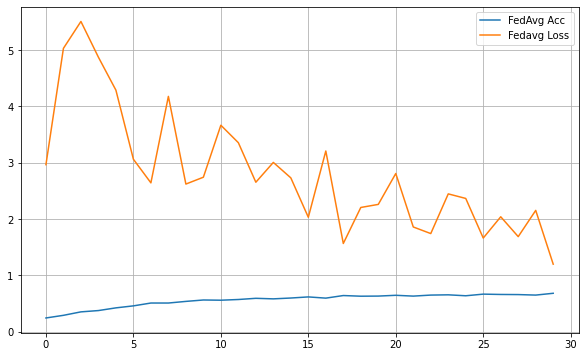

In [20]:
num = 3
average_acc_list, average_loss_list = [], []

for i in range(1,31):
    tmp_a, tmp_l = 0, 0
    for j in range(num):
        tmp_a = tmp_a + np.mean(globals()['acc{}'.format(j)][i])
        tmp_l = tmp_l + np.mean(globals()['loss{}'.format(j)][i])    
        
    average_acc_list.append(tmp_a/num)
    average_loss_list.append(tmp_l/num)   
    
plt.figure(figsize=(10,6))
plt.plot(average_acc_list, label='FedAvg Acc')
plt.plot(average_loss_list, label='Fedavg Loss')

plt.grid(True)
plt.legend()
plt.show()

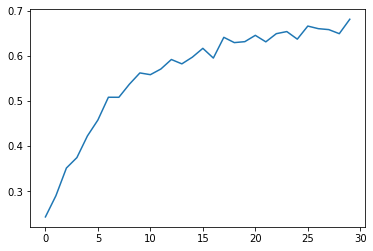

In [21]:
plt.plot(average_acc_list, label='FedAvg Acc')
plt.show()

In [22]:
print(average_acc_list,'\n') 
print(average_loss_list)

[0.24261555448174477, 0.2896233315269153, 0.35105888926320605, 0.3742444447345204, 0.422166665063964, 0.4576122205290529, 0.5080755569040775, 0.5080099989970525, 0.5369966659280989, 0.5620255540642474, 0.5581677787005902, 0.5707099979950322, 0.5918088888956441, 0.5821522221797042, 0.5969833302829001, 0.6165988880727026, 0.5950222209095956, 0.6410122251345052, 0.6292900004320675, 0.6314077787101269, 0.6454044476151467, 0.6309955581194825, 0.6491088892022768, 0.6537866626348761, 0.6369744412600995, 0.6659766665763325, 0.6602511094676123, 0.658138888908757, 0.6491000019013882, 0.6811277767022451] 

[2.9653150955835983, 5.031398836771647, 5.508674833509658, 4.87383107609219, 4.288678174548679, 3.0617069178157386, 2.642274777094523, 4.177878997060987, 2.6209805177317724, 2.742452577087614, 3.665799628363716, 3.3555701626671683, 2.653505115376578, 3.005437790022956, 2.7308003081215753, 2.0309644844796924, 3.2082268668545617, 1.5655829032262167, 2.205153305663003, 2.2597670488887363, 2.808178

# Our algorithm

In [23]:
acc0 = [[], [0.5486999750137329, 0.40950000286102295, 0.652999997138977, 0.2558000087738037, 0.34869998693466187, 0.1949000060558319, 0.5540000200271606, 0.6301000118255615, 0.5979999899864197, 0.2680000066757202, 0.6032000184059143, 0.5503000020980835, 0.42820000648498535, 0.6126000285148621, 0.5507000088691711, 0.6549999713897705, 0.6739000082015991, 0.19300000369548798, 0.541700005531311, 0.5618000030517578, 0.5684000253677368, 0.6010000109672546, 0.11079999804496765, 0.5733000040054321, 0.5907999873161316, 0.42489999532699585, 0.5726000070571899, 0.5634999871253967, 0.5299999713897705, 0.4666000008583069], [0.4745999872684479, 0.5939000248908997, 0.6262999773025513, 0.5120000243186951, 0.6320000290870667, 0.6090999841690063, 0.640999972820282, 0.5048999786376953, 0.6462000012397766, 0.36579999327659607, 0.5073999762535095, 0.6337000131607056, 0.5982999801635742, 0.5364000201225281, 0.5547999739646912, 0.6176999807357788, 0.6571999788284302, 0.58160001039505, 0.4422999918460846, 0.4952000081539154, 0.6407999992370605, 0.6032999753952026, 0.5422000288963318, 0.6545000076293945, 0.6132000088691711, 0.621999979019165, 0.578000009059906, 0.5414999723434448, 0.6108999848365784, 0.4648999869823456], [0.6956999897956848, 0.616100013256073, 0.682699978351593, 0.652400016784668, 0.583299994468689, 0.6464999914169312, 0.661300003528595, 0.6707000136375427, 0.6069999933242798, 0.6162999868392944, 0.6215000152587891, 0.5835999846458435, 0.6384000182151794, 0.6176999807357788, 0.6230999827384949, 0.6888999938964844, 0.6836000084877014, 0.6312999725341797, 0.5666999816894531, 0.6446999907493591, 0.5638999938964844, 0.6779000163078308, 0.6370999813079834, 0.6448000073432922, 0.6259999871253967, 0.6007999777793884, 0.6983000040054321, 0.6945000290870667, 0.6678000092506409, 0.6427000164985657], [0.6577000021934509, 0.6158000230789185, 0.6107000112533569, 0.6840999722480774, 0.6607000231742859, 0.6694999933242798, 0.6858999729156494, 0.6818000078201294, 0.6470999717712402, 0.73089998960495, 0.6089000105857849, 0.6941999793052673, 0.7167999744415283, 0.6297000050544739, 0.6955999732017517, 0.6960999965667725, 0.5685999989509583, 0.684499979019165, 0.6991000175476074, 0.6157000064849854, 0.6922000050544739, 0.6873999834060669, 0.5860999822616577, 0.6937000155448914, 0.642300009727478, 0.6869000196456909, 0.6675000190734863, 0.6559000015258789, 0.6812000274658203, 0.6985999941825867], [0.7135999798774719, 0.6571999788284302, 0.6919000148773193, 0.6941999793052673, 0.6632999777793884, 0.659500002861023, 0.6694999933242798, 0.7001000046730042, 0.6097999811172485, 0.6159999966621399, 0.6322000026702881, 0.718999981880188, 0.6676999926567078, 0.7146999835968018, 0.657800018787384, 0.7045999765396118, 0.49549999833106995, 0.7163000106811523, 0.6421999931335449, 0.695900022983551, 0.7351999878883362, 0.7353000044822693, 0.7160999774932861, 0.6772000193595886, 0.6855999827384949, 0.7139999866485596, 0.6815000176429749, 0.7006999850273132, 0.6503000259399414, 0.6100999712944031], [0.6967999935150146, 0.7117000222206116, 0.6406999826431274, 0.5920000076293945, 0.7336999773979187, 0.6941999793052673, 0.7228999733924866, 0.6973000168800354, 0.6969000101089478, 0.704800009727478, 0.7305999994277954, 0.6736000180244446, 0.6922000050544739, 0.5985999703407288, 0.6150000095367432, 0.6987000107765198, 0.7170000076293945, 0.692300021648407, 0.7222999930381775, 0.531499981880188, 0.6575999855995178, 0.7279999852180481, 0.7157999873161316, 0.6643999814987183, 0.6764000058174133, 0.6758000254631042, 0.6718999743461609, 0.6521999835968018, 0.6694999933242798, 0.6826000213623047], [0.7324000000953674, 0.6104999780654907, 0.7317000031471252, 0.6176000237464905, 0.6672000288963318, 0.7386000156402588, 0.7057999968528748, 0.6136000156402588, 0.6869000196456909, 0.6873999834060669, 0.6992999911308289, 0.7009000182151794, 0.6561999917030334, 0.6485000252723694, 0.6779999732971191, 0.6967999935150146, 0.6945000290870667, 0.7024000287055969, 0.7192000150680542, 0.6431000232696533, 0.5349000096321106, 0.6990000009536743, 0.7520999908447266, 0.73580002784729, 0.6557999849319458, 0.7357000112533569, 0.7095000147819519, 0.691100001335144, 0.7243000268936157, 0.711899995803833], [0.6547999978065491, 0.7177000045776367, 0.6829000115394592, 0.7160999774932861, 0.6883000135421753, 0.7077999711036682, 0.734499990940094, 0.7250999808311462, 0.6991999745368958, 0.7088000178337097, 0.6899999976158142, 0.6733999848365784, 0.6392999887466431, 0.7480999827384949, 0.7121999859809875, 0.6836000084877014, 0.7132999897003174, 0.7185999751091003, 0.7009000182151794, 0.659600019454956, 0.7560999989509583, 0.7096999883651733, 0.7414000034332275, 0.7146000266075134, 0.7297999858856201, 0.7189000248908997, 0.6425999999046326, 0.7409999966621399, 0.6509000062942505, 0.6341000199317932], [0.7024999856948853, 0.6825000047683716, 0.73580002784729, 0.6819000244140625, 0.6978999972343445, 0.7416999936103821, 0.6208999752998352, 0.7063999772071838, 0.7221999764442444, 0.7228000164031982, 0.7283999919891357, 0.7138000130653381, 0.7200999855995178, 0.7110999822616577, 0.7325999736785889, 0.7645999789237976, 0.7134000062942505, 0.7282000184059143, 0.7243000268936157, 0.7457000017166138, 0.7340999841690063, 0.6937999725341797, 0.7249000072479248, 0.6880000233650208, 0.7603999972343445, 0.7110999822616577, 0.7110999822616577, 0.7371000051498413, 0.7414000034332275, 0.7193999886512756], [0.7224000096321106, 0.6991000175476074, 0.7275999784469604, 0.6908000111579895, 0.7502999901771545, 0.6909000277519226, 0.6517000198364258, 0.7293000221252441, 0.733299970626831, 0.616100013256073, 0.6832000017166138, 0.6516000032424927, 0.713699996471405, 0.7069000005722046, 0.7042999863624573, 0.6840000152587891, 0.7404000163078308, 0.748199999332428, 0.6908000111579895, 0.6791999936103821, 0.6227999925613403, 0.7479000091552734, 0.6832000017166138, 0.6233999729156494, 0.7150999903678894, 0.631600022315979, 0.6549999713897705, 0.7247999906539917, 0.741599977016449, 0.6898999810218811], [0.6694999933242798, 0.6966999769210815, 0.7214999794960022, 0.7609999775886536, 0.7103000283241272, 0.7401999831199646, 0.6313999891281128, 0.7642999887466431, 0.6990000009536743, 0.7390999794006348, 0.7555000185966492, 0.6899999976158142, 0.6554999947547913, 0.7699000239372253, 0.765999972820282, 0.7164000272750854, 0.5745999813079834, 0.7598000168800354, 0.7093999981880188, 0.7034000158309937, 0.7540000081062317, 0.7373999953269958, 0.7498000264167786, 0.7053999900817871, 0.7554000020027161, 0.7601000070571899, 0.723800003528595, 0.7095000147819519, 0.7394999861717224, 0.7215999960899353], [0.7540000081062317, 0.7182000279426575, 0.7626000046730042, 0.7383999824523926, 0.7520999908447266, 0.6787999868392944, 0.7494000196456909, 0.6761000156402588, 0.7289999723434448, 0.7366999983787537, 0.7207000255584717, 0.6740999817848206, 0.6897000074386597, 0.7573999762535095, 0.7488999962806702, 0.763700008392334, 0.7592999935150146, 0.742900013923645, 0.7045000195503235, 0.5677000284194946, 0.7368000149726868, 0.7433000206947327, 0.7142999768257141, 0.7350999712944031, 0.7311000227928162, 0.7246999740600586, 0.7225000262260437, 0.7117999792098999, 0.7398999929428101, 0.7009999752044678], [0.5637999773025513, 0.7207000255584717, 0.7458999752998352, 0.7404999732971191, 0.7527999877929688, 0.7677000164985657, 0.7056000232696533, 0.7324000000953674, 0.7738000154495239, 0.6157000064849854, 0.7562999725341797, 0.7063999772071838, 0.7753999829292297, 0.7031000256538391, 0.7498000264167786, 0.6718000173568726, 0.7425000071525574, 0.736299991607666, 0.6984999775886536, 0.6351000070571899, 0.7664999961853027, 0.6395999789237976, 0.779699981212616, 0.7159000039100647, 0.7325999736785889, 0.7592999935150146, 0.7282999753952026, 0.7014999985694885, 0.7444000244140625, 0.7170000076293945], [0.75, 0.6419000029563904, 0.7757999897003174, 0.7414000034332275, 0.7439000010490417, 0.6866000294685364, 0.7156000137329102, 0.7404000163078308, 0.6668000221252441, 0.6917999982833862, 0.6611999869346619, 0.7685999870300293, 0.7271000146865845, 0.6564000248908997, 0.6427000164985657, 0.6635000109672546, 0.7572000026702881, 0.7605000138282776, 0.7067999839782715, 0.7656999826431274, 0.7335000038146973, 0.7627000212669373, 0.7548999786376953, 0.728600025177002, 0.7160000205039978, 0.6624000072479248, 0.7245000004768372, 0.7139000296592712, 0.692799985408783, 0.7541999816894531], [0.6549999713897705, 0.6934000253677368, 0.7214000225067139, 0.7459999918937683, 0.6309000253677368, 0.7106999754905701, 0.7563999891281128, 0.7663999795913696, 0.7159000039100647, 0.7365000247955322, 0.7461000084877014, 0.6614999771118164, 0.7689999938011169, 0.7656999826431274, 0.7498000264167786, 0.7117999792098999, 0.748199999332428, 0.7609000205993652, 0.72079998254776, 0.7120000123977661, 0.7501999735832214, 0.7190999984741211, 0.746399998664856, 0.7721999883651733, 0.7318000197410583, 0.7678999900817871, 0.7401000261306763, 0.772599995136261, 0.7893999814987183, 0.7207000255584717], [0.7271999716758728, 0.692300021648407, 0.7555000185966492, 0.7373999953269958, 0.7044000029563904, 0.7764000296592712, 0.7527999877929688, 0.7512000203132629, 0.6966999769210815, 0.7425000071525574, 0.7620000243186951, 0.7430999875068665, 0.7297999858856201, 0.7613000273704529, 0.7315000295639038, 0.765500009059906, 0.7480999827384949, 0.7402999997138977, 0.7675999999046326, 0.7578999996185303, 0.7096999883651733, 0.7246000170707703, 0.7502999901771545, 0.7105000019073486, 0.7681000232696533, 0.7745000123977661, 0.7516000270843506, 0.6572999954223633, 0.7652000188827515, 0.7080000042915344], [0.7182000279426575, 0.7599999904632568, 0.7822999954223633, 0.6845999956130981, 0.7350999712944031, 0.7741000056266785, 0.7641000151634216, 0.757099986076355, 0.7583000063896179, 0.7411999702453613, 0.7371000051498413, 0.7590000033378601, 0.7692999839782715, 0.696399986743927, 0.7329000234603882, 0.6958000063896179, 0.7724999785423279, 0.7595999836921692, 0.7656000256538391, 0.7667999863624573, 0.7353000044822693, 0.7667999863624573, 0.7809000015258789, 0.7419999837875366, 0.8021000027656555, 0.7524999976158142, 0.7620000243186951, 0.7746999859809875, 0.7840999960899353, 0.7526000142097473], [0.7605000138282776, 0.7319999933242798, 0.7537000179290771, 0.7735000252723694, 0.7563999891281128, 0.6855999827384949, 0.7942000031471252, 0.7444999814033508, 0.7181000113487244, 0.6510999798774719, 0.6468999981880188, 0.7580999732017517, 0.7698000073432922, 0.7099000215530396, 0.680400013923645, 0.7562000155448914, 0.7508000135421753, 0.7644000053405762, 0.7723000049591064, 0.7351999878883362, 0.6976000070571899, 0.7588000297546387, 0.7620000243186951, 0.7889999747276306, 0.7886999845504761, 0.774399995803833, 0.748199999332428, 0.7573999762535095, 0.7771000266075134, 0.7688000202178955], [0.7621999979019165, 0.683899998664856, 0.722599983215332, 0.7265999913215637, 0.7396000027656555, 0.7583000063896179, 0.6976000070571899, 0.7480000257492065, 0.7723000049591064, 0.7696999907493591, 0.758899986743927, 0.7752000093460083, 0.701200008392334, 0.7542999982833862, 0.7483999729156494, 0.7738000154495239, 0.7664999961853027, 0.7314000129699707, 0.7455999851226807, 0.8023999929428101, 0.6837000250816345, 0.7504000067710876, 0.7560999989509583, 0.7506999969482422, 0.753000020980835, 0.7914000153541565, 0.7384999990463257, 0.784500002861023, 0.7746000289916992, 0.7734000086784363], [0.7860999703407288, 0.7157999873161316, 0.772599995136261, 0.7601000070571899, 0.7527999877929688, 0.705299973487854, 0.7506999969482422, 0.7616000175476074, 0.7671999931335449, 0.7709000110626221, 0.781000018119812, 0.7955999970436096, 0.7932999730110168, 0.8007000088691711, 0.7213000059127808, 0.7368000149726868, 0.7853000164031982, 0.7551000118255615, 0.7519999742507935, 0.7567999958992004, 0.6764000058174133, 0.7585999965667725, 0.7026000022888184, 0.7840999960899353, 0.8004999756813049, 0.7458000183105469, 0.7414000034332275, 0.794700026512146, 0.6660000085830688, 0.7254999876022339], [0.7660999894142151, 0.7537999749183655, 0.7615000009536743, 0.7674000263214111, 0.7383000254631042, 0.7204999923706055, 0.7192000150680542, 0.7645999789237976, 0.7580000162124634, 0.7479000091552734, 0.777899980545044, 0.7824000120162964, 0.7626000046730042, 0.7540000081062317, 0.711899995803833, 0.7771000266075134, 0.7408999800682068, 0.7807999849319458, 0.7792999744415283, 0.760699987411499, 0.7231000065803528, 0.7253000140190125, 0.7235000133514404, 0.7578999996185303, 0.7709000110626221, 0.7961000204086304, 0.6899999976158142, 0.7774999737739563, 0.7710000276565552, 0.7713000178337097], [0.7336000204086304, 0.7642999887466431, 0.6500999927520752, 0.7303000092506409, 0.782800018787384, 0.77920001745224, 0.7836999893188477, 0.7649999856948853, 0.7620000243186951, 0.6884999871253967, 0.7734000086784363, 0.7494999766349792, 0.7074000239372253, 0.7791000008583069, 0.7631000280380249, 0.7336999773979187, 0.7016000151634216, 0.7660999894142151, 0.7578999996185303, 0.7714999914169312, 0.7347000241279602, 0.7748000025749207, 0.7660999894142151, 0.7695000171661377, 0.7138000130653381, 0.7804999947547913, 0.765500009059906, 0.7574999928474426, 0.7472000122070312, 0.7402999997138977], [0.7990000247955322, 0.7936999797821045, 0.7771000266075134, 0.7943000197410583, 0.7263000011444092, 0.801800012588501, 0.7717000246047974, 0.7990999817848206, 0.7562000155448914, 0.7904999852180481, 0.7860000133514404, 0.7620000243186951, 0.7299000024795532, 0.7764999866485596, 0.8179000020027161, 0.675000011920929, 0.800599992275238, 0.8084999918937683, 0.7803000211715698, 0.6518999934196472, 0.7853000164031982, 0.722000002861023, 0.7627000212669373, 0.7775999903678894, 0.7908999919891357, 0.7339000105857849, 0.7817000150680542, 0.7602999806404114, 0.7748000025749207, 0.7235999703407288], [0.7290999889373779, 0.7720000147819519, 0.7111999988555908, 0.7703999876976013, 0.7583000063896179, 0.7846999764442444, 0.7742999792098999, 0.7669000029563904, 0.8023999929428101, 0.8034999966621399, 0.6711999773979187, 0.7598000168800354, 0.7132999897003174, 0.7526000142097473, 0.7656999826431274, 0.7986000180244446, 0.777400016784668, 0.7781000137329102, 0.7232000231742859, 0.7949000000953674, 0.7505000233650208, 0.7763000130653381, 0.7839999794960022, 0.7544999718666077, 0.8087000250816345, 0.7678999900817871, 0.7775999903678894, 0.6859999895095825, 0.8205000162124634, 0.7742999792098999], [0.7914000153541565, 0.7797999978065491, 0.8256999850273132, 0.7354999780654907, 0.8162000179290771, 0.7157999873161316, 0.7458000183105469, 0.7935000061988831, 0.7404999732971191, 0.7782999873161316, 0.8037999868392944, 0.7886999845504761, 0.7942000031471252, 0.8145999908447266, 0.7429999709129333, 0.7968000173568726, 0.8019000291824341, 0.79339998960495, 0.7498999834060669, 0.7944999933242798, 0.7793999910354614, 0.7634000182151794, 0.7753000259399414, 0.7789000272750854, 0.753000020980835, 0.7893000245094299, 0.7493000030517578, 0.8011999726295471, 0.7638999819755554, 0.7791000008583069], [0.7993999719619751, 0.7548999786376953, 0.7454000115394592, 0.7961999773979187, 0.7925000190734863, 0.738099992275238, 0.8057000041007996, 0.758400022983551, 0.7721999883651733, 0.7908999919891357, 0.7749000191688538, 0.7455999851226807, 0.72079998254776, 0.7580000162124634, 0.7918000221252441, 0.8215000033378601, 0.7182999849319458, 0.7695000171661377, 0.7997000217437744, 0.804099977016449, 0.7652999758720398, 0.781000018119812, 0.7897999882698059, 0.7634000182151794, 0.7422999739646912, 0.6970000267028809, 0.5626999735832214, 0.794700026512146, 0.6815000176429749, 0.7767999768257141], [0.8141999840736389, 0.7967000007629395, 0.7587000131607056, 0.8029999732971191, 0.7785999774932861, 0.8120999932289124, 0.7605000138282776, 0.7968000173568726, 0.8087999820709229, 0.7703999876976013, 0.7439000010490417, 0.7552000284194946, 0.7781000137329102, 0.7918999791145325, 0.7181000113487244, 0.8115000128746033, 0.7638999819755554, 0.7310000061988831, 0.7746000289916992, 0.795799970626831, 0.7768999934196472, 0.7644000053405762, 0.8003000020980835, 0.7477999925613403, 0.8059999942779541, 0.8180999755859375, 0.7897999882698059, 0.7839999794960022, 0.7876999974250793, 0.7531999945640564], [0.8019000291824341, 0.7644000053405762, 0.7912999987602234, 0.7383000254631042, 0.757099986076355, 0.7867000102996826, 0.8116000294685364, 0.6782000064849854, 0.7602999806404114, 0.805899977684021, 0.7680000066757202, 0.8025000095367432, 0.7427999973297119, 0.8037999868392944, 0.8007000088691711, 0.7900000214576721, 0.8112000226974487, 0.8098000288009644, 0.7865999937057495, 0.758400022983551, 0.7968000173568726, 0.7796000242233276, 0.8033999800682068, 0.784500002861023, 0.7894999980926514, 0.7990999817848206, 0.7792999744415283, 0.7989000082015991, 0.7670000195503235, 0.7935000061988831], [0.8169000148773193, 0.7560999989509583, 0.7912999987602234, 0.8131999969482422, 0.7409999966621399, 0.7833999991416931, 0.8022000193595886, 0.7878000140190125, 0.7763000130653381, 0.7730000019073486, 0.7523000240325928, 0.7971000075340271, 0.794700026512146, 0.7811999917030334, 0.7627000212669373, 0.7886999845504761, 0.7930999994277954, 0.7324000000953674, 0.7950000166893005, 0.7885000109672546, 0.7821000218391418, 0.7305999994277954, 0.7820000052452087, 0.7985000014305115, 0.7935000061988831, 0.6822999715805054, 0.7836999893188477, 0.7865999937057495, 0.7842000126838684, 0.7903000116348267], [0.708899974822998, 0.7597000002861023, 0.7182000279426575, 0.7883999943733215, 0.8119000196456909, 0.755299985408783, 0.78329998254776, 0.8003000020980835, 0.807200014591217, 0.7929999828338623, 0.7868000268936157, 0.7857000231742859, 0.8102999925613403, 0.7242000102996826, 0.7989000082015991, 0.8112000226974487, 0.7860999703407288, 0.7979999780654907, 0.7612000107765198, 0.8075000047683716, 0.7706000208854675, 0.8148000240325928, 0.7849000096321106, 0.8069999814033508, 0.7888000011444092, 0.7531999945640564, 0.7383000254631042, 0.7378000020980835, 0.8209999799728394, 0.6055999994277954]]
loss0 = [[], [1.5420494079589844, 1.703377366065979, 1.159583568572998, 2.9099247455596924, 4.616199016571045, 2.948220729827881, 1.4626826047897339, 1.1091324090957642, 1.2708312273025513, 2.107651948928833, 1.3925421237945557, 1.7045619487762451, 2.281352996826172, 1.022613525390625, 2.4287092685699463, 1.2107586860656738, 1.297113060951233, 3.1100716590881348, 1.6755273342132568, 1.5299921035766602, 1.3908016681671143, 1.201284408569336, 2.5067741870880127, 1.2777355909347534, 1.249750018119812, 1.4555712938308716, 1.6497331857681274, 1.2111560106277466, 1.1796352863311768, 1.7776974439620972], [1.858939290046692, 1.4541289806365967, 1.430491328239441, 1.3323620557785034, 1.199766755104065, 2.02260160446167, 0.9750678539276123, 1.3084224462509155, 1.396008014678955, 3.576753616333008, 1.899949073791504, 1.0374119281768799, 1.1515583992004395, 2.0620737075805664, 1.2582379579544067, 1.2390005588531494, 1.0810155868530273, 1.1886826753616333, 2.0976221561431885, 1.5923874378204346, 1.1184720993041992, 1.1660666465759277, 1.384517788887024, 0.9678173065185547, 1.1242197751998901, 1.3213012218475342, 1.197483777999878, 1.315178394317627, 1.1854867935180664, 1.366899847984314], [1.1291751861572266, 1.5136641263961792, 1.1418533325195312, 1.422882318496704, 1.3065807819366455, 1.2867666482925415, 1.0138442516326904, 1.1324243545532227, 1.6218502521514893, 1.273245930671692, 1.3671597242355347, 1.3551030158996582, 1.1882553100585938, 1.4116326570510864, 1.2183440923690796, 1.027542233467102, 1.3860418796539307, 1.786880612373352, 2.251826047897339, 1.3960256576538086, 2.1221370697021484, 1.1336846351623535, 1.2152880430221558, 1.0379602909088135, 1.9072990417480469, 1.2980011701583862, 1.6076602935791016, 0.9817470908164978, 1.0697675943374634, 1.0523359775543213], [1.4354280233383179, 1.7766958475112915, 1.8965370655059814, 1.2919881343841553, 1.3930132389068604, 1.2824428081512451, 1.3278141021728516, 1.2116552591323853, 1.2092814445495605, 0.9789312481880188, 1.8917698860168457, 1.1657518148422241, 1.0345721244812012, 1.6027920246124268, 1.0597368478775024, 1.0844064950942993, 1.7066558599472046, 1.8844963312149048, 1.1382968425750732, 1.3076390027999878, 1.2596889734268188, 1.3779569864273071, 1.9961243867874146, 1.2103937864303589, 1.2245008945465088, 1.1967867612838745, 1.647355079650879, 1.2504732608795166, 1.3548775911331177, 0.9619943499565125], [1.466566562652588, 1.4293853044509888, 1.1878849267959595, 1.5157822370529175, 1.4823665618896484, 1.10316002368927, 1.6526992321014404, 1.3512922525405884, 1.5587377548217773, 2.3458356857299805, 1.416263461112976, 1.0491187572479248, 1.2333914041519165, 1.1848011016845703, 1.581048846244812, 1.6853207349777222, 2.5382707118988037, 1.4686858654022217, 1.7718956470489502, 1.0856051445007324, 0.9335596561431885, 1.1032099723815918, 1.0270030498504639, 0.9974982142448425, 1.2626405954360962, 1.0744000673294067, 0.9334766864776611, 1.468356728553772, 1.7728021144866943, 1.4848182201385498], [1.1865700483322144, 0.879676103591919, 2.196871757507324, 1.8159816265106201, 1.3274379968643188, 1.0465196371078491, 1.1248292922973633, 1.30135178565979, 0.9754973649978638, 1.874325156211853, 0.9029291272163391, 1.4162509441375732, 1.1297091245651245, 2.206064462661743, 2.4697988033294678, 1.085785150527954, 1.0459345579147339, 1.307470679283142, 1.208390474319458, 2.1415014266967773, 1.4669626951217651, 1.2469052076339722, 1.232306718826294, 1.8947081565856934, 0.9679802656173706, 2.0910110473632812, 1.4994901418685913, 1.8504409790039062, 1.6900992393493652, 1.4642834663391113], [1.0267391204833984, 2.669614791870117, 1.0310213565826416, 2.9796271324157715, 1.7201383113861084, 1.0993835926055908, 1.107630968093872, 2.347057342529297, 1.0970879793167114, 1.5393943786621094, 0.8949289917945862, 1.2381560802459717, 1.374145269393921, 1.423839807510376, 1.393110990524292, 1.6091607809066772, 1.4127168655395508, 1.647122859954834, 1.2412559986114502, 1.8247883319854736, 1.377746343612671, 1.252113938331604, 0.9335346817970276, 1.5680681467056274, 1.0717893838882446, 0.7888845205307007, 1.3466742038726807, 1.0186705589294434, 1.2317441701889038, 1.09648859500885], [2.5186872482299805, 1.2867076396942139, 1.2297265529632568, 1.094817876815796, 1.2317339181900024, 1.468087911605835, 1.2418102025985718, 0.9547504186630249, 1.9675770998001099, 1.1256933212280273, 1.2024307250976562, 1.671541452407837, 1.4826821088790894, 0.8005596995353699, 0.9808456301689148, 1.1105563640594482, 1.0623379945755005, 1.2923245429992676, 1.0914103984832764, 2.5203254222869873, 0.8143115043640137, 1.585424542427063, 1.224812388420105, 1.6474183797836304, 1.2610644102096558, 1.3191086053848267, 1.8878415822982788, 1.2263368368148804, 1.642948865890503, 1.801465630531311], [1.217248797416687, 1.3968743085861206, 1.1135057210922241, 1.7348575592041016, 1.0992062091827393, 1.1434502601623535, 1.8056367635726929, 1.074256420135498, 1.186954379081726, 1.036072850227356, 0.8102230429649353, 1.0495007038116455, 1.3047361373901367, 1.0892833471298218, 1.2578389644622803, 1.0519442558288574, 1.3331724405288696, 1.3504042625427246, 1.1156234741210938, 1.2404086589813232, 0.8447694182395935, 1.2775721549987793, 1.2252308130264282, 1.5816072225570679, 0.8959022164344788, 1.544182300567627, 1.4370465278625488, 1.5089691877365112, 1.0796436071395874, 0.9308257699012756], [1.2118333578109741, 1.1712223291397095, 1.1537272930145264, 1.791619896888733, 1.2661052942276, 1.2654439210891724, 1.1374784708023071, 1.2241441011428833, 0.8588796854019165, 2.363415002822876, 1.4714272022247314, 2.074514627456665, 1.4376922845840454, 0.9102899432182312, 1.6138606071472168, 1.5548597574234009, 1.064483880996704, 1.6634448766708374, 0.994850754737854, 1.191672921180725, 2.099238395690918, 1.0441701412200928, 0.8724839687347412, 1.7778160572052002, 1.3478877544403076, 1.2204079627990723, 1.5439112186431885, 1.081572413444519, 1.107177734375, 1.8018028736114502], [1.0974923372268677, 1.0158408880233765, 1.6382267475128174, 1.0768343210220337, 1.1591061353683472, 1.0058445930480957, 2.046809434890747, 1.1672759056091309, 1.3871902227401733, 1.1893473863601685, 1.0863714218139648, 1.2946053743362427, 1.3583589792251587, 0.941756546497345, 1.1162548065185547, 1.1781866550445557, 2.353530168533325, 1.0297553539276123, 1.1082028150558472, 1.1939325332641602, 0.9783579111099243, 1.2486066818237305, 1.1510839462280273, 1.0577412843704224, 0.961414635181427, 1.0189894437789917, 1.394510269165039, 1.4310375452041626, 1.2232379913330078, 1.073992133140564], [1.249311089515686, 2.4829723834991455, 0.8119609951972961, 1.5319918394088745, 0.8964459896087646, 1.7690491676330566, 1.1924567222595215, 1.990470290184021, 0.9574993252754211, 1.3542120456695557, 1.6188502311706543, 2.8678319454193115, 2.1486828327178955, 1.289144515991211, 1.1820080280303955, 1.0857981443405151, 0.9456764459609985, 1.159517526626587, 1.199601173400879, 5.420921802520752, 1.4303079843521118, 0.9577264785766602, 1.0358771085739136, 0.8294464945793152, 1.1420223712921143, 1.5009490251541138, 0.9729265570640564, 1.221066951751709, 1.017545461654663, 1.0962717533111572], [1.792712926864624, 1.0150636434555054, 1.193996548652649, 1.0785061120986938, 0.977371096611023, 1.2060375213623047, 2.0727531909942627, 1.5446264743804932, 0.9253957271575928, 2.542905807495117, 1.2176278829574585, 1.662115216255188, 0.8462772369384766, 1.427986741065979, 1.2387466430664062, 1.2679469585418701, 1.1379300355911255, 1.1346278190612793, 1.6196448802947998, 3.766996145248413, 0.9938681721687317, 1.2561898231506348, 0.9052442312240601, 1.2662588357925415, 0.8281415104866028, 0.7830765843391418, 1.3308604955673218, 1.469962239265442, 1.0615111589431763, 1.2859773635864258], [1.0685662031173706, 4.090543746948242, 1.1972588300704956, 1.2488365173339844, 1.0582162141799927, 1.2492518424987793, 1.1744236946105957, 1.1477123498916626, 1.6633185148239136, 1.3477503061294556, 1.3006205558776855, 0.9200776219367981, 2.210313320159912, 1.7551511526107788, 1.4358670711517334, 1.1108473539352417, 0.9861143827438354, 1.0025253295898438, 1.1791431903839111, 0.8408980369567871, 0.9419965744018555, 1.494847059249878, 1.072710394859314, 1.2094504833221436, 1.0148056745529175, 1.0864466428756714, 1.209537386894226, 0.886178731918335, 1.1587473154067993, 0.9986739158630371], [1.3642899990081787, 1.698482871055603, 0.9183863997459412, 1.0716804265975952, 1.905043125152588, 2.2014684677124023, 1.446288824081421, 0.9130858182907104, 1.3339205980300903, 1.2115200757980347, 1.0051392316818237, 1.9546171426773071, 1.2237331867218018, 0.9793015718460083, 1.064713478088379, 1.6690349578857422, 1.126327395439148, 0.9448236227035522, 1.3071200847625732, 1.0087254047393799, 1.3370412588119507, 1.5443627834320068, 1.479943871498108, 0.9629064202308655, 1.3401364088058472, 1.0330324172973633, 1.263757586479187, 0.8178691864013672, 0.7926807999610901, 1.1006407737731934], [1.9396742582321167, 0.9853348731994629, 1.138776421546936, 1.708938717842102, 1.5653172731399536, 1.0218764543533325, 1.2559127807617188, 0.9462037086486816, 1.2154929637908936, 0.9165391325950623, 1.0626931190490723, 1.1137930154800415, 1.095902681350708, 1.0543781518936157, 1.2359838485717773, 1.2517108917236328, 1.0932198762893677, 1.0920978784561157, 1.0371301174163818, 0.8246060609817505, 1.6996115446090698, 1.4898009300231934, 1.5132319927215576, 1.3487297296524048, 1.013017177581787, 0.8898189663887024, 0.8178868293762207, 1.300643801689148, 1.0120810270309448, 1.5615633726119995], [1.4872888326644897, 1.6224085092544556, 1.020925521850586, 1.1897379159927368, 1.0897780656814575, 0.923033595085144, 1.0826927423477173, 0.9990907907485962, 0.8079119324684143, 1.0666767358779907, 1.5181803703308105, 0.916880190372467, 0.7507190704345703, 1.2184981107711792, 1.5183913707733154, 1.3530566692352295, 1.0140634775161743, 1.0592443943023682, 1.1097384691238403, 1.0471601486206055, 1.569656491279602, 0.9224557876586914, 0.7599877715110779, 0.9091609120368958, 0.9033556580543518, 1.1941158771514893, 1.364516258239746, 0.9911486506462097, 1.0042717456817627, 1.1613847017288208], [0.9819574356079102, 1.1759567260742188, 1.1996182203292847, 1.1484097242355347, 1.0634465217590332, 1.5226343870162964, 0.8378576040267944, 1.3673938512802124, 1.3681650161743164, 1.6223342418670654, 2.618457555770874, 1.2836272716522217, 0.7747425436973572, 1.4345637559890747, 1.5377063751220703, 1.50836181640625, 1.081235647201538, 0.8163837194442749, 1.0321241617202759, 1.507576823234558, 1.3648128509521484, 0.9172924757003784, 0.9856497049331665, 0.9579224586486816, 1.0055371522903442, 0.6720055341720581, 1.2791653871536255, 0.9404966831207275, 1.2723040580749512, 0.9027571082115173], [1.0316996574401855, 1.143201231956482, 2.3209118843078613, 1.4767571687698364, 1.3793528079986572, 1.1326658725738525, 1.5153164863586426, 1.0219815969467163, 0.9631514549255371, 1.2222325801849365, 1.2685813903808594, 0.9617675542831421, 3.0848448276519775, 1.2375786304473877, 0.9356285929679871, 0.7576004862785339, 0.8681174516677856, 1.3685004711151123, 1.4812411069869995, 0.7791541814804077, 1.769304871559143, 1.1165580749511719, 1.0776658058166504, 1.3193113803863525, 1.0080900192260742, 0.7646442651748657, 1.1979643106460571, 0.9379940629005432, 1.0089540481567383, 1.0967148542404175], [0.9937598705291748, 1.4021668434143066, 0.8673917055130005, 0.8891124129295349, 1.4568967819213867, 0.969280481338501, 0.799497127532959, 1.1147053241729736, 0.7935620546340942, 1.2723439931869507, 0.9792845845222473, 0.7832196950912476, 0.7699350714683533, 0.8478699922561646, 0.9428601264953613, 1.264359951019287, 1.2452038526535034, 0.8925912976264954, 1.403537631034851, 1.211001992225647, 0.9678598642349243, 0.9127030968666077, 1.5738567113876343, 0.7508005499839783, 0.7580219507217407, 1.4032694101333618, 1.0420446395874023, 0.9238833785057068, 0.9662877917289734, 1.2897982597351074], [1.1551159620285034, 1.4621002674102783, 1.3540107011795044, 1.3240931034088135, 1.3038887977600098, 1.5550366640090942, 1.7068078517913818, 0.8221892714500427, 1.1801358461380005, 1.2442357540130615, 0.8890199065208435, 1.2107033729553223, 0.8680011630058289, 1.384861707687378, 1.55824875831604, 1.0368380546569824, 0.8904954195022583, 0.7374254465103149, 0.9757603406906128, 1.4191793203353882, 1.2767126560211182, 1.705824851989746, 1.0854860544204712, 1.6248117685317993, 1.0161811113357544, 1.0001592636108398, 1.1118016242980957, 0.910437822341919, 0.9507814645767212, 0.858959972858429], [1.2161389589309692, 1.0311201810836792, 2.6023571491241455, 1.1338233947753906, 1.2389826774597168, 1.1895982027053833, 0.9895719885826111, 0.8713291883468628, 1.0389952659606934, 1.7516992092132568, 1.1420519351959229, 1.4959204196929932, 1.7148947715759277, 0.8002398610115051, 1.100899577140808, 1.6664035320281982, 1.4286593198776245, 1.0673515796661377, 1.6036633253097534, 1.1603204011917114, 1.0468354225158691, 1.0734519958496094, 0.8532023429870605, 1.213585615158081, 1.3444530963897705, 1.207027792930603, 1.1960303783416748, 1.2444146871566772, 1.1106833219528198, 1.2202316522598267], [1.0465749502182007, 0.9363633990287781, 0.9616068601608276, 0.9334311485290527, 1.362684965133667, 0.82696932554245, 1.1511856317520142, 0.9670946002006531, 1.2340387105941772, 1.0100759267807007, 0.8666433691978455, 1.1828572750091553, 1.1827958822250366, 0.86472487449646, 0.7702165246009827, 2.2421538829803467, 0.6618463397026062, 0.6527344584465027, 0.8964458703994751, 1.1974549293518066, 1.0777673721313477, 0.8986625075340271, 1.0593845844268799, 1.283994197845459, 0.8990128040313721, 1.203505277633667, 0.8598319292068481, 1.7470794916152954, 1.0668940544128418, 1.3598910570144653], [1.1943124532699585, 1.1507201194763184, 2.0171959400177, 1.0019947290420532, 1.0516891479492188, 0.89593505859375, 1.2621251344680786, 0.8687248229980469, 0.7032668590545654, 1.0041917562484741, 2.260042905807495, 1.0477759838104248, 1.0957589149475098, 1.1653729677200317, 1.1322308778762817, 0.858021080493927, 0.8849270343780518, 1.0425043106079102, 1.4851832389831543, 1.009792447090149, 2.1409995555877686, 0.954300582408905, 0.7814952731132507, 0.905203640460968, 0.8461251854896545, 0.9819499850273132, 0.929336428642273, 1.6435669660568237, 0.7826158404350281, 1.305724024772644], [1.080428957939148, 1.0165847539901733, 0.7889100313186646, 0.8612155318260193, 0.8228288888931274, 1.432071328163147, 1.8724517822265625, 0.7676913142204285, 1.2678054571151733, 0.8431323170661926, 0.7851507663726807, 0.9686471819877625, 0.725898802280426, 0.7645941376686096, 1.5628317594528198, 0.653207004070282, 1.112430214881897, 0.7804121375083923, 1.1238857507705688, 0.8801755905151367, 1.0600758790969849, 0.9759639501571655, 0.8282696008682251, 0.8972761631011963, 1.3158286809921265, 0.8075037598609924, 1.4623140096664429, 1.1050910949707031, 1.051340103149414, 1.0626778602600098], [1.0418012142181396, 1.2872563600540161, 1.020263910293579, 0.9239300489425659, 1.1611144542694092, 1.0565989017486572, 0.7641612887382507, 1.2358767986297607, 1.2298027276992798, 1.1672059297561646, 1.1059794425964355, 1.4527472257614136, 1.0501956939697266, 1.021747350692749, 1.3050862550735474, 0.6754831671714783, 2.4336533546447754, 1.3540892601013184, 1.8872464895248413, 0.7014925479888916, 1.1949881315231323, 1.3376740217208862, 1.1520459651947021, 1.3292853832244873, 1.2978533506393433, 1.9465827941894531, 2.1644928455352783, 1.008775234222412, 2.312821388244629, 0.898400068283081], [0.6751099824905396, 0.6368817090988159, 1.4940547943115234, 0.6966108679771423, 1.3066742420196533, 0.7440641522407532, 1.7805389165878296, 1.2825933694839478, 0.7167059779167175, 1.5300089120864868, 1.0423492193222046, 1.5440287590026855, 0.9934090971946716, 0.8510968685150146, 1.5098941326141357, 0.7785705327987671, 0.8883835077285767, 0.9185397624969482, 1.3013708591461182, 0.7324216961860657, 1.420218586921692, 0.9829462170600891, 0.6972041726112366, 1.1325902938842773, 0.6875977516174316, 0.8267056345939636, 1.0781551599502563, 1.1398435831069946, 0.9137431383132935, 1.175149917602539], [0.8439481258392334, 0.9337964057922363, 0.989747941493988, 1.2604681253433228, 0.8277988433837891, 0.9939688444137573, 0.5956524610519409, 1.3668209314346313, 1.1022982597351074, 0.683376669883728, 1.660922646522522, 0.8929060697555542, 1.2174644470214844, 0.6925938725471497, 0.8073188066482544, 0.954992949962616, 0.6380203366279602, 0.929633378982544, 0.8438634872436523, 1.1954154968261719, 0.6845410466194153, 1.5327190160751343, 0.9091810584068298, 0.9309650659561157, 0.7001292705535889, 0.8410117030143738, 0.7112498879432678, 0.9153739213943481, 1.0573841333389282, 0.9060355424880981], [0.8202643394470215, 1.441890001296997, 0.85274338722229, 1.0343996286392212, 1.7402273416519165, 1.3003132343292236, 1.004530429840088, 1.03922438621521, 0.8463866114616394, 1.087261438369751, 1.0866931676864624, 0.9982683658599854, 0.8352448344230652, 1.3714808225631714, 1.7206218242645264, 0.7383797764778137, 0.843117892742157, 1.2217247486114502, 0.965753436088562, 1.1775931119918823, 1.348341941833496, 1.1078981161117554, 1.0785377025604248, 0.9810694456100464, 0.8530077338218689, 2.525019645690918, 0.8840847611427307, 1.1320797204971313, 0.835412323474884, 0.971018373966217], [1.482340693473816, 1.304101586341858, 1.550207257270813, 1.3866386413574219, 0.6851189732551575, 1.8663287162780762, 1.1840620040893555, 1.0378823280334473, 0.8171547651290894, 0.6890893578529358, 1.330062747001648, 1.145074486732483, 1.2909859418869019, 1.1118974685668945, 0.8607600331306458, 0.8145314455032349, 0.9774896502494812, 0.9244467616081238, 1.6557635068893433, 0.8245725631713867, 0.9299819469451904, 0.6958373188972473, 0.8514842987060547, 0.948721170425415, 0.7407652735710144, 1.1442139148712158, 1.725296139717102, 1.1595913171768188, 0.738559365272522, 2.4150052070617676]] 

acc1 = [[], [0.5593000054359436, 0.5315999984741211, 0.4309999942779541, 0.5339999794960022, 0.4681999981403351, 0.40529999136924744, 0.5351999998092651, 0.5831000208854675, 0.41370001435279846, 0.4426000118255615, 0.42890000343322754, 0.5552999973297119, 0.6172999739646912, 0.6086999773979187, 0.49459999799728394, 0.5647000074386597, 0.5260000228881836, 0.6171000003814697, 0.6122000217437744, 0.4359999895095825, 0.29089999198913574, 0.5284000039100647, 0.5414000153541565, 0.5764999985694885, 0.4830999970436096, 0.45419999957084656, 0.26260000467300415, 0.3646000027656555, 0.43459999561309814, 0.33550000190734863], [0.6593000292778015, 0.5799999833106995, 0.5254999995231628, 0.5551999807357788, 0.6133000254631042, 0.46000000834465027, 0.5040000081062317, 0.5099999904632568, 0.6464999914169312, 0.517799973487854, 0.5418000221252441, 0.659500002861023, 0.5120000243186951, 0.5482000112533569, 0.6708999872207642, 0.51910001039505, 0.4404999911785126, 0.5871999859809875, 0.5972999930381775, 0.5735999941825867, 0.6449999809265137, 0.4846999943256378, 0.42089998722076416, 0.6319000124931335, 0.5920000076293945, 0.6624000072479248, 0.6389999985694885, 0.5372999906539917, 0.632099986076355, 0.5825999975204468], [0.5773000121116638, 0.6244000196456909, 0.6520000100135803, 0.539900004863739, 0.5819000005722046, 0.4722999930381775, 0.656000018119812, 0.6233000159263611, 0.5952000021934509, 0.6700000166893005, 0.5683000087738037, 0.6689000129699707, 0.6819000244140625, 0.6830000281333923, 0.5309000015258789, 0.7098000049591064, 0.6621999740600586, 0.6525999903678894, 0.6661999821662903, 0.6601999998092651, 0.6057999730110168, 0.5717999935150146, 0.6031000018119812, 0.6377999782562256, 0.5702999830245972, 0.45350000262260437, 0.6395000219345093, 0.6845999956130981, 0.6502000093460083, 0.5214999914169312], [0.7070000171661377, 0.6965000033378601, 0.5501999855041504, 0.6452000141143799, 0.6730999946594238, 0.6471999883651733, 0.656499981880188, 0.6725000143051147, 0.6507999897003174, 0.6845999956130981, 0.7240999937057495, 0.536899983882904, 0.6916999816894531, 0.7028999924659729, 0.6837000250816345, 0.6675000190734863, 0.6923999786376953, 0.6908000111579895, 0.6912999749183655, 0.6797999739646912, 0.6833999752998352, 0.5737000107765198, 0.6875, 0.6812000274658203, 0.7017999887466431, 0.6039999723434448, 0.6990000009536743, 0.6355000138282776, 0.5770000219345093, 0.5730000138282776], [0.5629000067710876, 0.6413999795913696, 0.6699000000953674, 0.6446999907493591, 0.745199978351593, 0.6478999853134155, 0.6862999796867371, 0.7049999833106995, 0.6197999715805054, 0.7111999988555908, 0.6808000206947327, 0.6761999726295471, 0.6194999814033508, 0.588100016117096, 0.7113000154495239, 0.6218000054359436, 0.609499990940094, 0.6391000151634216, 0.6940000057220459, 0.5971999764442444, 0.7318999767303467, 0.6801000237464905, 0.6610999703407288, 0.642300009727478, 0.5760999917984009, 0.7145000100135803, 0.6664999723434448, 0.6808000206947327, 0.6672000288963318, 0.6355000138282776], [0.7299000024795532, 0.6636000275611877, 0.6880999803543091, 0.6837000250816345, 0.7074999809265137, 0.7235999703407288, 0.7143999934196472, 0.7351999878883362, 0.6430000066757202, 0.5982000231742859, 0.6531000137329102, 0.6833999752998352, 0.7249000072479248, 0.7010999917984009, 0.6848000288009644, 0.6960999965667725, 0.6205999851226807, 0.725600004196167, 0.6620000004768372, 0.6363000273704529, 0.7121999859809875, 0.6248000264167786, 0.5110999941825867, 0.713100016117096, 0.6913999915122986, 0.7337999939918518, 0.6471999883651733, 0.6694999933242798, 0.7045000195503235, 0.6782000064849854], [0.7214999794960022, 0.6498000025749207, 0.6425999999046326, 0.6872000098228455, 0.7081000208854675, 0.6873999834060669, 0.6632000207901001, 0.7111999988555908, 0.6025999784469604, 0.7138000130653381, 0.7063000202178955, 0.7121000289916992, 0.6604999899864197, 0.7093999981880188, 0.6771000027656555, 0.6843000054359436, 0.6687999963760376, 0.7008000016212463, 0.7188000082969666, 0.6775000095367432, 0.7109000086784363, 0.6173999905586243, 0.7038999795913696, 0.6825000047683716, 0.7024000287055969, 0.6920999884605408, 0.6413000226020813, 0.7096999883651733, 0.7016000151634216, 0.732200026512146], [0.7246000170707703, 0.7190999984741211, 0.6899999976158142, 0.6920999884605408, 0.6836000084877014, 0.6262000203132629, 0.6995999813079834, 0.6299999952316284, 0.7109000086784363, 0.695900022983551, 0.675599992275238, 0.7354999780654907, 0.6873999834060669, 0.6922000050544739, 0.6880000233650208, 0.7488999962806702, 0.607200026512146, 0.7224000096321106, 0.6488000154495239, 0.7142000198364258, 0.6474999785423279, 0.7034000158309937, 0.6491000056266785, 0.7416999936103821, 0.7235999703407288, 0.6600000262260437, 0.6330999732017517, 0.6873000264167786, 0.7202000021934509, 0.6198999881744385], [0.7422000169754028, 0.6061000227928162, 0.7250999808311462, 0.7355999946594238, 0.6941999793052673, 0.7351999878883362, 0.6901999711990356, 0.7303000092506409, 0.6633999943733215, 0.7332000136375427, 0.739799976348877, 0.7020000219345093, 0.7318000197410583, 0.6826000213623047, 0.6966000199317932, 0.6592000126838684, 0.7206000089645386, 0.7495999932289124, 0.7483000159263611, 0.6608999967575073, 0.7560999989509583, 0.5638999938964844, 0.7002000212669373, 0.7391999959945679, 0.7315000295639038, 0.6894000172615051, 0.6783000230789185, 0.732200026512146, 0.724399983882904, 0.7282999753952026], [0.7570000290870667, 0.6710000038146973, 0.7178999781608582, 0.6765000224113464, 0.6514000296592712, 0.7519000172615051, 0.6456999778747559, 0.7282999753952026, 0.7242000102996826, 0.6209999918937683, 0.6963000297546387, 0.7387999892234802, 0.7152000069618225, 0.6793000102043152, 0.7002999782562256, 0.7056000232696533, 0.698199987411499, 0.7279999852180481, 0.694599986076355, 0.6841999888420105, 0.7337999939918518, 0.7368999719619751, 0.7373999953269958, 0.7287999987602234, 0.6786999702453613, 0.7303000092506409, 0.6845999956130981, 0.7495999932289124, 0.7414000034332275, 0.6912999749183655], [0.7398999929428101, 0.6503999829292297, 0.6956999897956848, 0.7245000004768372, 0.7132999897003174, 0.7287999987602234, 0.7228999733924866, 0.7497000098228455, 0.729200005531311, 0.7300999760627747, 0.7572000026702881, 0.7038999795913696, 0.6868000030517578, 0.6991999745368958, 0.7501999735832214, 0.6866000294685364, 0.7681999802589417, 0.7548999786376953, 0.7300000190734863, 0.7457000017166138, 0.7552000284194946, 0.6833000183105469, 0.7404000163078308, 0.734000027179718, 0.7074000239372253, 0.7021999955177307, 0.7282999753952026, 0.7235999703407288, 0.7290999889373779, 0.7333999872207642], [0.7547000050544739, 0.708899974822998, 0.6783000230789185, 0.7505000233650208, 0.7531999945640564, 0.7494999766349792, 0.7361000180244446, 0.6801000237464905, 0.7472000122070312, 0.7170000076293945, 0.73089998960495, 0.6376000046730042, 0.779699981212616, 0.6766999959945679, 0.7423999905586243, 0.7455000281333923, 0.7340999841690063, 0.7555999755859375, 0.6399000287055969, 0.7053999900817871, 0.7217000126838684, 0.725600004196167, 0.7063999772071838, 0.7519999742507935, 0.7716000080108643, 0.6958000063896179, 0.718500018119812, 0.7239999771118164, 0.7290999889373779, 0.7325999736785889], [0.7246000170707703, 0.7211999893188477, 0.7272999882698059, 0.6826000213623047, 0.7278000116348267, 0.7063000202178955, 0.7551000118255615, 0.6930000185966492, 0.7192000150680542, 0.7545999884605408, 0.7098000049591064, 0.7461000084877014, 0.7419999837875366, 0.7649999856948853, 0.7749999761581421, 0.7480000257492065, 0.7389000058174133, 0.7540000081062317, 0.7269999980926514, 0.6363000273704529, 0.771399974822998, 0.7613000273704529, 0.7554000020027161, 0.7324000000953674, 0.7401000261306763, 0.723800003528595, 0.7652000188827515, 0.7089999914169312, 0.7461000084877014, 0.70660001039505], [0.7337999939918518, 0.7373999953269958, 0.7645000219345093, 0.6902999877929688, 0.5745000243186951, 0.7303000092506409, 0.7666000127792358, 0.7513999938964844, 0.7199000120162964, 0.7483999729156494, 0.7192000150680542, 0.7279000282287598, 0.7512000203132629, 0.7408000230789185, 0.7520999908447266, 0.7312999963760376, 0.683899998664856, 0.7523999810218811, 0.7264000177383423, 0.7317000031471252, 0.6940000057220459, 0.7027999758720398, 0.7692000269889832, 0.791100025177002, 0.7486000061035156, 0.7616999745368958, 0.6915000081062317, 0.7178999781608582, 0.7657999992370605, 0.7513999938964844], [0.7418000102043152, 0.739799976348877, 0.7432000041007996, 0.7287999987602234, 0.7203999757766724, 0.7662000060081482, 0.7520999908447266, 0.7358999848365784, 0.744700014591217, 0.6816999912261963, 0.703499972820282, 0.7799000144004822, 0.7304999828338623, 0.7498000264167786, 0.7231000065803528, 0.7639999985694885, 0.7746000289916992, 0.7590000033378601, 0.7795000076293945, 0.7418000102043152, 0.7511000037193298, 0.7192999720573425, 0.7653999924659729, 0.7612000107765198, 0.6784999966621399, 0.7527999877929688, 0.7353000044822693, 0.7584999799728394, 0.7312999963760376, 0.7488999962806702], [0.7444000244140625, 0.730400025844574, 0.7235999703407288, 0.7807999849319458, 0.704200029373169, 0.6478999853134155, 0.6912999749183655, 0.6743999719619751, 0.7587000131607056, 0.7821000218391418, 0.6624000072479248, 0.7074999809265137, 0.7784000039100647, 0.7669000029563904, 0.7164000272750854, 0.7635999917984009, 0.7423999905586243, 0.7784000039100647, 0.7896999716758728, 0.7394999861717224, 0.7538999915122986, 0.7785999774932861, 0.7583000063896179, 0.7735999822616577, 0.7226999998092651, 0.7265999913215637, 0.7795000076293945, 0.7397000193595886, 0.7361999750137329, 0.7037000060081482], [0.7597000002861023, 0.6786999702453613, 0.7749999761581421, 0.7062000036239624, 0.6261000037193298, 0.767799973487854, 0.7709000110626221, 0.7718999981880188, 0.7436000108718872, 0.710099995136261, 0.7534000277519226, 0.763700008392334, 0.7689999938011169, 0.7200000286102295, 0.7522000074386597, 0.7811999917030334, 0.7712000012397766, 0.7781999707221985, 0.6516000032424927, 0.7605999708175659, 0.7258999943733215, 0.684499979019165, 0.7459999918937683, 0.7789000272750854, 0.7847999930381775, 0.70169997215271, 0.7116000056266785, 0.7139000296592712, 0.7742999792098999, 0.7763000130653381], [0.7408999800682068, 0.7408000230789185, 0.7603999972343445, 0.6502000093460083, 0.7785999774932861, 0.7182999849319458, 0.626800000667572, 0.7458000183105469, 0.7569000124931335, 0.7702999711036682, 0.7196999788284302, 0.7635999917984009, 0.7831000089645386, 0.6646000146865845, 0.7361999750137329, 0.7554000020027161, 0.777899980545044, 0.769599974155426, 0.7781000137329102, 0.6690000295639038, 0.7073000073432922, 0.7486000061035156, 0.770799994468689, 0.7520999908447266, 0.7168999910354614, 0.6944000124931335, 0.7566999793052673, 0.753000020980835, 0.7742000222206116, 0.7512999773025513], [0.7646999955177307, 0.7612000107765198, 0.7545999884605408, 0.7638999819755554, 0.7455000281333923, 0.7684000134468079, 0.7907000184059143, 0.7937999963760376, 0.7437000274658203, 0.7473000288009644, 0.7610999941825867, 0.6988999843597412, 0.7304999828338623, 0.7627000212669373, 0.7336000204086304, 0.7656000256538391, 0.7232000231742859, 0.7807999849319458, 0.7110999822616577, 0.7774999737739563, 0.72079998254776, 0.7822999954223633, 0.7422000169754028, 0.7720000147819519, 0.715499997138977, 0.7566999793052673, 0.6984999775886536, 0.7612000107765198, 0.7728000283241272, 0.7702999711036682], [0.8100000023841858, 0.7508000135421753, 0.7752000093460083, 0.7644000053405762, 0.7731999754905701, 0.7814000248908997, 0.6758000254631042, 0.767799973487854, 0.6474000215530396, 0.7609999775886536, 0.6420000195503235, 0.7414000034332275, 0.7071999907493591, 0.7846999764442444, 0.7860000133514404, 0.7687000036239624, 0.7675999999046326, 0.7785000205039978, 0.7912999987602234, 0.7129999995231628, 0.7265999913215637, 0.8039000034332275, 0.7577999830245972, 0.7712000012397766, 0.767300009727478, 0.7978000044822693, 0.7815999984741211, 0.7623999714851379, 0.7077000141143799, 0.7682999968528748], [0.7677000164985657, 0.7279999852180481, 0.6927000284194946, 0.7894999980926514, 0.73580002784729, 0.75, 0.7106000185012817, 0.7541000247001648, 0.8022000193595886, 0.7260000109672546, 0.7641000151634216, 0.7555999755859375, 0.7694000005722046, 0.6991000175476074, 0.7042999863624573, 0.7756999731063843, 0.6827999949455261, 0.7791000008583069, 0.7354000210762024, 0.7764000296592712, 0.7748000025749207, 0.7718999981880188, 0.7224000096321106, 0.7398999929428101, 0.7832000255584717, 0.7771000266075134, 0.7294999957084656, 0.800599992275238, 0.7858999967575073, 0.7439000010490417], [0.7843000292778015, 0.753600001335144, 0.7479000091552734, 0.6013000011444092, 0.7876999974250793, 0.7687000036239624, 0.8082000017166138, 0.7809000015258789, 0.7796000242233276, 0.7577000260353088, 0.7172999978065491, 0.7698000073432922, 0.7710000276565552, 0.7567999958992004, 0.7574999928474426, 0.8195000290870667, 0.8011000156402588, 0.7432000041007996, 0.7961000204086304, 0.8072999715805054, 0.7688999772071838, 0.7390000224113464, 0.789900004863739, 0.8068000078201294, 0.7663999795913696, 0.6697999835014343, 0.7824000120162964, 0.753000020980835, 0.7864000201225281, 0.7670999765396118], [0.786899983882904, 0.7317000031471252, 0.7939000129699707, 0.7875999808311462, 0.7490000128746033, 0.713100016117096, 0.7555999755859375, 0.7059000134468079, 0.7803999781608582, 0.7817999720573425, 0.6862000226974487, 0.7799000144004822, 0.8126999735832214, 0.7591000199317932, 0.7059000134468079, 0.7953000068664551, 0.7838000059127808, 0.7495999932289124, 0.7493000030517578, 0.7731999754905701, 0.763700008392334, 0.7128000259399414, 0.7396000027656555, 0.8066999912261963, 0.7304999828338623, 0.7009999752044678, 0.713100016117096, 0.7297999858856201, 0.6129999756813049, 0.7419999837875366], [0.7523999810218811, 0.7644000053405762, 0.7878999710083008, 0.7414000034332275, 0.8065000176429749, 0.7106000185012817, 0.7930999994277954, 0.7123000025749207, 0.7843999862670898, 0.7283999919891357, 0.7364000082015991, 0.7788000106811523, 0.7305999994277954, 0.7979000210762024, 0.7307999730110168, 0.7936999797821045, 0.7718999981880188, 0.775600016117096, 0.8070999979972839, 0.6890000104904175, 0.7145000100135803, 0.6769999861717224, 0.7989000082015991, 0.8091999888420105, 0.7384999990463257, 0.7998999953269958, 0.7339000105857849, 0.7736999988555908, 0.796500027179718, 0.8105999827384949], [0.7271999716758728, 0.7576000094413757, 0.7684999704360962, 0.7890999913215637, 0.7674999833106995, 0.8039000034332275, 0.8043000102043152, 0.8167999982833862, 0.7893999814987183, 0.7454000115394592, 0.7983999848365784, 0.7791000008583069, 0.8170999884605408, 0.7770000100135803, 0.7894999980926514, 0.7494999766349792, 0.7936999797821045, 0.7527999877929688, 0.7799000144004822, 0.8165000081062317, 0.7721999883651733, 0.6929000020027161, 0.7802000045776367, 0.7717000246047974, 0.762499988079071, 0.7745000123977661, 0.7892000079154968, 0.7132999897003174, 0.7501000165939331, 0.7376999855041504], [0.7703999876976013, 0.7764999866485596, 0.7803999781608582, 0.7998999953269958, 0.7824000120162964, 0.7534000277519226, 0.7384999990463257, 0.7724000215530396, 0.8073999881744385, 0.7760999798774719, 0.7608000040054321, 0.7874000072479248, 0.7799999713897705, 0.7829999923706055, 0.8198999762535095, 0.49970000982284546, 0.7925000190734863, 0.7347000241279602, 0.8064000010490417, 0.7486000061035156, 0.7336999773979187, 0.8015999794006348, 0.732200026512146, 0.7541000247001648, 0.808899998664856, 0.7009000182151794, 0.7843000292778015, 0.7975000143051147, 0.7724000215530396, 0.7975000143051147], [0.7317000031471252, 0.7432000041007996, 0.7735000252723694, 0.7498999834060669, 0.7792999744415283, 0.7652000188827515, 0.8120999932289124, 0.7319999933242798, 0.8075000047683716, 0.7663000226020813, 0.7577000260353088, 0.8033999800682068, 0.8007000088691711, 0.7232000231742859, 0.7695000171661377, 0.7817000150680542, 0.6780999898910522, 0.7717000246047974, 0.7534999847412109, 0.7803000211715698, 0.7947999835014343, 0.7846999764442444, 0.7864000201225281, 0.8047000169754028, 0.7922000288963318, 0.8180000185966492, 0.784600019454956, 0.7748000025749207, 0.7630000114440918, 0.8119000196456909], [0.7502999901771545, 0.7724000215530396, 0.8050000071525574, 0.7949000000953674, 0.760200023651123, 0.8046000003814697, 0.7605000138282776, 0.7714999914169312, 0.6904000043869019, 0.7796000242233276, 0.7486000061035156, 0.7361999750137329, 0.8083999752998352, 0.7846999764442444, 0.758400022983551, 0.7746000289916992, 0.7727000117301941, 0.7437999844551086, 0.7924000024795532, 0.8091999888420105, 0.8016999959945679, 0.792900025844574, 0.7249000072479248, 0.7583000063896179, 0.8073999881744385, 0.7781999707221985, 0.7820000052452087, 0.7085999846458435, 0.7445999979972839, 0.7885000109672546], [0.775600016117096, 0.7504000067710876, 0.7045000195503235, 0.7694000005722046, 0.7791000008583069, 0.7868000268936157, 0.7635999917984009, 0.8057000041007996, 0.7785999774932861, 0.6794000267982483, 0.815500020980835, 0.7746000289916992, 0.7753999829292297, 0.7551000118255615, 0.8105999827384949, 0.7519000172615051, 0.7833999991416931, 0.7822999954223633, 0.7470999956130981, 0.7893999814987183, 0.7965999841690063, 0.6654999852180481, 0.7117999792098999, 0.8090000152587891, 0.7519999742507935, 0.7509999871253967, 0.7746000289916992, 0.8080999851226807, 0.6998999714851379, 0.6865000128746033], [0.7857999801635742, 0.7516000270843506, 0.8001999855041504, 0.7993999719619751, 0.7786999940872192, 0.6912999749183655, 0.7146000266075134, 0.7907999753952026, 0.7911999821662903, 0.7610999941825867, 0.7360000014305115, 0.7597000002861023, 0.7846999764442444, 0.7953000068664551, 0.7983999848365784, 0.8169999718666077, 0.7803000211715698, 0.7387999892234802, 0.7574999928474426, 0.6941999793052673, 0.8062999844551086, 0.8170999884605408, 0.7554000020027161, 0.7753000259399414, 0.7427999973297119, 0.7325999736785889, 0.7968000173568726, 0.7803000211715698, 0.7573999762535095, 0.7811999917030334]]
loss1 = [[], [1.5515371561050415, 1.2565982341766357, 1.967314600944519, 1.6915485858917236, 2.063351631164551, 2.1837761402130127, 1.1706717014312744, 1.417799472808838, 1.59053635597229, 1.5651437044143677, 1.7002497911453247, 1.1555572748184204, 1.2164639234542847, 1.0590099096298218, 1.4434858560562134, 1.9267361164093018, 1.6481287479400635, 1.2060198783874512, 1.8391412496566772, 2.251344919204712, 2.3417112827301025, 1.2879984378814697, 1.2491360902786255, 1.1369540691375732, 1.7191541194915771, 1.66752028465271, 2.2866549491882324, 2.673607349395752, 1.642055869102478, 3.32586669921875], [0.9853305816650391, 1.413779616355896, 2.1015069484710693, 1.3764933347702026, 1.0429435968399048, 1.5660722255706787, 1.875990867614746, 1.952576756477356, 1.0122568607330322, 1.2277097702026367, 1.847394585609436, 1.1207040548324585, 1.3694716691970825, 1.250028371810913, 0.9277768731117249, 1.4406486749649048, 1.3931612968444824, 1.25706148147583, 1.401235580444336, 1.1466200351715088, 1.1814124584197998, 1.3005117177963257, 1.793880820274353, 1.0319750308990479, 1.1070175170898438, 0.9018625020980835, 1.0312343835830688, 1.7655359506607056, 0.9653597474098206, 1.4701157808303833], [1.0214422941207886, 1.1938649415969849, 1.191545844078064, 1.9883219003677368, 2.8103981018066406, 1.5575971603393555, 1.074215292930603, 1.2047984600067139, 1.4277156591415405, 1.1886732578277588, 2.2780745029449463, 0.9860724806785583, 1.0857532024383545, 1.0112991333007812, 1.7833702564239502, 0.8667805790901184, 1.1308022737503052, 1.6550763845443726, 1.017848014831543, 1.1056036949157715, 1.6836068630218506, 1.194432020187378, 1.0692198276519775, 1.1114652156829834, 1.413138508796692, 1.6564271450042725, 1.2904876470565796, 0.966118574142456, 1.4937875270843506, 1.945937156677246], [0.982253909111023, 1.0122548341751099, 1.4838584661483765, 1.2112044095993042, 1.5629496574401855, 1.4537897109985352, 1.176845908164978, 1.2002551555633545, 1.171663522720337, 1.1429709196090698, 1.0921367406845093, 1.3829089403152466, 1.1952159404754639, 1.2629525661468506, 1.1978635787963867, 0.9876774549484253, 1.1503989696502686, 1.7949349880218506, 1.2621939182281494, 1.3312677145004272, 1.053545355796814, 2.5754356384277344, 0.9494147300720215, 1.3238897323608398, 1.057826042175293, 1.4368634223937988, 1.026235580444336, 1.8120298385620117, 2.0388169288635254, 1.175540804862976], [2.1293742656707764, 1.0635815858840942, 0.9549056887626648, 1.372657299041748, 0.883804202079773, 1.6296640634536743, 1.0974886417388916, 0.9542094469070435, 1.4449704885482788, 1.0553170442581177, 1.0314379930496216, 1.477545142173767, 1.598448395729065, 1.5297255516052246, 1.1747682094573975, 1.8086546659469604, 1.217818260192871, 1.207425594329834, 1.0186213254928589, 1.2466737031936646, 0.9732469916343689, 0.9690981507301331, 1.1661617755889893, 1.1961395740509033, 1.4392988681793213, 1.5119450092315674, 1.265367865562439, 1.1056432723999023, 1.6313097476959229, 1.7892907857894897], [1.3442834615707397, 1.5727808475494385, 1.1956100463867188, 0.9514216780662537, 1.0317872762680054, 1.0172723531723022, 1.5939061641693115, 1.1394574642181396, 1.2469748258590698, 1.7776319980621338, 1.1813457012176514, 1.2647556066513062, 1.2183607816696167, 1.4232971668243408, 1.183973789215088, 1.5769662857055664, 1.7331947088241577, 1.1905685663223267, 1.8092811107635498, 1.2510639429092407, 1.129438877105713, 1.515336275100708, 4.304401874542236, 1.0775399208068848, 0.8666375875473022, 0.8780232667922974, 1.4613256454467773, 1.2526439428329468, 1.244262456893921, 0.9633998274803162], [1.0041401386260986, 2.2615909576416016, 1.6496527194976807, 1.6386486291885376, 1.304646372795105, 1.336696982383728, 1.0232237577438354, 1.1712044477462769, 2.5696756839752197, 1.0969597101211548, 1.3129760026931763, 1.1039432287216187, 1.4242390394210815, 0.9610956311225891, 1.0961264371871948, 1.3691052198410034, 1.295346736907959, 1.0257028341293335, 1.1383912563323975, 1.2473573684692383, 1.185776948928833, 1.9698106050491333, 1.2642885446548462, 1.4725892543792725, 1.2197413444519043, 1.0224976539611816, 1.3638427257537842, 1.030421495437622, 1.0966734886169434, 0.9754276275634766], [0.9709519743919373, 1.152197003364563, 1.3863412141799927, 0.942761242389679, 1.7043777704238892, 1.3352750539779663, 1.3206807374954224, 1.0795717239379883, 1.2432217597961426, 1.2875497341156006, 0.9948248267173767, 0.9663435816764832, 0.8176409006118774, 1.3948341608047485, 1.2384437322616577, 0.870588481426239, 1.3556214570999146, 1.3091129064559937, 1.9101743698120117, 0.9523252844810486, 1.5548313856124878, 1.122322678565979, 2.547475576400757, 0.9655521512031555, 0.9180822968482971, 1.744264006614685, 1.8359519243240356, 1.6067999601364136, 1.1304889917373657, 1.8340378999710083], [0.9227800965309143, 2.2249834537506104, 0.9767431616783142, 0.8473075032234192, 1.2651008367538452, 1.0148053169250488, 1.4964357614517212, 1.0518652200698853, 2.4286892414093018, 1.2553118467330933, 1.1822000741958618, 1.2691680192947388, 1.277306079864502, 1.1559557914733887, 1.7356051206588745, 1.3520222902297974, 1.010606050491333, 1.0059833526611328, 1.1193671226501465, 1.5074622631072998, 0.8720478415489197, 2.472691297531128, 1.0063495635986328, 1.175634503364563, 1.0796743631362915, 1.2166427373886108, 1.539921522140503, 1.1838066577911377, 1.0752469301223755, 1.0760278701782227], [1.3001981973648071, 1.4845800399780273, 1.2001925706863403, 1.425550937652588, 2.0992157459259033, 0.8429213762283325, 1.0840729475021362, 1.2233175039291382, 1.126327633857727, 2.6651508808135986, 1.5123051404953003, 1.2000535726547241, 1.329797625541687, 1.5996943712234497, 1.158497929573059, 1.2859017848968506, 1.3941172361373901, 3.0352375507354736, 1.300668478012085, 1.5540893077850342, 1.626672625541687, 0.9993444085121155, 0.8757537007331848, 1.176469087600708, 1.0517851114273071, 1.0936161279678345, 1.3937444686889648, 0.9736470580101013, 1.0676460266113281, 1.2716246843338013], [1.1495107412338257, 2.1729748249053955, 1.2641769647598267, 1.1313544511795044, 1.3494832515716553, 1.5288732051849365, 1.3921377658843994, 0.9282100796699524, 0.9744481444358826, 1.0064617395401, 0.9797869920730591, 1.899664044380188, 1.5782173871994019, 1.796180248260498, 0.8111826777458191, 1.8198661804199219, 1.0099188089370728, 0.9481449127197266, 0.900729775428772, 1.1505545377731323, 0.9799109101295471, 1.1927165985107422, 1.074155330657959, 1.4926435947418213, 1.1644591093063354, 1.2592462301254272, 0.9134180545806885, 0.8995288014411926, 1.754370093345642, 1.0210421085357666], [1.17112398147583, 1.2266502380371094, 1.4110807180404663, 1.1742907762527466, 1.287161111831665, 1.675316572189331, 1.1074856519699097, 1.7440311908721924, 0.980938196182251, 0.9332829117774963, 1.2654799222946167, 2.2323901653289795, 0.8557338118553162, 2.2496511936187744, 1.2132683992385864, 1.4431036710739136, 1.7371493577957153, 1.0437148809432983, 0.9949643611907959, 0.9558532238006592, 1.4650623798370361, 1.2535724639892578, 1.2138257026672363, 0.9384950399398804, 0.9722946286201477, 1.1200112104415894, 1.1665743589401245, 1.3299591541290283, 0.976340115070343, 1.4420150518417358], [1.4598888158798218, 1.2182434797286987, 1.19014573097229, 1.4091346263885498, 1.1528449058532715, 1.3397644758224487, 1.3412845134735107, 1.5498217344284058, 1.2220885753631592, 1.253617525100708, 1.7097851037979126, 0.8622629642486572, 0.9893472790718079, 0.9839604496955872, 0.8032136559486389, 1.251322865486145, 0.8801392316818237, 0.9456453323364258, 0.9650461077690125, 1.3308659791946411, 1.0252293348312378, 0.9768057465553284, 0.9449140429496765, 1.6736247539520264, 1.0656501054763794, 1.0648266077041626, 0.9867154359817505, 1.0102412700653076, 0.927099883556366, 1.314210295677185], [3.1143555641174316, 1.224731683731079, 1.174235224723816, 2.00483775138855, 2.315681219100952, 1.4544713497161865, 1.0563057661056519, 0.9516870975494385, 0.8449812531471252, 0.9834998846054077, 1.2426056861877441, 1.55320143699646, 0.8645966053009033, 1.111279010772705, 1.1514012813568115, 1.1968730688095093, 1.550260305404663, 1.2965610027313232, 0.984246015548706, 0.9872022271156311, 1.1169012784957886, 1.1857457160949707, 1.2183012962341309, 0.827401876449585, 1.5872859954833984, 0.9908468723297119, 1.5322569608688354, 1.059895396232605, 1.0280218124389648, 0.9378191232681274], [1.2881252765655518, 0.8964557647705078, 1.078634262084961, 1.0022931098937988, 1.4147474765777588, 1.140851378440857, 1.1028411388397217, 1.4212502241134644, 1.0066946744918823, 2.047236442565918, 3.9621856212615967, 1.3601654767990112, 0.9716914296150208, 0.9032448530197144, 1.1013531684875488, 0.9057253003120422, 0.9851838946342468, 0.8988881707191467, 0.7596749067306519, 1.4776691198349, 1.306678056716919, 1.6741937398910522, 1.058240294456482, 1.0067980289459229, 1.2892334461212158, 1.100247859954834, 1.4622265100479126, 1.548520565032959, 1.5719375610351562, 1.1336621046066284], [1.2352418899536133, 0.8936865329742432, 1.848760962486267, 0.9136842489242554, 1.537656545639038, 3.1478779315948486, 2.222093343734741, 1.8987691402435303, 1.4943253993988037, 0.8331670761108398, 1.4413803815841675, 1.528734564781189, 0.8019720911979675, 0.8312556743621826, 1.0189592838287354, 1.1399332284927368, 1.1418278217315674, 0.9479061365127563, 0.7936753630638123, 0.9292998313903809, 1.4502522945404053, 1.2274729013442993, 1.2859944105148315, 0.944262683391571, 1.1004935503005981, 1.4703106880187988, 1.1221946477890015, 0.8558860421180725, 1.0191394090652466, 1.1670756340026855], [1.0569795370101929, 1.146904468536377, 1.0697646141052246, 1.2721285820007324, 1.7004972696304321, 1.2458622455596924, 1.0367381572723389, 1.3489570617675781, 1.1875838041305542, 1.3015226125717163, 1.069027304649353, 1.1302099227905273, 0.9401357173919678, 1.024448275566101, 1.17767333984375, 0.8739086985588074, 1.1445032358169556, 0.6804975867271423, 3.1430840492248535, 1.2174853086471558, 1.6151639223098755, 1.0043151378631592, 1.2430895566940308, 0.849646270275116, 1.0890268087387085, 1.2531996965408325, 1.3302392959594727, 1.198096752166748, 0.9299307465553284, 1.0478034019470215], [0.8886057734489441, 1.3025877475738525, 1.1576776504516602, 1.7136741876602173, 1.0175734758377075, 1.2200838327407837, 1.6399234533309937, 1.3537688255310059, 1.0009177923202515, 1.2365211248397827, 1.7749269008636475, 0.8672798871994019, 0.8340929746627808, 1.9335668087005615, 1.1492328643798828, 0.9179973602294922, 1.0054205656051636, 0.7279629111289978, 0.7384669780731201, 3.6695291996002197, 1.630840539932251, 1.0691039562225342, 1.1219013929367065, 0.9913966655731201, 0.9875060319900513, 1.4857736825942993, 0.9313588738441467, 1.4328947067260742, 1.131590485572815, 0.8538433313369751], [0.9465384483337402, 1.1604363918304443, 1.023582100868225, 0.8766250014305115, 1.0155655145645142, 0.8363748788833618, 0.8610975742340088, 0.7636513710021973, 1.1258310079574585, 0.9251806735992432, 1.0306286811828613, 1.2691998481750488, 1.502428650856018, 1.212807059288025, 1.3418937921524048, 1.124404788017273, 1.0448440313339233, 1.1415008306503296, 2.958298444747925, 1.0515735149383545, 1.8631322383880615, 1.0450809001922607, 1.028978705406189, 1.2717058658599854, 1.3520973920822144, 1.0524064302444458, 1.6593351364135742, 1.0703436136245728, 1.1383103132247925, 0.9671985507011414], [0.8004816174507141, 0.8803717494010925, 1.4179381132125854, 1.3341140747070312, 0.8756437301635742, 0.8995988965034485, 1.7496329545974731, 0.811472475528717, 1.3885291814804077, 0.9723545908927917, 1.4426316022872925, 1.3275326490402222, 1.1900641918182373, 0.903810441493988, 0.9540210962295532, 0.8873733282089233, 0.9144666790962219, 0.7936872243881226, 0.702681839466095, 1.5615814924240112, 1.456402063369751, 0.8304718732833862, 1.201944351196289, 1.0587477684020996, 0.9058324098587036, 0.8499950170516968, 0.9293695092201233, 0.9478576183319092, 2.5797221660614014, 1.4463688135147095], [1.1910332441329956, 0.88912034034729, 1.805221438407898, 1.0431371927261353, 1.3844596147537231, 1.285935878753662, 1.4487675428390503, 1.2246763706207275, 0.6033397316932678, 1.6528593301773071, 1.476603627204895, 1.1464745998382568, 0.915349006652832, 1.283183217048645, 0.9585654139518738, 1.1552625894546509, 1.9981995820999146, 1.031875729560852, 1.1453050374984741, 0.8160699009895325, 0.789055585861206, 0.8322573304176331, 1.1798739433288574, 0.9575710892677307, 0.926916778087616, 1.1737433671951294, 1.4698747396469116, 0.8010317087173462, 0.7910203337669373, 1.946334719657898], [0.7280780673027039, 1.3953288793563843, 1.2997722625732422, 1.9548519849777222, 0.953423023223877, 1.1627702713012695, 0.7733235359191895, 1.1027237176895142, 0.9452413320541382, 1.1386454105377197, 1.7458521127700806, 1.2034523487091064, 1.1721326112747192, 0.702781617641449, 1.1714591979980469, 0.8389984369277954, 0.9444786906242371, 1.4023686647415161, 0.9555163979530334, 0.6812440752983093, 1.2595216035842896, 1.1945301294326782, 1.0183749198913574, 0.7792544960975647, 1.187078595161438, 1.8895107507705688, 1.2158160209655762, 0.9906841516494751, 0.9237579107284546, 1.126661777496338], [1.085831880569458, 1.0724594593048096, 0.7958128452301025, 0.9627079367637634, 1.0624613761901855, 1.1418702602386475, 0.8887922167778015, 1.5215858221054077, 1.1861108541488647, 0.8942034244537354, 2.076808214187622, 0.9655340909957886, 0.6598817110061646, 1.1099861860275269, 1.6165961027145386, 0.8000914454460144, 0.8523852825164795, 1.4712729454040527, 1.0431947708129883, 1.3606479167938232, 0.722690999507904, 2.0492117404937744, 0.9218199253082275, 1.0933525562286377, 1.5060821771621704, 2.654562473297119, 1.7357633113861084, 1.2071443796157837, 3.4143569469451904, 1.101925015449524], [0.8994593024253845, 0.9373864531517029, 0.907921314239502, 1.513565182685852, 0.8764173984527588, 2.1267120838165283, 0.8395928740501404, 1.0557607412338257, 0.8879310488700867, 1.687332272529602, 0.9229415059089661, 1.0175565481185913, 1.2048500776290894, 0.9138636589050293, 1.073134422302246, 1.012829065322876, 1.0612359046936035, 0.9722863435745239, 0.7733162641525269, 1.137357473373413, 2.254911422729492, 1.376193881034851, 0.94486004114151, 0.7825860977172852, 1.2950910329818726, 0.7570602893829346, 1.1215901374816895, 1.5193378925323486, 0.7990126609802246, 0.8111133575439453], [1.8845422267913818, 1.5766892433166504, 1.0271775722503662, 1.0122621059417725, 0.775094211101532, 0.7360783815383911, 0.7607346177101135, 0.7785693407058716, 0.906766414642334, 1.2082022428512573, 1.0799027681350708, 1.0784183740615845, 0.6868245601654053, 1.5595860481262207, 1.0419970750808716, 1.4317255020141602, 1.1081502437591553, 1.1245341300964355, 1.3663032054901123, 0.7560744881629944, 1.1022950410842896, 1.911303162574768, 1.2051891088485718, 0.711553692817688, 1.1947883367538452, 1.2251496315002441, 1.076498031616211, 0.8858668804168701, 1.5923699140548706, 1.2485623359680176], [0.7750275135040283, 0.8637372851371765, 1.1669565439224243, 0.7948086261749268, 0.8389742374420166, 1.6084685325622559, 1.0732535123825073, 1.0494306087493896, 0.6390075087547302, 0.9591950178146362, 0.8812947273254395, 0.9060092568397522, 0.9072825908660889, 0.8680039048194885, 0.8532209992408752, 3.7220828533172607, 0.9640299677848816, 0.9890452027320862, 0.9128549098968506, 1.0261837244033813, 1.7331937551498413, 0.8162733316421509, 1.3195841312408447, 0.9667197465896606, 0.8929920196533203, 1.2026281356811523, 1.0698047876358032, 1.116856336593628, 1.1951313018798828, 0.6766055226325989], [1.1740926504135132, 1.2158786058425903, 0.9433287382125854, 1.3089065551757812, 0.8135396242141724, 1.562587857246399, 0.7471820116043091, 1.1924878358840942, 0.9191152453422546, 0.8298901319503784, 1.4912217855453491, 1.0461771488189697, 0.8752021193504333, 0.942157506942749, 1.1542670726776123, 1.0939286947250366, 1.7864625453948975, 0.9172300100326538, 1.121185541152954, 0.8671330213546753, 0.931138277053833, 0.7501056790351868, 0.7733449935913086, 0.8329274654388428, 0.6736771464347839, 0.7001567482948303, 1.0071359872817993, 0.8949018716812134, 0.8928623199462891, 0.8543584942817688], [1.9866055250167847, 0.8265622854232788, 0.7637424468994141, 0.8809837698936462, 0.9921424984931946, 0.6219677925109863, 1.0376559495925903, 1.0187430381774902, 1.3948134183883667, 0.9676588177680969, 1.1657131910324097, 1.0760414600372314, 0.656082034111023, 0.9995765686035156, 1.0194023847579956, 1.0769001245498657, 1.018662452697754, 0.7239617705345154, 0.9733631014823914, 1.1119608879089355, 1.0002074241638184, 0.7532779574394226, 1.5287880897521973, 1.5003373622894287, 0.8416125178337097, 0.7117809057235718, 1.129554033279419, 1.7082306146621704, 1.1622275114059448, 0.7620561718940735], [1.0301417112350464, 0.8547583222389221, 1.6239686012268066, 1.040342092514038, 0.8966860175132751, 0.9906186461448669, 1.475327968597412, 0.7210937738418579, 1.0323327779769897, 1.7651445865631104, 0.8000178933143616, 1.6201560497283936, 1.0759859085083008, 1.0835636854171753, 0.6871439218521118, 1.941743016242981, 1.0281440019607544, 1.0999233722686768, 1.356454610824585, 1.066177248954773, 1.0369170904159546, 1.3223453760147095, 2.2407267093658447, 0.7568424940109253, 1.506831169128418, 1.7508769035339355, 1.4069067239761353, 0.8107990622520447, 1.8678640127182007, 1.0832266807556152], [1.093458652496338, 1.068524718284607, 0.9282549023628235, 1.2204599380493164, 0.9258193373680115, 1.3062061071395874, 1.5040513277053833, 0.7273412346839905, 0.7614032030105591, 1.1293461322784424, 1.253666877746582, 1.7412691116333008, 1.2312120199203491, 0.7800083756446838, 0.8184314966201782, 0.6728582978248596, 0.7751903533935547, 1.2435709238052368, 1.1142688989639282, 1.6945382356643677, 1.3610472679138184, 0.7805411219596863, 1.0240769386291504, 0.9492149353027344, 1.0988402366638184, 1.362855315208435, 1.0513068437576294, 1.0609080791473389, 0.7410865426063538, 0.7809973359107971]] 

acc2 = [[], [0.5995000004768372, 0.45179998874664307, 0.46810001134872437, 0.39340001344680786, 0.5659000277519226, 0.4772000014781952, 0.4219000041484833, 0.5019000172615051, 0.5605999827384949, 0.5558000206947327, 0.3822000026702881, 0.5260999798774719, 0.3894999921321869, 0.5601000189781189, 0.41690000891685486, 0.49230000376701355, 0.2273000031709671, 0.49880000948905945, 0.5396000146865845, 0.23549999296665192, 0.4837999939918518, 0.5443000197410583, 0.5266000032424927, 0.513700008392334, 0.5250999927520752, 0.4480000138282776, 0.5672000050544739, 0.5220000147819519, 0.5733000040054321, 0.3993000090122223], [0.49140000343322754, 0.6256999969482422, 0.5408999919891357, 0.46070000529289246, 0.551800012588501, 0.5752999782562256, 0.6035000085830688, 0.5807999968528748, 0.5206999778747559, 0.6161999702453613, 0.545199990272522, 0.5188999772071838, 0.5800999999046326, 0.6539000272750854, 0.5674999952316284, 0.6255999803543091, 0.5831999778747559, 0.6909000277519226, 0.4814000129699707, 0.41999998688697815, 0.6539999842643738, 0.49950000643730164, 0.6229000091552734, 0.6179999709129333, 0.6606000065803528, 0.6139000058174133, 0.5867999792098999, 0.6640999913215637, 0.576200008392334, 0.5509999990463257], [0.6998000144958496, 0.574400007724762, 0.5831000208854675, 0.6915000081062317, 0.6399000287055969, 0.6273999810218811, 0.6789000034332275, 0.4749999940395355, 0.6736000180244446, 0.6697999835014343, 0.635699987411499, 0.5508000254631042, 0.6021999716758728, 0.6837999820709229, 0.6187999844551086, 0.629800021648407, 0.6662999987602234, 0.5938000082969666, 0.629800021648407, 0.6640999913215637, 0.6287999749183655, 0.6098999977111816, 0.6266999840736389, 0.666100025177002, 0.5342000126838684, 0.4977000057697296, 0.5685999989509583, 0.5687000155448914, 0.6182000041007996, 0.5719000101089478], [0.6872000098228455, 0.6556000113487244, 0.642799973487854, 0.6352999806404114, 0.6430000066757202, 0.597100019454956, 0.5246000289916992, 0.6740999817848206, 0.6680999994277954, 0.6618000268936157, 0.7081999778747559, 0.650600016117096, 0.6899999976158142, 0.6897000074386597, 0.6802999973297119, 0.6930999755859375, 0.4214000105857849, 0.6367999911308289, 0.5784000158309937, 0.5889000296592712, 0.6963000297546387, 0.5586000084877014, 0.5102999806404114, 0.6389999985694885, 0.6338000297546387, 0.6873000264167786, 0.5681999921798706, 0.6201000213623047, 0.6086999773979187, 0.605400025844574], [0.6959999799728394, 0.6403999924659729, 0.5515000224113464, 0.7016000151634216, 0.7110000252723694, 0.6926000118255615, 0.6086999773979187, 0.6868000030517578, 0.7117000222206116, 0.6743000149726868, 0.6599000096321106, 0.6560999751091003, 0.6567000150680542, 0.6105999946594238, 0.6916000247001648, 0.6381999850273132, 0.7091000080108643, 0.6779999732971191, 0.6747999787330627, 0.6897000074386597, 0.6949999928474426, 0.6583999991416931, 0.635200023651123, 0.7494000196456909, 0.6486999988555908, 0.6327000260353088, 0.7017999887466431, 0.6341999769210815, 0.6389999985694885, 0.7243000268936157], [0.6689000129699707, 0.6797999739646912, 0.659500002861023, 0.7038000226020813, 0.6886000037193298, 0.7023000121116638, 0.6438000202178955, 0.6409000158309937, 0.7028999924659729, 0.6151999831199646, 0.7063000202178955, 0.6061000227928162, 0.6998000144958496, 0.7408000230789185, 0.7164999842643738, 0.6951000094413757, 0.7055000066757202, 0.7207000255584717, 0.7228999733924866, 0.6787999868392944, 0.5604000091552734, 0.6819999814033508, 0.6858999729156494, 0.6053000092506409, 0.7064999938011169, 0.5940999984741211, 0.6671000123023987, 0.6978999972343445, 0.6256999969482422, 0.6395999789237976], [0.7513999938964844, 0.6913999915122986, 0.7526000142097473, 0.7002999782562256, 0.597599983215332, 0.680400013923645, 0.6937000155448914, 0.6608999967575073, 0.640999972820282, 0.72079998254776, 0.7023000121116638, 0.7186999917030334, 0.7073000073432922, 0.7311999797821045, 0.6790000200271606, 0.6887000203132629, 0.6991000175476074, 0.6851000189781189, 0.70169997215271, 0.6973999738693237, 0.7117999792098999, 0.6284000277519226, 0.7142999768257141, 0.7253000140190125, 0.6144999861717224, 0.6428999900817871, 0.7069000005722046, 0.7121000289916992, 0.6934000253677368, 0.6970999836921692], [0.7081000208854675, 0.7199000120162964, 0.6133000254631042, 0.6328999996185303, 0.7164999842643738, 0.7231000065803528, 0.7178999781608582, 0.7178000211715698, 0.7181000113487244, 0.6334999799728394, 0.7404000163078308, 0.7226999998092651, 0.7200999855995178, 0.7001000046730042, 0.7512000203132629, 0.7078999876976013, 0.7437000274658203, 0.6826000213623047, 0.704200029373169, 0.6348000168800354, 0.6887999773025513, 0.6858999729156494, 0.7110999822616577, 0.7314000129699707, 0.7265999913215637, 0.621999979019165, 0.6721000075340271, 0.675599992275238, 0.5479999780654907, 0.7394000291824341], [0.7211999893188477, 0.734000027179718, 0.715499997138977, 0.7444999814033508, 0.6991000175476074, 0.6355000138282776, 0.7293000221252441, 0.742900013923645, 0.6549000144004822, 0.6115999817848206, 0.7103999853134155, 0.7426999807357788, 0.6995999813079834, 0.6959999799728394, 0.7031000256538391, 0.6753000020980835, 0.7139000296592712, 0.6973999738693237, 0.7361999750137329, 0.6947000026702881, 0.7207000255584717, 0.7073000073432922, 0.5931000113487244, 0.7285000085830688, 0.6880000233650208, 0.6115999817848206, 0.7235000133514404, 0.6908000111579895, 0.7167999744415283, 0.7153000235557556], [0.6604999899864197, 0.7024999856948853, 0.6686999797821045, 0.7268999814987183, 0.6790000200271606, 0.7440999746322632, 0.7296000123023987, 0.720300018787384, 0.7301999926567078, 0.7204999923706055, 0.7599999904632568, 0.7305999994277954, 0.7081000208854675, 0.7605000138282776, 0.589900016784668, 0.7046999931335449, 0.7397000193595886, 0.7053999900817871, 0.7391999959945679, 0.7340999841690063, 0.7427999973297119, 0.7002999782562256, 0.6678000092506409, 0.7228000164031982, 0.6935999989509583, 0.708299994468689, 0.7057999968528748, 0.6915000081062317, 0.738099992275238, 0.6947000026702881], [0.7305999994277954, 0.6661999821662903, 0.6614000201225281, 0.7533000111579895, 0.6929000020027161, 0.6845999956130981, 0.7504000067710876, 0.7681999802589417, 0.7450000047683716, 0.6305999755859375, 0.6991999745368958, 0.75, 0.7328000068664551, 0.7178999781608582, 0.7098000049591064, 0.7199000120162964, 0.7523999810218811, 0.738099992275238, 0.6944000124931335, 0.748199999332428, 0.6759999990463257, 0.7142000198364258, 0.7211999893188477, 0.6880000233650208, 0.6018000245094299, 0.7630000114440918, 0.7439000010490417, 0.7317000031471252, 0.7271000146865845, 0.6944000124931335], [0.7300000190734863, 0.659500002861023, 0.659600019454956, 0.6725000143051147, 0.7271999716758728, 0.732200026512146, 0.7509999871253967, 0.6661999821662903, 0.7203999757766724, 0.7285000085830688, 0.7053999900817871, 0.7577000260353088, 0.7526000142097473, 0.7387999892234802, 0.7351999878883362, 0.6877999901771545, 0.7615000009536743, 0.7134000062942505, 0.7357000112533569, 0.7290999889373779, 0.7123000025749207, 0.7232000231742859, 0.6945000290870667, 0.7633000016212463, 0.7228000164031982, 0.641700029373169, 0.7105000019073486, 0.7609999775886536, 0.6820999979972839, 0.6632999777793884], [0.7448999881744385, 0.7494999766349792, 0.7437000274658203, 0.7376999855041504, 0.7307999730110168, 0.7235000133514404, 0.6956999897956848, 0.7283999919891357, 0.7443000078201294, 0.635200023651123, 0.6620000004768372, 0.7497000098228455, 0.7838000059127808, 0.7253000140190125, 0.7297999858856201, 0.7649000287055969, 0.6906999945640564, 0.7682999968528748, 0.7537999749183655, 0.7389000058174133, 0.7577999830245972, 0.6406999826431274, 0.7767000198364258, 0.7578999996185303, 0.7020000219345093, 0.7178999781608582, 0.7325000166893005, 0.7190999984741211, 0.6952999830245972, 0.6694999933242798], [0.7559999823570251, 0.7325000166893005, 0.7407000064849854, 0.7713000178337097, 0.7652999758720398, 0.7590000033378601, 0.713699996471405, 0.7121999859809875, 0.7656000256538391, 0.7408000230789185, 0.7694000005722046, 0.7261000275611877, 0.7437999844551086, 0.7487999796867371, 0.7809000015258789, 0.7505000233650208, 0.7120000123977661, 0.7361000180244446, 0.7315000295639038, 0.6825000047683716, 0.7472000122070312, 0.7008000016212463, 0.7170000076293945, 0.7376000285148621, 0.7620000243186951, 0.7475000023841858, 0.7527999877929688, 0.7889999747276306, 0.7091000080108643, 0.7728000283241272], [0.7121000289916992, 0.7419999837875366, 0.7024000287055969, 0.6481000185012817, 0.7364000082015991, 0.7519000172615051, 0.7811999917030334, 0.7397000193595886, 0.76910001039505, 0.7488999962806702, 0.7710999846458435, 0.632099986076355, 0.7383999824523926, 0.7498000264167786, 0.734499990940094, 0.7617999911308289, 0.7738000154495239, 0.7350000143051147, 0.7645000219345093, 0.7494999766349792, 0.7497000098228455, 0.7512999773025513, 0.7638999819755554, 0.7307000160217285, 0.6495000123977661, 0.7547000050544739, 0.7245000004768372, 0.7501000165939331, 0.7095999717712402, 0.6470000147819519], [0.7405999898910522, 0.7488999962806702, 0.6500999927520752, 0.7213000059127808, 0.616599977016449, 0.7059000134468079, 0.7350000143051147, 0.7537999749183655, 0.7299000024795532, 0.6323999762535095, 0.7613999843597412, 0.7476999759674072, 0.7106000185012817, 0.7182000279426575, 0.7491999864578247, 0.6933000087738037, 0.6951000094413757, 0.7102000117301941, 0.7875999808311462, 0.7735999822616577, 0.7208999991416931, 0.6730999946594238, 0.7623999714851379, 0.7332000136375427, 0.7335000038146973, 0.7781999707221985, 0.776199996471405, 0.7232000231742859, 0.7164000272750854, 0.7322999835014343], [0.7788000106811523, 0.7134000062942505, 0.7387999892234802, 0.7192000150680542, 0.7282000184059143, 0.7300000190734863, 0.7455000281333923, 0.7192999720573425, 0.7347999811172485, 0.7235000133514404, 0.6812999844551086, 0.7519999742507935, 0.7494999766349792, 0.6647999882698059, 0.7483999729156494, 0.7383999824523926, 0.722100019454956, 0.7231000065803528, 0.7386000156402588, 0.7595999836921692, 0.7502999901771545, 0.7310000061988831, 0.7542999982833862, 0.7888000011444092, 0.6643000245094299, 0.7121000289916992, 0.7103000283241272, 0.7419000267982483, 0.7358999848365784, 0.7224000096321106], [0.7613999843597412, 0.6865000128746033, 0.6958000063896179, 0.7671999931335449, 0.7458000183105469, 0.7440000176429749, 0.6913999915122986, 0.7610999941825867, 0.7684999704360962, 0.7580999732017517, 0.7103999853134155, 0.7497000098228455, 0.6940000057220459, 0.7443000078201294, 0.7421000003814697, 0.6976000070571899, 0.6794999837875366, 0.7576000094413757, 0.7466999888420105, 0.697700023651123, 0.7674999833106995, 0.7728999853134155, 0.7448999881744385, 0.7641000151634216, 0.7652000188827515, 0.76910001039505, 0.7720999717712402, 0.7554000020027161, 0.7297999858856201, 0.7728999853134155], [0.7565000057220459, 0.7670999765396118, 0.7106000185012817, 0.7239999771118164, 0.6223999857902527, 0.7354000210762024, 0.762499988079071, 0.6887999773025513, 0.7402999997138977, 0.7631000280380249, 0.7771000266075134, 0.7530999779701233, 0.7949000000953674, 0.7649000287055969, 0.7519999742507935, 0.7657999992370605, 0.771399974822998, 0.6784999966621399, 0.7422999739646912, 0.7450000047683716, 0.757099986076355, 0.7720999717712402, 0.7906000018119812, 0.7588000297546387, 0.6891000270843506, 0.7450000047683716, 0.6585999727249146, 0.7429999709129333, 0.7641000151634216, 0.7479000091552734], [0.7513999938964844, 0.7745000123977661, 0.76910001039505, 0.7649000287055969, 0.7556999921798706, 0.7407000064849854, 0.724399983882904, 0.7512999773025513, 0.7143999934196472, 0.7434999942779541, 0.7509999871253967, 0.7516000270843506, 0.7408000230789185, 0.736299991607666, 0.744700014591217, 0.7196000218391418, 0.7878000140190125, 0.7213000059127808, 0.7390999794006348, 0.7401000261306763, 0.7552000284194946, 0.7208999991416931, 0.7166000008583069, 0.7081999778747559, 0.7567999958992004, 0.7815999984741211, 0.7195000052452087, 0.7487999796867371, 0.7440000176429749, 0.781000018119812], [0.7343999743461609, 0.7188000082969666, 0.7785000205039978, 0.7578999996185303, 0.766700029373169, 0.7789999842643738, 0.7533000111579895, 0.7609999775886536, 0.7749000191688538, 0.7692999839782715, 0.7659000158309937, 0.7836999893188477, 0.7196999788284302, 0.7807999849319458, 0.745199978351593, 0.7736999988555908, 0.7825000286102295, 0.7533000111579895, 0.7626000046730042, 0.734000027179718, 0.7383999824523926, 0.7599999904632568, 0.7896999716758728, 0.7660999894142151, 0.7782999873161316, 0.7788000106811523, 0.7832000255584717, 0.7576000094413757, 0.7214999794960022, 0.7170000076293945], [0.7782999873161316, 0.7720000147819519, 0.7364000082015991, 0.7560999989509583, 0.7817000150680542, 0.7088000178337097, 0.7448999881744385, 0.7335000038146973, 0.6992999911308289, 0.7979999780654907, 0.7477999925613403, 0.7943000197410583, 0.7160999774932861, 0.7081000208854675, 0.7782999873161316, 0.7497000098228455, 0.7853999733924866, 0.7817999720573425, 0.8133000135421753, 0.7487000226974487, 0.7541000247001648, 0.746399998664856, 0.7671999931335449, 0.7172999978065491, 0.7854999899864197, 0.7397000193595886, 0.7621999979019165, 0.7437000274658203, 0.7328000068664551, 0.7702999711036682], [0.7552000284194946, 0.7353000044822693, 0.7897999882698059, 0.8055999875068665, 0.6995000243186951, 0.7541999816894531, 0.7364000082015991, 0.7817000150680542, 0.75, 0.7760999798774719, 0.7839000225067139, 0.8027999997138977, 0.670799970626831, 0.7687000036239624, 0.7685999870300293, 0.7117000222206116, 0.7114999890327454, 0.7785999774932861, 0.7764999866485596, 0.7437000274658203, 0.7581999897956848, 0.72079998254776, 0.7874000072479248, 0.7526000142097473, 0.7767000198364258, 0.7429999709129333, 0.7903000116348267, 0.7034000158309937, 0.7444999814033508, 0.7785999774932861], [0.77920001745224, 0.7419000267982483, 0.7907999753952026, 0.7961999773979187, 0.7896000146865845, 0.7954000234603882, 0.784500002861023, 0.796999990940094, 0.7865999937057495, 0.7423999905586243, 0.7544999718666077, 0.7833999991416931, 0.7400000095367432, 0.722000002861023, 0.7504000067710876, 0.7444000244140625, 0.7795000076293945, 0.763700008392334, 0.7487999796867371, 0.7875999808311462, 0.7656000256538391, 0.777400016784668, 0.684499979019165, 0.7835999727249146, 0.7865999937057495, 0.7242000102996826, 0.7774999737739563, 0.7893999814987183, 0.762499988079071, 0.7811999917030334], [0.7979000210762024, 0.7928000092506409, 0.7799999713897705, 0.7824000120162964, 0.7559999823570251, 0.7329000234603882, 0.7548999786376953, 0.7505999803543091, 0.7932999730110168, 0.7615000009536743, 0.7419000267982483, 0.7562000155448914, 0.7782999873161316, 0.7685999870300293, 0.7458999752998352, 0.7138000130653381, 0.7724000215530396, 0.6890000104904175, 0.7824000120162964, 0.7164000272750854, 0.7480000257492065, 0.7620999813079834, 0.785099983215332, 0.7749000191688538, 0.6912999749183655, 0.7946000099182129, 0.7889000177383423, 0.7635999917984009, 0.7851999998092651, 0.7770000100135803], [0.7245000004768372, 0.7512000203132629, 0.7803000211715698, 0.7777000069618225, 0.7272999882698059, 0.7942000031471252, 0.763700008392334, 0.7620999813079834, 0.7049000263214111, 0.7876999974250793, 0.7718999981880188, 0.745199978351593, 0.7174999713897705, 0.7635999917984009, 0.7297999858856201, 0.7605000138282776, 0.7730000019073486, 0.7635999917984009, 0.765999972820282, 0.7807000279426575, 0.7885000109672546, 0.7839000225067139, 0.7705000042915344, 0.7746000289916992, 0.7620000243186951, 0.7771000266075134, 0.7940000295639038, 0.8009999990463257, 0.786899983882904, 0.710099995136261], [0.8041999936103821, 0.7394999861717224, 0.7896000146865845, 0.7868000268936157, 0.7444000244140625, 0.6805999875068665, 0.7689999938011169, 0.776199996471405, 0.7652999758720398, 0.7911999821662903, 0.7609999775886536, 0.7833999991416931, 0.7813000082969666, 0.7803999781608582, 0.7730000019073486, 0.7807999849319458, 0.7555000185966492, 0.79830002784729, 0.7993000149726868, 0.7777000069618225, 0.8009999990463257, 0.7533000111579895, 0.8029999732971191, 0.7964000105857849, 0.8080000281333923, 0.7818999886512756, 0.7990999817848206, 0.7563999891281128, 0.7480000257492065, 0.7479000091552734], [0.7336999773979187, 0.7269999980926514, 0.7838000059127808, 0.7736999988555908, 0.7495999932289124, 0.7731000185012817, 0.7896999716758728, 0.7904999852180481, 0.8090000152587891, 0.7434999942779541, 0.7777000069618225, 0.6960999965667725, 0.7585999965667725, 0.7860999703407288, 0.7469000220298767, 0.7718999981880188, 0.7412999868392944, 0.7724000215530396, 0.8041999936103821, 0.7519000172615051, 0.7506999969482422, 0.7853000164031982, 0.7544999718666077, 0.7908999919891357, 0.7996000051498413, 0.7882999777793884, 0.7990000247955322, 0.7890999913215637, 0.6958000063896179, 0.7533000111579895], [0.7994999885559082, 0.8011999726295471, 0.7106000185012817, 0.8108000159263611, 0.7745000123977661, 0.7702999711036682, 0.7612000107765198, 0.7903000116348267, 0.7556999921798706, 0.7847999930381775, 0.7821999788284302, 0.7476000189781189, 0.7918999791145325, 0.7547000050544739, 0.7293999791145325, 0.7833999991416931, 0.7602999806404114, 0.7932000160217285, 0.7908999919891357, 0.7520999908447266, 0.7563999891281128, 0.7723000049591064, 0.794700026512146, 0.7620999813079834, 0.7366999983787537, 0.765999972820282, 0.8111000061035156, 0.7885000109672546, 0.7713000178337097, 0.7789999842643738], [0.7501000165939331, 0.8076000213623047, 0.7759000062942505, 0.7858999967575073, 0.7735000252723694, 0.7311000227928162, 0.75, 0.7788000106811523, 0.7767000198364258, 0.7497000098228455, 0.7623999714851379, 0.7404000163078308, 0.8034999966621399, 0.7364000082015991, 0.8076000213623047, 0.777400016784668, 0.7975000143051147, 0.7864000201225281, 0.766700029373169, 0.7430999875068665, 0.7196999788284302, 0.7883999943733215, 0.7764000296592712, 0.7900999784469604, 0.7754999995231628, 0.7882999777793884, 0.7929999828338623, 0.7985000014305115, 0.7642999887466431, 0.7875999808311462]]
loss2 = [[], [1.3777941465377808, 1.5144017934799194, 1.488356590270996, 1.7770191431045532, 1.4161882400512695, 1.7200288772583008, 1.7083446979522705, 1.3879932165145874, 1.4389883279800415, 1.2185078859329224, 2.492490530014038, 1.3126369714736938, 1.7483803033828735, 1.4400733709335327, 1.525301456451416, 1.2783175706863403, 2.433872938156128, 1.28752863407135, 1.3409423828125, 2.104979991912842, 1.4478511810302734, 1.2104148864746094, 1.5866397619247437, 1.5989646911621094, 1.2964929342269897, 1.8910150527954102, 1.2827645540237427, 1.8621416091918945, 1.1140106916427612, 2.5898690223693848], [1.28486967086792, 1.0659728050231934, 1.637481689453125, 1.6021161079406738, 1.5768556594848633, 1.4896752834320068, 1.2084200382232666, 1.08184814453125, 1.4906123876571655, 1.3590933084487915, 1.7573593854904175, 1.3014037609100342, 1.123005747795105, 0.91628098487854, 1.1729270219802856, 1.0779955387115479, 1.5291260480880737, 0.8941954374313354, 2.116405963897705, 1.6771659851074219, 0.9920790195465088, 1.4383615255355835, 1.2300807237625122, 1.1524207592010498, 1.0459377765655518, 1.0389796495437622, 1.1630524396896362, 0.9144425988197327, 1.0701549053192139, 1.44156014919281], [0.7945231199264526, 1.381303071975708, 1.1224324703216553, 1.1709709167480469, 1.1116868257522583, 4.451059341430664, 1.1109271049499512, 1.6853176355361938, 1.1332134008407593, 1.2748072147369385, 1.8056830167770386, 1.2819260358810425, 1.3061916828155518, 1.1370877027511597, 1.3496843576431274, 1.2063312530517578, 1.2289619445800781, 1.2149505615234375, 1.0758676528930664, 0.9884780049324036, 1.1912132501602173, 1.2690715789794922, 1.0915967226028442, 1.1220743656158447, 1.2834093570709229, 1.5520894527435303, 1.3169710636138916, 1.3158379793167114, 1.2532768249511719, 1.6834630966186523], [1.0872151851654053, 1.7262780666351318, 1.4629589319229126, 1.1081080436706543, 1.166771411895752, 1.3148127794265747, 2.087930202484131, 1.7362290620803833, 1.5245212316513062, 1.2425097227096558, 1.035783052444458, 1.6965062618255615, 0.9446385502815247, 1.2341808080673218, 1.0562175512313843, 1.0279176235198975, 5.610938549041748, 1.9152722358703613, 2.143489122390747, 1.6875100135803223, 1.029267430305481, 2.224097728729248, 1.626679539680481, 1.682935118675232, 1.7122637033462524, 1.1648286581039429, 2.7762718200683594, 1.7549519538879395, 1.6884851455688477, 2.0303289890289307], [1.1007652282714844, 1.054492473602295, 1.3373255729675293, 0.9195533990859985, 0.9673564434051514, 1.0369597673416138, 2.4925551414489746, 1.1714723110198975, 1.0080509185791016, 1.2850412130355835, 1.5632522106170654, 1.4600508213043213, 1.644344687461853, 1.7984693050384521, 1.2570809125900269, 1.648207426071167, 1.637744665145874, 0.8969446420669556, 1.0103861093521118, 1.1732566356658936, 1.3837459087371826, 1.5077059268951416, 1.43208646774292, 0.9876981377601624, 1.5162352323532104, 1.2882410287857056, 1.0103363990783691, 2.3867290019989014, 1.5409886837005615, 1.5627968311309814], [1.187422513961792, 1.219740629196167, 2.1877410411834717, 1.2497097253799438, 1.1099355220794678, 1.6372342109680176, 1.37376868724823, 1.3442147970199585, 0.9102476835250854, 1.7612907886505127, 1.0179036855697632, 1.6433885097503662, 1.2263083457946777, 1.116884708404541, 1.514491319656372, 1.197418451309204, 1.1451910734176636, 0.957892656326294, 1.1191980838775635, 1.3081659078598022, 2.396746873855591, 1.723268747329712, 1.3954497575759888, 1.1968296766281128, 1.0855414867401123, 1.341247797012329, 1.3409708738327026, 1.1910483837127686, 1.273962140083313, 1.614102840423584], [1.100631594657898, 1.3728328943252563, 1.1716006994247437, 1.049084186553955, 1.8514453172683716, 1.1362987756729126, 1.0758745670318604, 3.594041109085083, 1.4893522262573242, 1.3220242261886597, 1.2301995754241943, 1.0895034074783325, 1.4265270233154297, 1.05231511592865, 2.026470184326172, 1.4146488904953003, 1.3654080629348755, 1.3709877729415894, 0.8272737264633179, 1.5077695846557617, 1.2440192699432373, 1.1037575006484985, 1.0197529792785645, 1.0829064846038818, 1.6851097345352173, 1.4451267719268799, 1.5089616775512695, 1.2085508108139038, 1.0702234506607056, 1.446955919265747], [1.2857017517089844, 0.865838885307312, 2.198481559753418, 2.1836910247802734, 1.0272349119186401, 1.4084842205047607, 1.1782132387161255, 1.3208978176116943, 1.0873689651489258, 1.2141040563583374, 1.0941046476364136, 0.8863407373428345, 1.2543154954910278, 1.256622076034546, 0.844412624835968, 0.9412341713905334, 0.9018380045890808, 1.1737033128738403, 1.3272855281829834, 1.870505452156067, 1.1231648921966553, 1.2192463874816895, 1.171978235244751, 0.9900658130645752, 1.0237380266189575, 1.1037077903747559, 1.0187139511108398, 1.3723880052566528, 1.9884880781173706, 1.1431952714920044], [1.4680849313735962, 1.0562465190887451, 1.0417088270187378, 1.3578670024871826, 1.5907212495803833, 1.521487832069397, 1.1728826761245728, 1.0160198211669922, 2.1636457443237305, 3.127711296081543, 1.139495849609375, 1.2551335096359253, 1.6016154289245605, 1.4891117811203003, 1.4590147733688354, 1.2304898500442505, 1.5459771156311035, 1.2921150922775269, 1.0998362302780151, 1.4695597887039185, 1.4782484769821167, 1.0795949697494507, 3.2614173889160156, 1.4951860904693604, 1.0686911344528198, 8.46687126159668, 1.0872505903244019, 1.0488226413726807, 1.0545796155929565, 1.2107678651809692], [1.4475743770599365, 1.1432908773422241, 1.6624042987823486, 0.9734108448028564, 1.3484593629837036, 1.0643506050109863, 0.9540602564811707, 0.8768733143806458, 1.0713778734207153, 1.2748870849609375, 1.0855772495269775, 0.8573802709579468, 1.771938681602478, 1.108269453048706, 1.8555580377578735, 1.6375361680984497, 1.0103684663772583, 0.9818198084831238, 1.3023252487182617, 1.123935580253601, 1.2636938095092773, 1.2771755456924438, 1.5791598558425903, 1.0273714065551758, 1.4534510374069214, 1.392507553100586, 1.9053181409835815, 2.2888169288635254, 1.2231851816177368, 1.3426902294158936], [1.3401243686676025, 2.372866153717041, 1.6967593431472778, 1.1816437244415283, 1.2760621309280396, 1.5312180519104004, 1.0102983713150024, 1.1526026725769043, 1.1680402755737305, 2.0793092250823975, 1.7586262226104736, 0.9946123957633972, 0.931326150894165, 1.2748467922210693, 1.337741732597351, 1.1257262229919434, 1.3812366724014282, 1.5083084106445312, 4.548054218292236, 1.2308833599090576, 1.4798887968063354, 1.116365671157837, 1.1411553621292114, 1.4769084453582764, 1.851080060005188, 0.8981719613075256, 1.4075876474380493, 1.1550241708755493, 1.1751831769943237, 1.9435173273086548], [1.301697015762329, 2.086060047149658, 1.4805104732513428, 1.9982647895812988, 1.0067757368087769, 1.1541001796722412, 0.927973747253418, 1.3935117721557617, 2.2311360836029053, 1.1462059020996094, 1.9463857412338257, 0.8830239176750183, 0.9136757850646973, 1.6236910820007324, 1.1257625818252563, 1.0461461544036865, 1.317869782447815, 1.362649917602539, 0.9544272422790527, 1.4709229469299316, 1.3663289546966553, 1.0354117155075073, 1.1974108219146729, 0.9270372986793518, 1.2633068561553955, 1.9277459383010864, 1.4300185441970825, 0.9793470501899719, 1.6927459239959717, 1.553856611251831], [1.2482728958129883, 1.2196431159973145, 1.1266096830368042, 1.5078037977218628, 1.4277403354644775, 1.3004380464553833, 1.2077229022979736, 1.0529003143310547, 0.9555020332336426, 1.5036901235580444, 1.744474172592163, 1.1126924753189087, 1.0458691120147705, 1.8691421747207642, 0.9506485462188721, 0.9878363013267517, 1.2425329685211182, 0.8482704162597656, 0.8347703814506531, 1.3779655694961548, 0.8614065647125244, 1.768310308456421, 0.8898532390594482, 0.887001097202301, 1.0443875789642334, 1.1062883138656616, 1.0705622434616089, 1.272689700126648, 1.3368674516677856, 1.9959566593170166], [1.2917866706848145, 1.4770170450210571, 1.4018776416778564, 1.008261799812317, 1.1189769506454468, 1.0048420429229736, 1.4229204654693604, 2.561553955078125, 0.9932647347450256, 1.185362458229065, 1.2598023414611816, 1.1770609617233276, 1.2581994533538818, 1.1691648960113525, 0.8186514377593994, 1.1088354587554932, 1.4094775915145874, 1.1659317016601562, 1.189652442932129, 3.001558780670166, 1.2512671947479248, 1.0635677576065063, 1.717133641242981, 1.288123607635498, 1.268713355064392, 1.5912107229232788, 1.1179386377334595, 0.9220854640007019, 2.0560271739959717, 1.191848635673523], [2.0805160999298096, 1.0437214374542236, 1.3200883865356445, 1.822679877281189, 1.2066651582717896, 1.6169110536575317, 0.7687274813652039, 1.110911250114441, 0.8089360594749451, 1.1260524988174438, 0.8676502704620361, 1.8625328540802002, 1.4732320308685303, 0.9567989110946655, 1.448328971862793, 1.0122672319412231, 0.7356724143028259, 1.4639432430267334, 1.0391710996627808, 0.7425061464309692, 1.155024528503418, 1.1847940683364868, 0.7933362722396851, 1.2822628021240234, 1.840030312538147, 0.9751039147377014, 1.0786380767822266, 1.047104001045227, 1.7448681592941284, 1.2101184129714966], [1.2879843711853027, 1.1936432123184204, 1.273559331893921, 1.4475960731506348, 1.528472900390625, 1.5553929805755615, 1.7218492031097412, 1.3691679239273071, 1.0321906805038452, 3.7901628017425537, 0.9995234608650208, 1.1485673189163208, 1.1089359521865845, 1.254651665687561, 1.3710945844650269, 1.277074933052063, 1.1944586038589478, 1.3931200504302979, 0.8440059423446655, 1.3702619075775146, 1.3874937295913696, 1.9890919923782349, 1.1479783058166504, 1.446465015411377, 1.2882699966430664, 0.8709933757781982, 1.3620898723602295, 1.4434515237808228, 1.580265760421753, 0.9093703031539917], [1.0016636848449707, 1.998826503753662, 1.4498586654663086, 1.4064525365829468, 1.1731436252593994, 1.3583954572677612, 1.030237078666687, 0.8713101744651794, 1.0691032409667969, 1.4321261644363403, 1.597571611404419, 1.1019219160079956, 0.99472975730896, 1.6451263427734375, 1.2196725606918335, 1.1921708583831787, 0.9948938488960266, 1.2227932214736938, 1.2219246625900269, 1.1605026721954346, 1.0011399984359741, 1.5703449249267578, 1.094123363494873, 0.8059622049331665, 1.729514479637146, 1.5213085412979126, 1.0059703588485718, 1.8078842163085938, 1.1321377754211426, 1.0580859184265137], [0.9577227830886841, 2.106332778930664, 3.0321223735809326, 1.5332084894180298, 1.2819572687149048, 1.1330558061599731, 2.881174087524414, 0.8423169851303101, 0.872796893119812, 1.0406490564346313, 1.3463261127471924, 1.2604777812957764, 1.4578795433044434, 0.9351312518119812, 1.2831069231033325, 1.1260606050491333, 1.5269105434417725, 1.0627449750900269, 1.5946310758590698, 2.431213855743408, 1.2486746311187744, 1.1423617601394653, 0.9586359262466431, 0.940932035446167, 1.2798138856887817, 1.1718195676803589, 1.0247129201889038, 1.229128122329712, 2.6003472805023193, 0.9796820282936096], [0.7937429547309875, 0.7146854400634766, 1.5766977071762085, 0.8205873966217041, 1.6848276853561401, 1.2312555313110352, 1.1124200820922852, 1.6499528884887695, 0.8575538992881775, 0.9658982157707214, 1.3639224767684937, 0.8843717575073242, 0.8409452438354492, 0.8480280041694641, 1.1740397214889526, 0.8907071352005005, 0.8485674858093262, 1.2411508560180664, 1.1195731163024902, 1.4473791122436523, 1.1546694040298462, 0.8547086715698242, 0.8537573218345642, 1.139382243156433, 2.9584944248199463, 1.4752821922302246, 1.4069502353668213, 1.3985018730163574, 1.1729215383529663, 2.5254549980163574], [1.1068402528762817, 1.0541085004806519, 0.8511385917663574, 1.0107781887054443, 1.3252098560333252, 0.8659315705299377, 2.0686161518096924, 1.6109280586242676, 2.201080322265625, 1.1783325672149658, 1.4504204988479614, 1.2239885330200195, 1.1614179611206055, 1.7383867502212524, 1.1901226043701172, 1.3616894483566284, 1.1814298629760742, 1.1770730018615723, 1.3439738750457764, 1.8744245767593384, 0.8732312321662903, 1.0948179960250854, 1.880294919013977, 1.0660154819488525, 1.2668038606643677, 1.0913089513778687, 1.849841594696045, 1.7251029014587402, 1.6959328651428223, 0.973893940448761], [1.0556329488754272, 0.9892944097518921, 1.3946069478988647, 1.0888745784759521, 0.8428758978843689, 1.0376969575881958, 1.2000377178192139, 0.9124563336372375, 0.8843045830726624, 1.3235912322998047, 1.0899828672409058, 1.0485007762908936, 0.9524012804031372, 1.2475119829177856, 1.252191185951233, 1.539206624031067, 0.8928383588790894, 1.0380455255508423, 1.046737551689148, 0.8903080224990845, 1.6627699136734009, 1.0579475164413452, 0.8720427751541138, 0.9287469983100891, 0.8515439629554749, 1.2797833681106567, 0.9833217859268188, 1.2830731868743896, 4.182501792907715, 1.1417492628097534], [0.901039719581604, 1.1614457368850708, 1.3516395092010498, 1.1948271989822388, 0.8988783955574036, 1.6533203125, 1.0973122119903564, 1.0934516191482544, 1.5159127712249756, 0.9301865100860596, 1.9306634664535522, 1.1652284860610962, 0.8705135583877563, 1.690230131149292, 0.9461451172828674, 1.0986334085464478, 1.0338126420974731, 0.941792368888855, 0.7219732999801636, 1.0594452619552612, 1.2059088945388794, 1.2583560943603516, 1.183105230331421, 2.1428446769714355, 0.9572051763534546, 1.2630921602249146, 0.9725325107574463, 1.4261928796768188, 0.8924633860588074, 0.7891258597373962], [1.4220672845840454, 0.9404036998748779, 1.2674670219421387, 1.1348915100097656, 3.3881676197052, 0.7721745371818542, 0.860205352306366, 1.1531453132629395, 1.2236682176589966, 0.951125979423523, 0.9621840715408325, 0.8329355716705322, 2.085207462310791, 1.2413398027420044, 0.9774800539016724, 1.9128334522247314, 0.9748241305351257, 1.048643708229065, 0.7900605201721191, 1.451279878616333, 1.1794893741607666, 1.4903727769851685, 1.015200138092041, 1.125270962715149, 0.9416387677192688, 1.6358364820480347, 1.1598255634307861, 0.905186116695404, 1.0326902866363525, 0.9203417897224426], [1.0627449750900269, 1.6705704927444458, 1.2474730014801025, 1.012373685836792, 0.7367299199104309, 1.0856715440750122, 0.9509056806564331, 1.017626166343689, 1.0368337631225586, 1.7174956798553467, 1.2818069458007812, 1.0613218545913696, 0.872211217880249, 1.9951003789901733, 1.134798288345337, 1.3227043151855469, 0.9040073156356812, 0.823627233505249, 0.8606258630752563, 0.8956165313720703, 1.0290307998657227, 0.9429503083229065, 1.6073620319366455, 1.1921125650405884, 0.7531599402427673, 1.3638418912887573, 1.1425102949142456, 0.9288212656974792, 1.046271562576294, 0.899970531463623], [0.7825522422790527, 1.0383819341659546, 0.9924634695053101, 0.999558687210083, 1.0308648347854614, 1.769005298614502, 1.1962324380874634, 0.9760211110115051, 0.913576066493988, 1.0600658655166626, 1.208295464515686, 1.2486958503723145, 0.7910041809082031, 1.3040862083435059, 1.1258273124694824, 2.7248969078063965, 1.030702829360962, 1.4331165552139282, 0.8593315482139587, 1.5658049583435059, 1.264370083808899, 0.9404474496841431, 1.2796353101730347, 1.1194908618927002, 4.9461212158203125, 0.797753095626831, 0.9446691274642944, 1.527978539466858, 0.8452209234237671, 0.792549729347229], [1.2567692995071411, 1.0581666231155396, 0.9255637526512146, 0.8180065751075745, 1.594374418258667, 1.0192769765853882, 1.1909674406051636, 1.198463797569275, 1.6392425298690796, 1.0024384260177612, 1.03192937374115, 0.9329341053962708, 1.5557700395584106, 0.8028208613395691, 1.3750683069229126, 1.234887719154358, 1.0268419981002808, 0.9978552460670471, 1.5008589029312134, 0.9760689735412598, 0.8468326330184937, 0.8238092660903931, 0.9561088681221008, 1.0402249097824097, 0.927778422832489, 0.9399941563606262, 0.8664708733558655, 0.9532163143157959, 0.7969316840171814, 1.3883566856384277], [1.0605093240737915, 1.275516152381897, 0.9168140888214111, 1.07810640335083, 1.5238703489303589, 0.9134786128997803, 1.2734370231628418, 1.1484938859939575, 1.175839900970459, 0.852833092212677, 1.180874228477478, 1.1343828439712524, 1.3723200559616089, 1.0643030405044556, 1.5221495628356934, 1.0520612001419067, 1.1475307941436768, 1.0591768026351929, 1.0452535152435303, 0.9970877766609192, 0.9673668146133423, 1.4472419023513794, 0.863018274307251, 0.9760373830795288, 0.7972352504730225, 0.9529485106468201, 0.669413149356842, 1.9044386148452759, 1.1568001508712769, 1.022475242614746], [1.2905336618423462, 1.6288491487503052, 0.964101254940033, 1.2601248025894165, 1.3598271608352661, 1.0068721771240234, 0.7485343813896179, 1.1954842805862427, 1.0181409120559692, 1.2462071180343628, 1.023172378540039, 1.555925726890564, 1.322553277015686, 1.0813990831375122, 1.2938661575317383, 1.034805417060852, 1.2005603313446045, 0.9884636998176575, 0.9235495924949646, 1.1282962560653687, 0.9388585686683655, 0.8544020652770996, 1.016060471534729, 1.2061115503311157, 0.9203338623046875, 1.013690710067749, 1.413419485092163, 1.440545916557312, 0.8767866492271423, 1.8269017934799194], [0.8088836669921875, 1.060607671737671, 1.4301421642303467, 0.7015388607978821, 1.0424182415008545, 0.738369345664978, 0.9944650530815125, 0.8815168738365173, 0.7907229065895081, 0.759604811668396, 0.882968544960022, 1.3164337873458862, 1.050215721130371, 1.4894068241119385, 1.3889938592910767, 1.0110286474227905, 1.1592379808425903, 0.6392006874084473, 0.9409191608428955, 0.9610048532485962, 1.2515144348144531, 0.8773228526115417, 0.9444554448127747, 1.4103425741195679, 1.7423226833343506, 0.9375833868980408, 0.9408112168312073, 1.4130072593688965, 1.1501715183258057, 0.7719966769218445], [1.2380622625350952, 1.2563273906707764, 1.4332671165466309, 1.0452853441238403, 0.8968443274497986, 1.2175716161727905, 1.2014306783676147, 1.0244970321655273, 1.1958776712417603, 1.2241040468215942, 0.8940403461456299, 1.7617453336715698, 0.7258307337760925, 0.9734189510345459, 0.9258915781974792, 0.6407855153083801, 0.8281689286231995, 0.9044737219810486, 1.3055585622787476, 1.372620940208435, 1.1878999471664429, 0.7974414229393005, 0.8353614211082458, 0.8308939337730408, 1.0675057172775269, 1.2695149183273315, 0.7688659429550171, 0.9425159096717834, 1.2658594846725464, 0.8500783443450928]] 


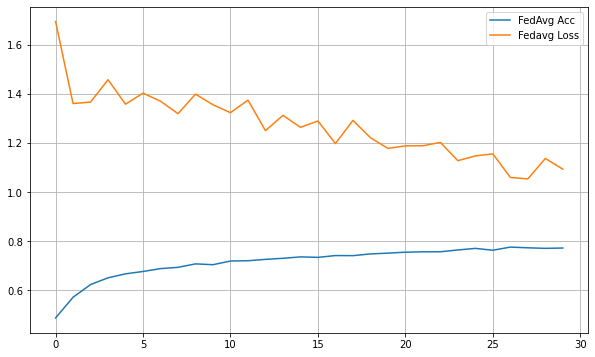

In [24]:
num = 3
average_acc_list, average_loss_list = [], []

for i in range(1,31):
    tmp_a, tmp_l = 0, 0
    for j in range(num):
        tmp_a = tmp_a + np.mean(globals()['acc{}'.format(j)][i])
        tmp_l = tmp_l + np.mean(globals()['loss{}'.format(j)][i])    
        
    average_acc_list.append(tmp_a/num)
    average_loss_list.append(tmp_l/num)   
    
plt.figure(figsize=(10,6))
plt.plot(average_acc_list, label='FedAvg Acc')
plt.plot(average_loss_list, label='Fedavg Loss')

plt.grid(True)
plt.legend()
plt.show()

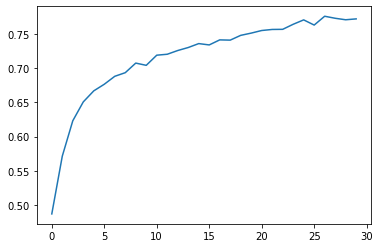

In [25]:
plt.plot(average_acc_list, label='FedAvg Acc')
plt.show()

In [26]:
print(average_acc_list,'\n') 
print(average_loss_list)

[0.48708111362324824, 0.571466663479805, 0.6231000009510251, 0.6506744450993008, 0.6668088869916068, 0.6764511115021176, 0.6880555589993795, 0.6933444453610313, 0.7073544455899133, 0.7040833320882586, 0.7189033322864109, 0.7202700005637275, 0.7257144451141357, 0.730110004875395, 0.7358300003740522, 0.7338877777258555, 0.7412511103683048, 0.7408933328257667, 0.7478655563460456, 0.7511488901244271, 0.754944447014067, 0.7564844475852119, 0.7566700001557668, 0.7640466656949786, 0.770461110273997, 0.7628877798716228, 0.7757788903183407, 0.7728200018405914, 0.77063111199273, 0.771915555662579] 

[1.6945602297782898, 1.360194163189994, 1.3663473394181993, 1.457390559381909, 1.3576704959074657, 1.4025704867309994, 1.3698231319586434, 1.319033877717124, 1.3987205002042984, 1.3552710711956024, 1.3230270127455392, 1.3742595970630649, 1.249954981936349, 1.3122270577483708, 1.2635035230053797, 1.2892493453290728, 1.197476116816203, 1.2916493793328603, 1.22127742767334, 1.1777215652995638, 1.1879222